In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from matplotlib import patches
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import os
import math
import random

import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.metrics import roc_curve, roc_auc_score, auc

import scipy.stats as st
from scipy.stats import poisson
from scipy.interpolate import interp1d
from scipy.stats import norm

In [2]:
from sklearn.neighbors import KernelDensity # paquete necesario
from sklearn.model_selection import GridSearchCV

import scipy.integrate as integrate

In [3]:
!pip install xgboost

import xgboost
from xgboost import XGBRegressor, XGBClassifier

You should consider upgrading via the '/home/andres/anaconda3/bin/python -m pip install --upgrade pip' command.


## DATA

In [4]:
# data

folder_data = "../../MLL-exclusion/data/"

In [5]:
folder_saved = "Zprime-SSM-ee-mZ3500GeV-variables/"

# 1st DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-1.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-1.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()




# 2nd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-2.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-2.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-2.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-2.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-2.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-2.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-2.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()





# 3rd DATASET
e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-3.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-3.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-3.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-3.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-3.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-3.txt', delimiter=',')




# INVARIANT MASS

invariant_mass_eeSM = []

for i in range(len(e1pt_eeSSMZprime)):
    invariant_mass_eeSM.append( ( 2 * e1pt_eeSSMZprime[i] * e2pt_eeSSMZprime[i] * ( np.cosh(e1eta_eeSSMZprime[i] - e2eta_eeSSMZprime[i]) - np.cos(e1phi_eeSSMZprime[i] - e2phi_eeSSMZprime[i]) ) )**0.5 )
    
print(len(invariant_mass_eeSM))

f= open(folder_data + folder_saved + "mee-3.txt","w")
for i in range(len(invariant_mass_eeSM)):
    f.write("%.3f\n" % invariant_mass_eeSM[i] )
f.close()

413382
205703
205657


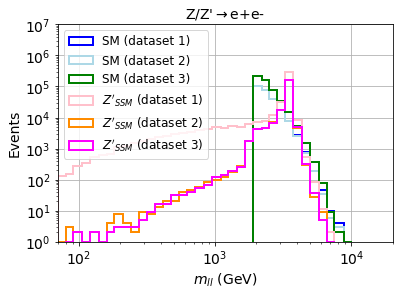

In [6]:
# just to check that we need to ask again that the invariant mass has to be greater than 2000 GeV

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

folder_saved = "SM/ee/"

invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')
invariant_mass_eeSM_1800_2 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM (dataset 1)")
plt.hist(invariant_mass_eeSM_1800, bins=bins_atlas, lw=2, edgecolor='lightblue', histtype='step', label="SM (dataset 2)")
plt.hist(invariant_mass_eeSM_1800_2, bins=bins_atlas, lw=2, edgecolor='green', histtype='step', label="SM (dataset 3)")


folder_saved = "Zprime-SSM-ee-mZ3500GeV-variables/"

invariant_mass_eeSSMZprime_1 = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

plt.hist(invariant_mass_eeSSMZprime_1, bins=bins_atlas, lw=2, edgecolor='pink', histtype='step', label="$Z'_{SSM}$ (dataset 1)")
plt.hist(invariant_mass_eeSSMZprime_2, bins=bins_atlas, lw=2, edgecolor='darkorange', histtype='step', label="$Z'_{SSM}$ (dataset 2)")
plt.hist(invariant_mass_eeSSMZprime_3, bins=bins_atlas, lw=2, edgecolor='magenta', histtype='step', label="$Z'_{SSM}$ (dataset 3)")


plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow$e+e-",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### SM

In [7]:
######
# SM #
######


folder_saved = "SM/ee/"


# 1st DATASET
invariant_mass_eeSM = np.loadtxt(folder_data + folder_saved +"mee.txt", delimiter=',')

e1pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-pt.txt', delimiter=',')
e1eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-eta.txt', delimiter=',')
e1phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e1-phi.txt', delimiter=',')

e2pt_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-pt.txt', delimiter=',')
e2eta_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-eta.txt', delimiter=',')
e2phi_eeSM = np.loadtxt(folder_data + folder_saved + 'e2-phi.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM))):
    if invariant_mass_eeSM[i]< 2000 or e1eta_eeSM[i] < -2.47 or -1.52 < e1eta_eeSM[i] < -1.37 or 1.37 < e1eta_eeSM[i] < 1.52 or e1eta_eeSM[i] > 2.47 or e2eta_eeSM[i] < -2.47 or -1.52 < e2eta_eeSM[i] < -1.37 or 1.37 < e2eta_eeSM[i] < 1.52 or e2eta_eeSM[i] > 2.47:
        e1pt_eeSM = np.delete(e1pt_eeSM, i)
        e1eta_eeSM = np.delete(e1eta_eeSM, i)
        e1phi_eeSM = np.delete(e1phi_eeSM, i)
        
        e2pt_eeSM = np.delete(e2pt_eeSM, i)
        e2eta_eeSM = np.delete(e2eta_eeSM, i)
        e2phi_eeSM = np.delete(e2phi_eeSM, i)
        
        invariant_mass_eeSM = np.delete(invariant_mass_eeSM, i)
        

        
        
# 2nd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800








# 3rd DATASET
invariant_mass_eeSM_1800 = np.loadtxt(folder_data + folder_saved +"mee-1800-2.txt", delimiter=',')

e1pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-pt-1800-2.txt', delimiter=',')
e1eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-eta-1800-2.txt', delimiter=',')
e1phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e1-phi-1800-2.txt', delimiter=',')

e2pt_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-pt-1800-2.txt', delimiter=',')
e2eta_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-eta-1800-2.txt', delimiter=',')
e2phi_eeSM_1800 = np.loadtxt(folder_data + folder_saved + 'e2-phi-1800-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSM_1800))):
    if invariant_mass_eeSM_1800[i]< 2000 or e1eta_eeSM_1800[i] < -2.47 or -1.52 < e1eta_eeSM_1800[i] < -1.37 or 1.37 < e1eta_eeSM_1800[i] < 1.52 or e1eta_eeSM_1800[i] > 2.47 or e2eta_eeSM_1800[i] < -2.47 or -1.52 < e2eta_eeSM_1800[i] < -1.37 or 1.37 < e2eta_eeSM_1800[i] < 1.52 or e2eta_eeSM_1800[i] > 2.47:
        e1pt_eeSM_1800 = np.delete(e1pt_eeSM_1800, i)
        e1eta_eeSM_1800 = np.delete(e1eta_eeSM_1800, i)
        e1phi_eeSM_1800 = np.delete(e1phi_eeSM_1800, i)
        
        e2pt_eeSM_1800 = np.delete(e2pt_eeSM_1800, i)
        e2eta_eeSM_1800 = np.delete(e2eta_eeSM_1800, i)
        e2phi_eeSM_1800 = np.delete(e2phi_eeSM_1800, i)
        
        invariant_mass_eeSM_1800 = np.delete(invariant_mass_eeSM_1800, i)
        


# concatenate results
e1pt_eeSM = np.concatenate([e1pt_eeSM,e1pt_eeSM_1800])
e1eta_eeSM = np.concatenate([e1eta_eeSM,e1eta_eeSM_1800])
e1phi_eeSM = np.concatenate([e1phi_eeSM,e1phi_eeSM_1800])

e2pt_eeSM = np.concatenate([e2pt_eeSM,e2pt_eeSM_1800])
e2eta_eeSM = np.concatenate([e2eta_eeSM,e2eta_eeSM_1800])
e2phi_eeSM = np.concatenate([e2phi_eeSM,e2phi_eeSM_1800])

invariant_mass_eeSM = np.concatenate([invariant_mass_eeSM,invariant_mass_eeSM_1800])



# remove the aux
del e1pt_eeSM_1800
del e1eta_eeSM_1800
del e1phi_eeSM_1800

del e2pt_eeSM_1800
del e2eta_eeSM_1800
del e2phi_eeSM_1800

del invariant_mass_eeSM_1800





# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSM = np.array([a-b for a,b in zip(e1eta_eeSM,e2eta_eeSM)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSM = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSM,e2eta_eeSM,e1phi_eeSM,e2phi_eeSM)])



print(e1pt_eeSM.shape)
print(e1eta_eeSM.shape)
print(e1phi_eeSM.shape)

print(e2pt_eeSM.shape)
print(e2eta_eeSM.shape)
print(e2phi_eeSM.shape)

print(invariant_mass_eeSM.shape)
print(e1e2diffeta_eeSM.shape)
print(e1e2R_eeSM.shape)

(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)
(918041,)


In [8]:
print(min(e1eta_eeSM))
print(max(e1eta_eeSM))

print(min(e2eta_eeSM))
print(max(e2eta_eeSM))

-2.47
2.47
-2.47
2.47


### SSM Z prime

In [9]:
##########
# Zprime #
##########


folder_saved = "Zprime-SSM-ee-mZ3500GeV-variables/"


# 1st DATASET
invariant_mass_eeSSMZprime = np.loadtxt(folder_data + folder_saved +"mee-1.txt", delimiter=',')

e1pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-1.txt', delimiter=',')
e1eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-1.txt', delimiter=',')
e1phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-1.txt', delimiter=',')

e2pt_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-1.txt', delimiter=',')
e2eta_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-1.txt', delimiter=',')
e2phi_eeSSMZprime = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-1.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime))):
    if invariant_mass_eeSSMZprime[i]< 2000 or e1eta_eeSSMZprime[i] < -2.47 or -1.52 < e1eta_eeSSMZprime[i] < -1.37 or 1.37 < e1eta_eeSSMZprime[i] < 1.52 or e1eta_eeSSMZprime[i] > 2.47 or e2eta_eeSSMZprime[i] < -2.47 or -1.52 < e2eta_eeSSMZprime[i] < -1.37 or 1.37 < e2eta_eeSSMZprime[i] < 1.52 or e2eta_eeSSMZprime[i] > 2.47:
        e1pt_eeSSMZprime = np.delete(e1pt_eeSSMZprime, i)
        e1eta_eeSSMZprime = np.delete(e1eta_eeSSMZprime, i)
        e1phi_eeSSMZprime = np.delete(e1phi_eeSSMZprime, i)
        
        e2pt_eeSSMZprime = np.delete(e2pt_eeSSMZprime, i)
        e2eta_eeSSMZprime = np.delete(e2eta_eeSSMZprime, i)
        e2phi_eeSSMZprime = np.delete(e2phi_eeSSMZprime, i)
        
        invariant_mass_eeSSMZprime = np.delete(invariant_mass_eeSSMZprime, i)
        
        
        
        
# 2nd DATASET
invariant_mass_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved +"mee-2.txt", delimiter=',')

e1pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-2.txt', delimiter=',')
e1eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-2.txt', delimiter=',')
e1phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-2.txt', delimiter=',')

e2pt_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-2.txt', delimiter=',')
e2eta_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-2.txt', delimiter=',')
e2phi_eeSSMZprime_2 = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-2.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_2))):
    if invariant_mass_eeSSMZprime_2[i]< 2000 or e1eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_2[i] < 1.52 or e1eta_eeSSMZprime_2[i] > 2.47 or e2eta_eeSSMZprime_2[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_2[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_2[i] < 1.52 or e2eta_eeSSMZprime_2[i] > 2.47:
        e1pt_eeSSMZprime_2 = np.delete(e1pt_eeSSMZprime_2, i)
        e1eta_eeSSMZprime_2 = np.delete(e1eta_eeSSMZprime_2, i)
        e1phi_eeSSMZprime_2 = np.delete(e1phi_eeSSMZprime_2, i)
        
        e2pt_eeSSMZprime_2 = np.delete(e2pt_eeSSMZprime_2, i)
        e2eta_eeSSMZprime_2 = np.delete(e2eta_eeSSMZprime_2, i)
        e2phi_eeSSMZprime_2 = np.delete(e2phi_eeSSMZprime_2, i)
        
        invariant_mass_eeSSMZprime_2 = np.delete(invariant_mass_eeSSMZprime_2, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_2 = 1.*len(invariant_mass_eeSSMZprime_2) / eventos_parton
print(aceptancia_eeSSMZprime_2)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_2])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_2])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_2])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_2])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_2])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_2])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_2])



# remove the aux
del e1pt_eeSSMZprime_2
del e1eta_eeSSMZprime_2
del e1phi_eeSSMZprime_2

del e2pt_eeSSMZprime_2
del e2eta_eeSSMZprime_2
del e2phi_eeSSMZprime_2

del invariant_mass_eeSSMZprime_2







        
# 3rd DATASET
invariant_mass_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved +"mee-3.txt", delimiter=',')

e1pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-pt-3500-3.txt', delimiter=',')
e1eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-eta-3500-3.txt', delimiter=',')
e1phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e1-phi-3500-3.txt', delimiter=',')

e2pt_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-pt-3500-3.txt', delimiter=',')
e2eta_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-eta-3500-3.txt', delimiter=',')
e2phi_eeSSMZprime_3 = np.loadtxt(folder_data + folder_saved + 'e2-phi-3500-3.txt', delimiter=',')


# only keep points where the invariant mass is greater than 2000 GeV
# and make sure that both electrons: |eta| < 2.47, excluding 1.37 < |eta| < 1.52
for i in reversed(range(len(invariant_mass_eeSSMZprime_3))):
    if invariant_mass_eeSSMZprime_3[i]< 2000 or e1eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e1eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e1eta_eeSSMZprime_3[i] < 1.52 or e1eta_eeSSMZprime_3[i] > 2.47 or e2eta_eeSSMZprime_3[i] < -2.47 or -1.52 < e2eta_eeSSMZprime_3[i] < -1.37 or 1.37 < e2eta_eeSSMZprime_3[i] < 1.52 or e2eta_eeSSMZprime_3[i] > 2.47:
        e1pt_eeSSMZprime_3 = np.delete(e1pt_eeSSMZprime_3, i)
        e1eta_eeSSMZprime_3 = np.delete(e1eta_eeSSMZprime_3, i)
        e1phi_eeSSMZprime_3 = np.delete(e1phi_eeSSMZprime_3, i)
        
        e2pt_eeSSMZprime_3 = np.delete(e2pt_eeSSMZprime_3, i)
        e2eta_eeSSMZprime_3 = np.delete(e2eta_eeSSMZprime_3, i)
        e2phi_eeSSMZprime_3 = np.delete(e2phi_eeSSMZprime_3, i)
        
        invariant_mass_eeSSMZprime_3 = np.delete(invariant_mass_eeSSMZprime_3, i)
        
eventos_parton = 500000
aceptancia_eeSSMZprime_3 = 1.*len(invariant_mass_eeSSMZprime_3) / eventos_parton
print(aceptancia_eeSSMZprime_3)


# concatenate results
e1pt_eeSSMZprime = np.concatenate([e1pt_eeSSMZprime,e1pt_eeSSMZprime_3])
e1eta_eeSSMZprime = np.concatenate([e1eta_eeSSMZprime,e1eta_eeSSMZprime_3])
e1phi_eeSSMZprime = np.concatenate([e1phi_eeSSMZprime,e1phi_eeSSMZprime_3])

e2pt_eeSSMZprime = np.concatenate([e2pt_eeSSMZprime,e2pt_eeSSMZprime_3])
e2eta_eeSSMZprime = np.concatenate([e2eta_eeSSMZprime,e2eta_eeSSMZprime_3])
e2phi_eeSSMZprime = np.concatenate([e2phi_eeSSMZprime,e2phi_eeSSMZprime_3])

invariant_mass_eeSSMZprime = np.concatenate([invariant_mass_eeSSMZprime,invariant_mass_eeSSMZprime_3])



# remove the aux
del e1pt_eeSSMZprime_3
del e1eta_eeSSMZprime_3
del e1phi_eeSSMZprime_3

del e2pt_eeSSMZprime_3
del e2eta_eeSSMZprime_3
del e2phi_eeSSMZprime_3

del invariant_mass_eeSSMZprime_3






# FINALLY

# compute \Delta \eta_{l+l-}
e1e2diffeta_eeSSMZprime = np.array([a-b for a,b in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime)])

# compute R = [ \Delta \eta_{l+l-}^2 + \Delta \eta_{l+l-}^2 ]^1/2
e1e2R_eeSSMZprime = np.array([( (a-b)**2. + (c-d)**2. )**0.5 for a,b,c,d in zip(e1eta_eeSSMZprime,e2eta_eeSSMZprime,e1phi_eeSSMZprime,e2phi_eeSSMZprime)])




print(e1pt_eeSSMZprime.shape)
print(e1eta_eeSSMZprime.shape)
print(e1phi_eeSSMZprime.shape)

print(e2pt_eeSSMZprime.shape)
print(e2eta_eeSSMZprime.shape)
print(e2phi_eeSSMZprime.shape)

print(invariant_mass_eeSSMZprime.shape)
print(e1e2diffeta_eeSSMZprime.shape)
print(e1e2R_eeSSMZprime.shape)

0.402948
0.403016
(754087,)
(754087,)
(754087,)
(754087,)
(754087,)
(754087,)
(754087,)
(754087,)
(754087,)


In [10]:
print(min(e1eta_eeSSMZprime))
print(max(e1eta_eeSSMZprime))

print(min(e2eta_eeSSMZprime))
print(max(e2eta_eeSSMZprime))

-2.468
2.469
-2.469
2.469


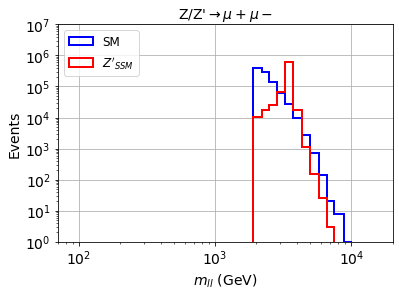

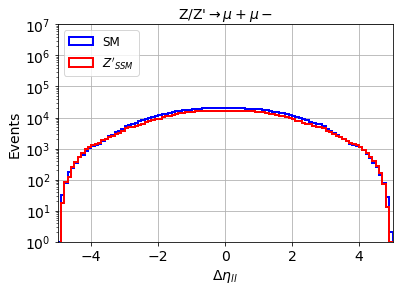

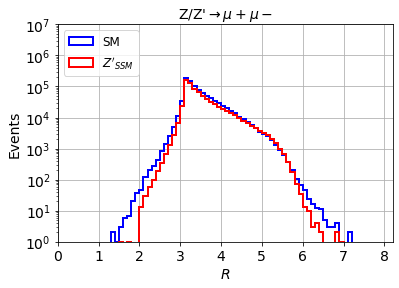

In [11]:
# NOW DATA IS CHECKED

bins_atlas = [70, 80.0, 90.0, 105.0, 120.0, 140.0, 160.0, 180.0, 210.0, 240.0, 275.0, 315.0, 360.0, 415.0, 475.0, 545.0, 625.0, 715.0, 825.0, 950.0, 1100.0, 1250.0, 1450.0, 1650.0, 1900.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000]

plt.hist(invariant_mass_eeSM, bins=bins_atlas, lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(invariant_mass_eeSSMZprime, bins=bins_atlas, lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$m_{ll}$ (GeV)",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(70.,20000)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2diffeta_eeSM, bins=100, range=[-5,5], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2diffeta_eeSSMZprime, bins=100, range=[-5,5], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$\Delta \eta_{ll}$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(-5,5)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()




plt.hist(e1e2R_eeSM, bins=82, range=[0,8.2], lw=2, edgecolor='blue', histtype='step', label="SM")
plt.hist(e1e2R_eeSSMZprime, bins=82, range=[0,8.2], lw=2, edgecolor='red', histtype='step', label="$Z'_{SSM}$")

plt.grid()  # Add grid lines

plt.title(r"Z/Z'$\rightarrow \mu+ \mu-$",fontsize=14)  # Titles etc
plt.xlabel("$R$",fontsize=14)
plt.ylabel("Events",fontsize=14)

plt.xlim(0.,8.2)
plt.ylim(1e0,1e7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper left',fontsize=12)

plt.show()

### Train-test-val datasets

In [12]:
# to normalize
scaler = preprocessing.MinMaxScaler()

# Number of data points (per-class) for the ML classifier
num_data = 750000



df = pd.DataFrame()

df['e1-pt']= np.concatenate([e1pt_eeSM[:num_data],e1pt_eeSSMZprime[:num_data]])
df['e1-eta']= np.concatenate([e1eta_eeSM[:num_data],e1eta_eeSSMZprime[:num_data]])
df['e1-phi']= np.concatenate([e1phi_eeSM[:num_data],e1phi_eeSSMZprime[:num_data]])

df['e2-pt']= np.concatenate([e2pt_eeSM[:num_data],e2pt_eeSSMZprime[:num_data]])
df['e2-eta']= np.concatenate([e2eta_eeSM[:num_data],e2eta_eeSSMZprime[:num_data]])
df['e2-phi']= np.concatenate([e2phi_eeSM[:num_data],e2phi_eeSSMZprime[:num_data]])

df['mll']= np.concatenate([invariant_mass_eeSM[:num_data],invariant_mass_eeSSMZprime[:num_data]])
df['delta-eta']= np.concatenate([e1e2diffeta_eeSM[:num_data],e1e2diffeta_eeSSMZprime[:num_data]])
df['R']= np.concatenate([e1e2R_eeSM[:num_data],e1e2R_eeSSMZprime[:num_data]])

df['Y'] = np.concatenate([np.zeros(num_data),np.ones(num_data)])


# remove the used data
del e1pt_eeSM
del e1eta_eeSM
del e1phi_eeSM

del e2pt_eeSM
del e2eta_eeSM
del e2phi_eeSM

del e1pt_eeSSMZprime
del e1eta_eeSSMZprime
del e1phi_eeSSMZprime

del e2pt_eeSSMZprime
del e2eta_eeSSMZprime
del e2phi_eeSSMZprime


# NORMALIZE
df = scaler.fit_transform(df)
df = pd.DataFrame(df,columns=['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi','mll','delta-eta','R','Y'])


# print df to see the data
print(df)


# X and Y for the classifier
X_mon = df[['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi']].values
y_mon = df[['Y']].values

del df

# divide into train-val and test data samples
test_ratio = 1./3
val_ratio = 0.25


X_mon_aux, X_mon_test, y_mon_aux, y_mon_test = train_test_split(X_mon,
                                                                y_mon,
                                                                test_size=test_ratio,
                                                                random_state=42,
                                                                #stratify = y_mon,
                                                                shuffle=True)


X_mon_train, X_mon_val, y_mon_train, y_mon_val = train_test_split(X_mon_aux,
                                                                  y_mon_aux,
                                                                  test_size=val_ratio,
                                                                  random_state=42,
                                                                  #stratify = y_mon_aux,
                                                                  shuffle=True)


print('')
print('X_mon_train : ', X_mon_train.shape)
print('y_mon_train : ', y_mon_train.shape)
print('X_mon_val : ', X_mon_val.shape)
print('y_mon_val : ', y_mon_val.shape)
print('X_mon_test : ', X_mon_test.shape)
print('y_mon_test : ', y_mon_test.shape)
print('')

            e1-pt    e1-eta    e1-phi     e2-pt    e2-eta    e2-phi       mll  \
0        0.221286  0.458097  0.458625  0.245949  0.617409  0.964036  0.011698   
1        0.125807  0.242713  0.782623  0.155753  0.738462  0.299013  0.046466   
2        0.282472  0.516397  0.277371  0.309000  0.470648  0.789306  0.055798   
3        0.176605  0.424089  0.408498  0.204820  0.895951  0.924570  0.120553   
4        0.248743  0.415182  0.181254  0.267835  0.386235  0.636219  0.013300   
...           ...       ...       ...       ...       ...       ...       ...   
1499995  0.236414  0.246559  0.202101  0.230862  0.720850  0.702578  0.199305   
1499996  0.508103  0.413360  0.784373  0.389926  0.440486  0.294717  0.205698   
1499997  0.176276  0.258704  0.802673  0.201255  0.749798  0.299173  0.133281   
1499998  0.403248  0.437449  0.348186  0.433677  0.599190  0.850414  0.216891   
1499999  0.362116  0.428543  0.583386  0.377464  0.674494  0.084182  0.208128   

         delta-eta         

### XGBoost (per-event)

##### For 1 ML

/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65140	validation_1-logloss:0.65122
[1]	validation_0-logloss:0.61627	validation_1-logloss:0.61607
[2]	validation_0-logloss:0.58667	validation_1-logloss:0.58650
[3]	validation_0-logloss:0.56024	validation_1-logloss:0.55997
[4]	validation_0-logloss:0.53777	validation_1-logloss:0.53746
[5]	validation_0-logloss:0.51811	validation_1-logloss:0.51778
[6]	validation_0-logloss:0.49894	validation_1-logloss:0.49861
[7]	validation_0-logloss:0.48413	validation_1-logloss:0.48375
[8]	validation_0-logloss:0.46950	validation_1-logloss:0.46922
[9]	validation_0-logloss:0.45713	validation_1-logloss:0.45691
[10]	validation_0-logloss:0.44664	validation_1-logloss:0.44634
[11]	validation_0-logloss:0.43578	validation_1-logloss:0.43547
[12]	validation_0-logloss:0.42449	validation_1-logloss:0.42419
[13]	validation_0-logloss:0.41450	validation_1-logloss:0.41429
[14]	validation_0-logloss:0.40648	validation_1-logloss:0.40626
[15]	validation_0-logloss:0.39940	validation_1-logloss:0.39932
[1

[130]	validation_0-logloss:0.25281	validation_1-logloss:0.25480
[131]	validation_0-logloss:0.25266	validation_1-logloss:0.25467
[132]	validation_0-logloss:0.25258	validation_1-logloss:0.25460
[133]	validation_0-logloss:0.25246	validation_1-logloss:0.25452
[134]	validation_0-logloss:0.25233	validation_1-logloss:0.25441
[135]	validation_0-logloss:0.25228	validation_1-logloss:0.25437
[136]	validation_0-logloss:0.25219	validation_1-logloss:0.25428
[137]	validation_0-logloss:0.25214	validation_1-logloss:0.25425
[138]	validation_0-logloss:0.25205	validation_1-logloss:0.25418
[139]	validation_0-logloss:0.25194	validation_1-logloss:0.25412
[140]	validation_0-logloss:0.25190	validation_1-logloss:0.25410
[141]	validation_0-logloss:0.25179	validation_1-logloss:0.25400
[142]	validation_0-logloss:0.25175	validation_1-logloss:0.25398
[143]	validation_0-logloss:0.25153	validation_1-logloss:0.25378
[144]	validation_0-logloss:0.25146	validation_1-logloss:0.25371
[145]	validation_0-logloss:0.25141	valid

[259]	validation_0-logloss:0.24568	validation_1-logloss:0.24974
[260]	validation_0-logloss:0.24567	validation_1-logloss:0.24974
[261]	validation_0-logloss:0.24566	validation_1-logloss:0.24974
[262]	validation_0-logloss:0.24563	validation_1-logloss:0.24974
[263]	validation_0-logloss:0.24562	validation_1-logloss:0.24974
[264]	validation_0-logloss:0.24560	validation_1-logloss:0.24974
[265]	validation_0-logloss:0.24559	validation_1-logloss:0.24974
[266]	validation_0-logloss:0.24558	validation_1-logloss:0.24974
[267]	validation_0-logloss:0.24556	validation_1-logloss:0.24974
[268]	validation_0-logloss:0.24556	validation_1-logloss:0.24974
[269]	validation_0-logloss:0.24555	validation_1-logloss:0.24974
[270]	validation_0-logloss:0.24554	validation_1-logloss:0.24974
[271]	validation_0-logloss:0.24551	validation_1-logloss:0.24973
[272]	validation_0-logloss:0.24546	validation_1-logloss:0.24970
[273]	validation_0-logloss:0.24544	validation_1-logloss:0.24970
[274]	validation_0-logloss:0.24543	valid

[388]	validation_0-logloss:0.24268	validation_1-logloss:0.24856
[389]	validation_0-logloss:0.24266	validation_1-logloss:0.24857
[390]	validation_0-logloss:0.24266	validation_1-logloss:0.24857
[391]	validation_0-logloss:0.24263	validation_1-logloss:0.24857
[392]	validation_0-logloss:0.24262	validation_1-logloss:0.24857
[393]	validation_0-logloss:0.24260	validation_1-logloss:0.24857
[394]	validation_0-logloss:0.24257	validation_1-logloss:0.24856
[395]	validation_0-logloss:0.24255	validation_1-logloss:0.24855
[396]	validation_0-logloss:0.24248	validation_1-logloss:0.24850
[397]	validation_0-logloss:0.24245	validation_1-logloss:0.24850
[398]	validation_0-logloss:0.24243	validation_1-logloss:0.24849
[399]	validation_0-logloss:0.24241	validation_1-logloss:0.24848
[400]	validation_0-logloss:0.24240	validation_1-logloss:0.24847
[401]	validation_0-logloss:0.24238	validation_1-logloss:0.24848
[402]	validation_0-logloss:0.24237	validation_1-logloss:0.24848
[403]	validation_0-logloss:0.24234	valid

[517]	validation_0-logloss:0.24037	validation_1-logloss:0.24814
[518]	validation_0-logloss:0.24036	validation_1-logloss:0.24814
[519]	validation_0-logloss:0.24035	validation_1-logloss:0.24814
[520]	validation_0-logloss:0.24035	validation_1-logloss:0.24814
[521]	validation_0-logloss:0.24034	validation_1-logloss:0.24814
[522]	validation_0-logloss:0.24030	validation_1-logloss:0.24812
[523]	validation_0-logloss:0.24028	validation_1-logloss:0.24812
[524]	validation_0-logloss:0.24027	validation_1-logloss:0.24812
[525]	validation_0-logloss:0.24026	validation_1-logloss:0.24812
[526]	validation_0-logloss:0.24025	validation_1-logloss:0.24812
[527]	validation_0-logloss:0.24023	validation_1-logloss:0.24812
[528]	validation_0-logloss:0.24022	validation_1-logloss:0.24812
[529]	validation_0-logloss:0.24022	validation_1-logloss:0.24813
[530]	validation_0-logloss:0.24021	validation_1-logloss:0.24813
[531]	validation_0-logloss:0.24019	validation_1-logloss:0.24813
[532]	validation_0-logloss:0.24018	valid

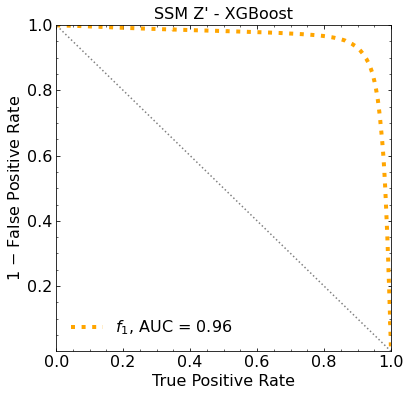

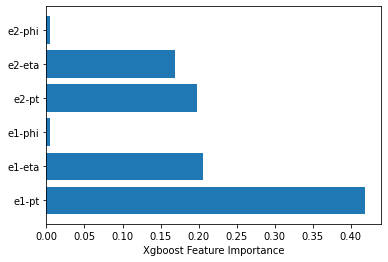

In [13]:
# XGBoost with only the kinematic variables of the leptons

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

# FIT
classifier.fit(X_mon_train,y_mon_train,eval_set=[(X_mon_train, y_mon_train), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_1ML = classifier.predict_proba(X_mon_test).T[1]


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_1ML)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




feature_names = np.array(['e1-pt','e1-eta','e1-phi','e2-pt','e2-eta','e2-phi'])
plt.barh(feature_names, classifier.feature_importances_)
plt.xlabel("Xgboost Feature Importance")
plt.show()

##### For 10 ML

ML iteration 1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65119	validation_1-logloss:0.65114
[1]	validation_0-logloss:0.61572	validation_1-logloss:0.61561
[2]	validation_0-logloss:0.58589	validation_1-logloss:0.58579
[3]	validation_0-logloss:0.55910	validation_1-logloss:0.55891
[4]	validation_0-logloss:0.53739	validation_1-logloss:0.53719
[5]	validation_0-logloss:0.51753	validation_1-logloss:0.51738
[6]	validation_0-logloss:0.49951	validation_1-logloss:0.49939
[7]	validation_0-logloss:0.48201	validation_1-logloss:0.48181
[8]	validation_0-logloss:0.46702	validation_1-logloss:0.46691
[9]	validation_0-logloss:0.45429	validation_1-logloss:0.45427
[10]	validation_0-logloss:0.44175	validation_1-logloss:0.44178
[11]	validation_0-logloss:0.43028	validation_1-logloss:0.43033
[12]	validation_0-logloss:0.42059	validation_1-logloss:0.42074
[13]	validation_0-logloss:0.41128	validation_1-logloss:0.41147
[14]	validation_0-logloss:0.40276	validation_1-logloss:0.40302
[15]	validation_0-logloss:0.39549	validation_1-logloss:0.39581
[1

[130]	validation_0-logloss:0.25071	validation_1-logloss:0.25516
[131]	validation_0-logloss:0.25059	validation_1-logloss:0.25506
[132]	validation_0-logloss:0.25052	validation_1-logloss:0.25502
[133]	validation_0-logloss:0.25038	validation_1-logloss:0.25491
[134]	validation_0-logloss:0.25024	validation_1-logloss:0.25482
[135]	validation_0-logloss:0.25015	validation_1-logloss:0.25476
[136]	validation_0-logloss:0.25008	validation_1-logloss:0.25471
[137]	validation_0-logloss:0.25003	validation_1-logloss:0.25469
[138]	validation_0-logloss:0.24998	validation_1-logloss:0.25466
[139]	validation_0-logloss:0.24992	validation_1-logloss:0.25462
[140]	validation_0-logloss:0.24988	validation_1-logloss:0.25460
[141]	validation_0-logloss:0.24974	validation_1-logloss:0.25449
[142]	validation_0-logloss:0.24962	validation_1-logloss:0.25439
[143]	validation_0-logloss:0.24945	validation_1-logloss:0.25424
[144]	validation_0-logloss:0.24938	validation_1-logloss:0.25420
[145]	validation_0-logloss:0.24918	valid

[259]	validation_0-logloss:0.24316	validation_1-logloss:0.25145
[260]	validation_0-logloss:0.24313	validation_1-logloss:0.25145
[261]	validation_0-logloss:0.24310	validation_1-logloss:0.25144
[262]	validation_0-logloss:0.24306	validation_1-logloss:0.25144
[263]	validation_0-logloss:0.24303	validation_1-logloss:0.25144
[264]	validation_0-logloss:0.24300	validation_1-logloss:0.25143
[265]	validation_0-logloss:0.24299	validation_1-logloss:0.25143
[266]	validation_0-logloss:0.24298	validation_1-logloss:0.25143
[267]	validation_0-logloss:0.24295	validation_1-logloss:0.25143
[268]	validation_0-logloss:0.24292	validation_1-logloss:0.25144
[269]	validation_0-logloss:0.24289	validation_1-logloss:0.25144
[270]	validation_0-logloss:0.24288	validation_1-logloss:0.25144
[271]	validation_0-logloss:0.24282	validation_1-logloss:0.25142
[272]	validation_0-logloss:0.24271	validation_1-logloss:0.25135
[273]	validation_0-logloss:0.24268	validation_1-logloss:0.25135
[274]	validation_0-logloss:0.24259	valid

[388]	validation_0-logloss:0.23913	validation_1-logloss:0.25077
[389]	validation_0-logloss:0.23910	validation_1-logloss:0.25077
[390]	validation_0-logloss:0.23902	validation_1-logloss:0.25074
[391]	validation_0-logloss:0.23898	validation_1-logloss:0.25074
[392]	validation_0-logloss:0.23891	validation_1-logloss:0.25071
[393]	validation_0-logloss:0.23886	validation_1-logloss:0.25071
[394]	validation_0-logloss:0.23884	validation_1-logloss:0.25071
[395]	validation_0-logloss:0.23881	validation_1-logloss:0.25071
[396]	validation_0-logloss:0.23869	validation_1-logloss:0.25065
[397]	validation_0-logloss:0.23866	validation_1-logloss:0.25065
[398]	validation_0-logloss:0.23861	validation_1-logloss:0.25063
[399]	validation_0-logloss:0.23858	validation_1-logloss:0.25062
[400]	validation_0-logloss:0.23856	validation_1-logloss:0.25062
[401]	validation_0-logloss:0.23855	validation_1-logloss:0.25062
[402]	validation_0-logloss:0.23854	validation_1-logloss:0.25062
[403]	validation_0-logloss:0.23851	valid

[517]	validation_0-logloss:0.23474	validation_1-logloss:0.24994
[518]	validation_0-logloss:0.23471	validation_1-logloss:0.24994
[519]	validation_0-logloss:0.23468	validation_1-logloss:0.24992
[520]	validation_0-logloss:0.23466	validation_1-logloss:0.24992
[521]	validation_0-logloss:0.23464	validation_1-logloss:0.24992
[522]	validation_0-logloss:0.23460	validation_1-logloss:0.24992
[523]	validation_0-logloss:0.23459	validation_1-logloss:0.24993
[524]	validation_0-logloss:0.23459	validation_1-logloss:0.24993
[525]	validation_0-logloss:0.23458	validation_1-logloss:0.24993
[526]	validation_0-logloss:0.23455	validation_1-logloss:0.24992
[527]	validation_0-logloss:0.23451	validation_1-logloss:0.24993
[528]	validation_0-logloss:0.23450	validation_1-logloss:0.24993
[529]	validation_0-logloss:0.23447	validation_1-logloss:0.24994
[530]	validation_0-logloss:0.23445	validation_1-logloss:0.24993
[531]	validation_0-logloss:0.23443	validation_1-logloss:0.24993
[532]	validation_0-logloss:0.23442	valid

[646]	validation_0-logloss:0.23150	validation_1-logloss:0.24985
[647]	validation_0-logloss:0.23145	validation_1-logloss:0.24985
[648]	validation_0-logloss:0.23143	validation_1-logloss:0.24985
[649]	validation_0-logloss:0.23141	validation_1-logloss:0.24986
[650]	validation_0-logloss:0.23139	validation_1-logloss:0.24986
[651]	validation_0-logloss:0.23133	validation_1-logloss:0.24985
[652]	validation_0-logloss:0.23127	validation_1-logloss:0.24985
[653]	validation_0-logloss:0.23124	validation_1-logloss:0.24985


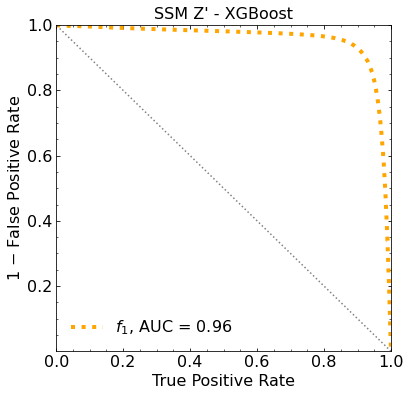


 ########################################

ML iteration  1


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65117	validation_1-logloss:0.65110
[1]	validation_0-logloss:0.61582	validation_1-logloss:0.61585
[2]	validation_0-logloss:0.58528	validation_1-logloss:0.58539
[3]	validation_0-logloss:0.55849	validation_1-logloss:0.55858
[4]	validation_0-logloss:0.53610	validation_1-logloss:0.53617
[5]	validation_0-logloss:0.51628	validation_1-logloss:0.51621
[6]	validation_0-logloss:0.49850	validation_1-logloss:0.49850
[7]	validation_0-logloss:0.48286	validation_1-logloss:0.48295
[8]	validation_0-logloss:0.46901	validation_1-logloss:0.46902
[9]	validation_0-logloss:0.45462	validation_1-logloss:0.45471
[10]	validation_0-logloss:0.44165	validation_1-logloss:0.44183
[11]	validation_0-logloss:0.43128	validation_1-logloss:0.43149
[12]	validation_0-logloss:0.42139	validation_1-logloss:0.42172
[13]	validation_0-logloss:0.41197	validation_1-logloss:0.41234
[14]	validation_0-logloss:0.40319	validation_1-logloss:0.40361
[15]	validation_0-logloss:0.39553	validation_1-logloss:0.39600
[1

[130]	validation_0-logloss:0.24983	validation_1-logloss:0.25506
[131]	validation_0-logloss:0.24974	validation_1-logloss:0.25501
[132]	validation_0-logloss:0.24963	validation_1-logloss:0.25491
[133]	validation_0-logloss:0.24955	validation_1-logloss:0.25485
[134]	validation_0-logloss:0.24944	validation_1-logloss:0.25479
[135]	validation_0-logloss:0.24932	validation_1-logloss:0.25471
[136]	validation_0-logloss:0.24927	validation_1-logloss:0.25467
[137]	validation_0-logloss:0.24921	validation_1-logloss:0.25463
[138]	validation_0-logloss:0.24914	validation_1-logloss:0.25459
[139]	validation_0-logloss:0.24896	validation_1-logloss:0.25444
[140]	validation_0-logloss:0.24876	validation_1-logloss:0.25430
[141]	validation_0-logloss:0.24866	validation_1-logloss:0.25422
[142]	validation_0-logloss:0.24860	validation_1-logloss:0.25420
[143]	validation_0-logloss:0.24856	validation_1-logloss:0.25417
[144]	validation_0-logloss:0.24852	validation_1-logloss:0.25415
[145]	validation_0-logloss:0.24842	valid

[259]	validation_0-logloss:0.24194	validation_1-logloss:0.25096
[260]	validation_0-logloss:0.24193	validation_1-logloss:0.25096
[261]	validation_0-logloss:0.24190	validation_1-logloss:0.25096
[262]	validation_0-logloss:0.24185	validation_1-logloss:0.25095
[263]	validation_0-logloss:0.24168	validation_1-logloss:0.25083
[264]	validation_0-logloss:0.24166	validation_1-logloss:0.25083
[265]	validation_0-logloss:0.24164	validation_1-logloss:0.25082
[266]	validation_0-logloss:0.24161	validation_1-logloss:0.25080
[267]	validation_0-logloss:0.24158	validation_1-logloss:0.25080
[268]	validation_0-logloss:0.24155	validation_1-logloss:0.25081
[269]	validation_0-logloss:0.24154	validation_1-logloss:0.25081
[270]	validation_0-logloss:0.24152	validation_1-logloss:0.25080
[271]	validation_0-logloss:0.24148	validation_1-logloss:0.25080
[272]	validation_0-logloss:0.24144	validation_1-logloss:0.25079
[273]	validation_0-logloss:0.24139	validation_1-logloss:0.25077
[274]	validation_0-logloss:0.24136	valid

[388]	validation_0-logloss:0.23747	validation_1-logloss:0.24981
[389]	validation_0-logloss:0.23744	validation_1-logloss:0.24980
[390]	validation_0-logloss:0.23741	validation_1-logloss:0.24979
[391]	validation_0-logloss:0.23738	validation_1-logloss:0.24978
[392]	validation_0-logloss:0.23736	validation_1-logloss:0.24979
[393]	validation_0-logloss:0.23730	validation_1-logloss:0.24977
[394]	validation_0-logloss:0.23725	validation_1-logloss:0.24976
[395]	validation_0-logloss:0.23721	validation_1-logloss:0.24976
[396]	validation_0-logloss:0.23717	validation_1-logloss:0.24975
[397]	validation_0-logloss:0.23714	validation_1-logloss:0.24974
[398]	validation_0-logloss:0.23711	validation_1-logloss:0.24974
[399]	validation_0-logloss:0.23707	validation_1-logloss:0.24975
[400]	validation_0-logloss:0.23706	validation_1-logloss:0.24975
[401]	validation_0-logloss:0.23705	validation_1-logloss:0.24975
[402]	validation_0-logloss:0.23703	validation_1-logloss:0.24976
[403]	validation_0-logloss:0.23702	valid

[517]	validation_0-logloss:0.23331	validation_1-logloss:0.24921
[518]	validation_0-logloss:0.23330	validation_1-logloss:0.24921
[519]	validation_0-logloss:0.23327	validation_1-logloss:0.24922
[520]	validation_0-logloss:0.23326	validation_1-logloss:0.24922
[521]	validation_0-logloss:0.23323	validation_1-logloss:0.24921
[522]	validation_0-logloss:0.23322	validation_1-logloss:0.24921
[523]	validation_0-logloss:0.23318	validation_1-logloss:0.24920
[524]	validation_0-logloss:0.23316	validation_1-logloss:0.24921
[525]	validation_0-logloss:0.23315	validation_1-logloss:0.24920
[526]	validation_0-logloss:0.23312	validation_1-logloss:0.24921
[527]	validation_0-logloss:0.23306	validation_1-logloss:0.24921
[528]	validation_0-logloss:0.23303	validation_1-logloss:0.24921
[529]	validation_0-logloss:0.23294	validation_1-logloss:0.24918
[530]	validation_0-logloss:0.23289	validation_1-logloss:0.24918
[531]	validation_0-logloss:0.23286	validation_1-logloss:0.24917
[532]	validation_0-logloss:0.23284	valid

[646]	validation_0-logloss:0.22976	validation_1-logloss:0.24898
[647]	validation_0-logloss:0.22973	validation_1-logloss:0.24898
[648]	validation_0-logloss:0.22970	validation_1-logloss:0.24899
[649]	validation_0-logloss:0.22967	validation_1-logloss:0.24899
[650]	validation_0-logloss:0.22964	validation_1-logloss:0.24899
[651]	validation_0-logloss:0.22961	validation_1-logloss:0.24900
[652]	validation_0-logloss:0.22960	validation_1-logloss:0.24900
[653]	validation_0-logloss:0.22954	validation_1-logloss:0.24898
[654]	validation_0-logloss:0.22951	validation_1-logloss:0.24898
[655]	validation_0-logloss:0.22946	validation_1-logloss:0.24896
[656]	validation_0-logloss:0.22943	validation_1-logloss:0.24897
[657]	validation_0-logloss:0.22939	validation_1-logloss:0.24896
[658]	validation_0-logloss:0.22935	validation_1-logloss:0.24897
[659]	validation_0-logloss:0.22933	validation_1-logloss:0.24897
[660]	validation_0-logloss:0.22931	validation_1-logloss:0.24897
[661]	validation_0-logloss:0.22928	valid

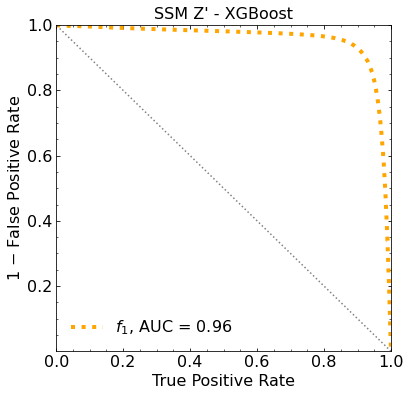


 ########################################

ML iteration  2


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65109	validation_1-logloss:0.65115
[1]	validation_0-logloss:0.61608	validation_1-logloss:0.61601
[2]	validation_0-logloss:0.58594	validation_1-logloss:0.58596
[3]	validation_0-logloss:0.55944	validation_1-logloss:0.55954
[4]	validation_0-logloss:0.53671	validation_1-logloss:0.53685
[5]	validation_0-logloss:0.51595	validation_1-logloss:0.51626
[6]	validation_0-logloss:0.49811	validation_1-logloss:0.49848
[7]	validation_0-logloss:0.48055	validation_1-logloss:0.48106
[8]	validation_0-logloss:0.46564	validation_1-logloss:0.46613
[9]	validation_0-logloss:0.45350	validation_1-logloss:0.45389
[10]	validation_0-logloss:0.44326	validation_1-logloss:0.44375
[11]	validation_0-logloss:0.43093	validation_1-logloss:0.43155
[12]	validation_0-logloss:0.42130	validation_1-logloss:0.42205
[13]	validation_0-logloss:0.41249	validation_1-logloss:0.41323
[14]	validation_0-logloss:0.40474	validation_1-logloss:0.40552
[15]	validation_0-logloss:0.39687	validation_1-logloss:0.39770
[1

[130]	validation_0-logloss:0.25057	validation_1-logloss:0.25558
[131]	validation_0-logloss:0.25046	validation_1-logloss:0.25550
[132]	validation_0-logloss:0.25036	validation_1-logloss:0.25544
[133]	validation_0-logloss:0.25028	validation_1-logloss:0.25538
[134]	validation_0-logloss:0.25017	validation_1-logloss:0.25530
[135]	validation_0-logloss:0.25001	validation_1-logloss:0.25517
[136]	validation_0-logloss:0.24993	validation_1-logloss:0.25511
[137]	validation_0-logloss:0.24980	validation_1-logloss:0.25498
[138]	validation_0-logloss:0.24969	validation_1-logloss:0.25489
[139]	validation_0-logloss:0.24963	validation_1-logloss:0.25486
[140]	validation_0-logloss:0.24953	validation_1-logloss:0.25479
[141]	validation_0-logloss:0.24938	validation_1-logloss:0.25466
[142]	validation_0-logloss:0.24928	validation_1-logloss:0.25460
[143]	validation_0-logloss:0.24924	validation_1-logloss:0.25458
[144]	validation_0-logloss:0.24917	validation_1-logloss:0.25454
[145]	validation_0-logloss:0.24912	valid

[259]	validation_0-logloss:0.24227	validation_1-logloss:0.25102
[260]	validation_0-logloss:0.24224	validation_1-logloss:0.25102
[261]	validation_0-logloss:0.24222	validation_1-logloss:0.25102
[262]	validation_0-logloss:0.24218	validation_1-logloss:0.25101
[263]	validation_0-logloss:0.24216	validation_1-logloss:0.25101
[264]	validation_0-logloss:0.24215	validation_1-logloss:0.25101
[265]	validation_0-logloss:0.24213	validation_1-logloss:0.25101
[266]	validation_0-logloss:0.24210	validation_1-logloss:0.25102
[267]	validation_0-logloss:0.24207	validation_1-logloss:0.25101
[268]	validation_0-logloss:0.24204	validation_1-logloss:0.25100
[269]	validation_0-logloss:0.24199	validation_1-logloss:0.25099
[270]	validation_0-logloss:0.24195	validation_1-logloss:0.25099
[271]	validation_0-logloss:0.24191	validation_1-logloss:0.25099
[272]	validation_0-logloss:0.24185	validation_1-logloss:0.25096
[273]	validation_0-logloss:0.24184	validation_1-logloss:0.25096
[274]	validation_0-logloss:0.24183	valid

[388]	validation_0-logloss:0.23815	validation_1-logloss:0.25026
[389]	validation_0-logloss:0.23813	validation_1-logloss:0.25026
[390]	validation_0-logloss:0.23809	validation_1-logloss:0.25027
[391]	validation_0-logloss:0.23807	validation_1-logloss:0.25027
[392]	validation_0-logloss:0.23806	validation_1-logloss:0.25027
[393]	validation_0-logloss:0.23804	validation_1-logloss:0.25027
[394]	validation_0-logloss:0.23802	validation_1-logloss:0.25027
[395]	validation_0-logloss:0.23795	validation_1-logloss:0.25022
[396]	validation_0-logloss:0.23790	validation_1-logloss:0.25020
[397]	validation_0-logloss:0.23786	validation_1-logloss:0.25019
[398]	validation_0-logloss:0.23784	validation_1-logloss:0.25019
[399]	validation_0-logloss:0.23781	validation_1-logloss:0.25019
[400]	validation_0-logloss:0.23778	validation_1-logloss:0.25019
[401]	validation_0-logloss:0.23776	validation_1-logloss:0.25018
[402]	validation_0-logloss:0.23775	validation_1-logloss:0.25019
[403]	validation_0-logloss:0.23771	valid

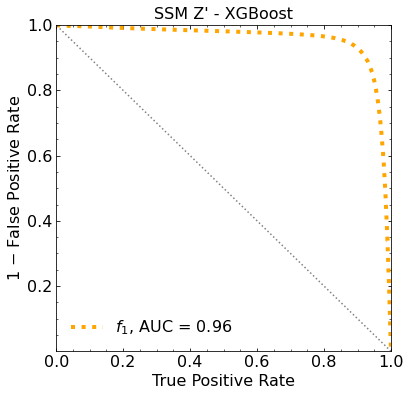


 ########################################

ML iteration  3


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65101	validation_1-logloss:0.65097
[1]	validation_0-logloss:0.61612	validation_1-logloss:0.61604
[2]	validation_0-logloss:0.58505	validation_1-logloss:0.58490
[3]	validation_0-logloss:0.55899	validation_1-logloss:0.55881
[4]	validation_0-logloss:0.53659	validation_1-logloss:0.53632
[5]	validation_0-logloss:0.51713	validation_1-logloss:0.51683
[6]	validation_0-logloss:0.49944	validation_1-logloss:0.49906
[7]	validation_0-logloss:0.48380	validation_1-logloss:0.48346
[8]	validation_0-logloss:0.46977	validation_1-logloss:0.46941
[9]	validation_0-logloss:0.45530	validation_1-logloss:0.45509
[10]	validation_0-logloss:0.44401	validation_1-logloss:0.44377
[11]	validation_0-logloss:0.43235	validation_1-logloss:0.43217
[12]	validation_0-logloss:0.42288	validation_1-logloss:0.42279
[13]	validation_0-logloss:0.41273	validation_1-logloss:0.41274
[14]	validation_0-logloss:0.40351	validation_1-logloss:0.40358
[15]	validation_0-logloss:0.39552	validation_1-logloss:0.39559
[1

[130]	validation_0-logloss:0.25119	validation_1-logloss:0.25533
[131]	validation_0-logloss:0.25109	validation_1-logloss:0.25525
[132]	validation_0-logloss:0.25101	validation_1-logloss:0.25519
[133]	validation_0-logloss:0.25086	validation_1-logloss:0.25505
[134]	validation_0-logloss:0.25075	validation_1-logloss:0.25497
[135]	validation_0-logloss:0.25064	validation_1-logloss:0.25489
[136]	validation_0-logloss:0.25045	validation_1-logloss:0.25474
[137]	validation_0-logloss:0.25035	validation_1-logloss:0.25467
[138]	validation_0-logloss:0.25030	validation_1-logloss:0.25465
[139]	validation_0-logloss:0.25018	validation_1-logloss:0.25455
[140]	validation_0-logloss:0.24992	validation_1-logloss:0.25435
[141]	validation_0-logloss:0.24988	validation_1-logloss:0.25433
[142]	validation_0-logloss:0.24983	validation_1-logloss:0.25430
[143]	validation_0-logloss:0.24967	validation_1-logloss:0.25416
[144]	validation_0-logloss:0.24961	validation_1-logloss:0.25412
[145]	validation_0-logloss:0.24950	valid

[259]	validation_0-logloss:0.24354	validation_1-logloss:0.25141
[260]	validation_0-logloss:0.24350	validation_1-logloss:0.25140
[261]	validation_0-logloss:0.24344	validation_1-logloss:0.25139
[262]	validation_0-logloss:0.24342	validation_1-logloss:0.25139
[263]	validation_0-logloss:0.24340	validation_1-logloss:0.25139
[264]	validation_0-logloss:0.24339	validation_1-logloss:0.25139
[265]	validation_0-logloss:0.24336	validation_1-logloss:0.25138
[266]	validation_0-logloss:0.24334	validation_1-logloss:0.25139
[267]	validation_0-logloss:0.24331	validation_1-logloss:0.25138
[268]	validation_0-logloss:0.24326	validation_1-logloss:0.25137
[269]	validation_0-logloss:0.24323	validation_1-logloss:0.25137
[270]	validation_0-logloss:0.24321	validation_1-logloss:0.25135
[271]	validation_0-logloss:0.24316	validation_1-logloss:0.25135
[272]	validation_0-logloss:0.24309	validation_1-logloss:0.25132
[273]	validation_0-logloss:0.24305	validation_1-logloss:0.25130
[274]	validation_0-logloss:0.24302	valid

[388]	validation_0-logloss:0.23859	validation_1-logloss:0.25001
[389]	validation_0-logloss:0.23858	validation_1-logloss:0.25001
[390]	validation_0-logloss:0.23855	validation_1-logloss:0.25000
[391]	validation_0-logloss:0.23853	validation_1-logloss:0.25000
[392]	validation_0-logloss:0.23852	validation_1-logloss:0.25001
[393]	validation_0-logloss:0.23850	validation_1-logloss:0.25001
[394]	validation_0-logloss:0.23847	validation_1-logloss:0.25001
[395]	validation_0-logloss:0.23845	validation_1-logloss:0.25000
[396]	validation_0-logloss:0.23844	validation_1-logloss:0.25000
[397]	validation_0-logloss:0.23843	validation_1-logloss:0.25000
[398]	validation_0-logloss:0.23835	validation_1-logloss:0.24999
[399]	validation_0-logloss:0.23834	validation_1-logloss:0.24999
[400]	validation_0-logloss:0.23833	validation_1-logloss:0.25000
[401]	validation_0-logloss:0.23832	validation_1-logloss:0.25000
[402]	validation_0-logloss:0.23830	validation_1-logloss:0.25000
[403]	validation_0-logloss:0.23827	valid

[517]	validation_0-logloss:0.23499	validation_1-logloss:0.24958
[518]	validation_0-logloss:0.23497	validation_1-logloss:0.24958
[519]	validation_0-logloss:0.23494	validation_1-logloss:0.24957
[520]	validation_0-logloss:0.23490	validation_1-logloss:0.24957
[521]	validation_0-logloss:0.23488	validation_1-logloss:0.24957
[522]	validation_0-logloss:0.23486	validation_1-logloss:0.24958
[523]	validation_0-logloss:0.23484	validation_1-logloss:0.24958
[524]	validation_0-logloss:0.23482	validation_1-logloss:0.24958
[525]	validation_0-logloss:0.23478	validation_1-logloss:0.24958
[526]	validation_0-logloss:0.23475	validation_1-logloss:0.24959
[527]	validation_0-logloss:0.23474	validation_1-logloss:0.24960
[528]	validation_0-logloss:0.23468	validation_1-logloss:0.24958
[529]	validation_0-logloss:0.23461	validation_1-logloss:0.24957
[530]	validation_0-logloss:0.23458	validation_1-logloss:0.24957
[531]	validation_0-logloss:0.23457	validation_1-logloss:0.24957
[532]	validation_0-logloss:0.23453	valid

[646]	validation_0-logloss:0.23166	validation_1-logloss:0.24927
[647]	validation_0-logloss:0.23165	validation_1-logloss:0.24928
[648]	validation_0-logloss:0.23162	validation_1-logloss:0.24927
[649]	validation_0-logloss:0.23159	validation_1-logloss:0.24927
[650]	validation_0-logloss:0.23157	validation_1-logloss:0.24928
[651]	validation_0-logloss:0.23155	validation_1-logloss:0.24928
[652]	validation_0-logloss:0.23154	validation_1-logloss:0.24928
[653]	validation_0-logloss:0.23153	validation_1-logloss:0.24929
[654]	validation_0-logloss:0.23151	validation_1-logloss:0.24929
[655]	validation_0-logloss:0.23148	validation_1-logloss:0.24929
[656]	validation_0-logloss:0.23147	validation_1-logloss:0.24929
[657]	validation_0-logloss:0.23145	validation_1-logloss:0.24929
[658]	validation_0-logloss:0.23144	validation_1-logloss:0.24929
[659]	validation_0-logloss:0.23143	validation_1-logloss:0.24929
[660]	validation_0-logloss:0.23143	validation_1-logloss:0.24929
[661]	validation_0-logloss:0.23142	valid

[775]	validation_0-logloss:0.22838	validation_1-logloss:0.24911
[776]	validation_0-logloss:0.22835	validation_1-logloss:0.24911
[777]	validation_0-logloss:0.22835	validation_1-logloss:0.24912
[778]	validation_0-logloss:0.22834	validation_1-logloss:0.24912
[779]	validation_0-logloss:0.22833	validation_1-logloss:0.24911
[780]	validation_0-logloss:0.22830	validation_1-logloss:0.24911
[781]	validation_0-logloss:0.22828	validation_1-logloss:0.24912
[782]	validation_0-logloss:0.22827	validation_1-logloss:0.24912
[783]	validation_0-logloss:0.22826	validation_1-logloss:0.24913
[784]	validation_0-logloss:0.22825	validation_1-logloss:0.24913
[785]	validation_0-logloss:0.22824	validation_1-logloss:0.24913
[786]	validation_0-logloss:0.22823	validation_1-logloss:0.24914
[787]	validation_0-logloss:0.22818	validation_1-logloss:0.24915
[788]	validation_0-logloss:0.22818	validation_1-logloss:0.24915
[789]	validation_0-logloss:0.22818	validation_1-logloss:0.24915
[790]	validation_0-logloss:0.22816	valid

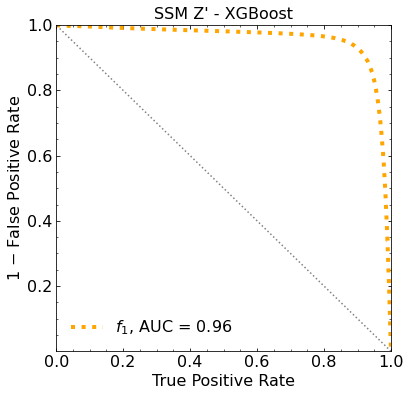


 ########################################

ML iteration  4


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65171	validation_1-logloss:0.65180
[1]	validation_0-logloss:0.61629	validation_1-logloss:0.61629
[2]	validation_0-logloss:0.58568	validation_1-logloss:0.58580
[3]	validation_0-logloss:0.55853	validation_1-logloss:0.55856
[4]	validation_0-logloss:0.53614	validation_1-logloss:0.53625
[5]	validation_0-logloss:0.51623	validation_1-logloss:0.51631
[6]	validation_0-logloss:0.49902	validation_1-logloss:0.49924
[7]	validation_0-logloss:0.48279	validation_1-logloss:0.48302
[8]	validation_0-logloss:0.46887	validation_1-logloss:0.46916
[9]	validation_0-logloss:0.45465	validation_1-logloss:0.45492
[10]	validation_0-logloss:0.44331	validation_1-logloss:0.44362
[11]	validation_0-logloss:0.43239	validation_1-logloss:0.43276
[12]	validation_0-logloss:0.42254	validation_1-logloss:0.42299
[13]	validation_0-logloss:0.41350	validation_1-logloss:0.41400
[14]	validation_0-logloss:0.40457	validation_1-logloss:0.40506
[15]	validation_0-logloss:0.39663	validation_1-logloss:0.39720
[1

[130]	validation_0-logloss:0.25108	validation_1-logloss:0.25569
[131]	validation_0-logloss:0.25095	validation_1-logloss:0.25560
[132]	validation_0-logloss:0.25085	validation_1-logloss:0.25554
[133]	validation_0-logloss:0.25078	validation_1-logloss:0.25550
[134]	validation_0-logloss:0.25063	validation_1-logloss:0.25536
[135]	validation_0-logloss:0.25048	validation_1-logloss:0.25527
[136]	validation_0-logloss:0.25040	validation_1-logloss:0.25522
[137]	validation_0-logloss:0.25023	validation_1-logloss:0.25512
[138]	validation_0-logloss:0.25016	validation_1-logloss:0.25505
[139]	validation_0-logloss:0.25011	validation_1-logloss:0.25503
[140]	validation_0-logloss:0.25000	validation_1-logloss:0.25496
[141]	validation_0-logloss:0.24992	validation_1-logloss:0.25491
[142]	validation_0-logloss:0.24987	validation_1-logloss:0.25488
[143]	validation_0-logloss:0.24964	validation_1-logloss:0.25472
[144]	validation_0-logloss:0.24958	validation_1-logloss:0.25469
[145]	validation_0-logloss:0.24947	valid

[259]	validation_0-logloss:0.24271	validation_1-logloss:0.25107
[260]	validation_0-logloss:0.24269	validation_1-logloss:0.25107
[261]	validation_0-logloss:0.24267	validation_1-logloss:0.25107
[262]	validation_0-logloss:0.24263	validation_1-logloss:0.25107
[263]	validation_0-logloss:0.24262	validation_1-logloss:0.25107
[264]	validation_0-logloss:0.24259	validation_1-logloss:0.25107
[265]	validation_0-logloss:0.24257	validation_1-logloss:0.25107
[266]	validation_0-logloss:0.24254	validation_1-logloss:0.25107
[267]	validation_0-logloss:0.24252	validation_1-logloss:0.25107
[268]	validation_0-logloss:0.24247	validation_1-logloss:0.25105
[269]	validation_0-logloss:0.24243	validation_1-logloss:0.25103
[270]	validation_0-logloss:0.24241	validation_1-logloss:0.25103
[271]	validation_0-logloss:0.24235	validation_1-logloss:0.25102
[272]	validation_0-logloss:0.24226	validation_1-logloss:0.25097
[273]	validation_0-logloss:0.24223	validation_1-logloss:0.25097
[274]	validation_0-logloss:0.24220	valid

[388]	validation_0-logloss:0.23835	validation_1-logloss:0.25011
[389]	validation_0-logloss:0.23833	validation_1-logloss:0.25011
[390]	validation_0-logloss:0.23831	validation_1-logloss:0.25011
[391]	validation_0-logloss:0.23828	validation_1-logloss:0.25009
[392]	validation_0-logloss:0.23826	validation_1-logloss:0.25010
[393]	validation_0-logloss:0.23824	validation_1-logloss:0.25010
[394]	validation_0-logloss:0.23822	validation_1-logloss:0.25010
[395]	validation_0-logloss:0.23820	validation_1-logloss:0.25010
[396]	validation_0-logloss:0.23815	validation_1-logloss:0.25009
[397]	validation_0-logloss:0.23812	validation_1-logloss:0.25009
[398]	validation_0-logloss:0.23807	validation_1-logloss:0.25008
[399]	validation_0-logloss:0.23805	validation_1-logloss:0.25008
[400]	validation_0-logloss:0.23801	validation_1-logloss:0.25008
[401]	validation_0-logloss:0.23792	validation_1-logloss:0.25001
[402]	validation_0-logloss:0.23786	validation_1-logloss:0.24999
[403]	validation_0-logloss:0.23781	valid

[517]	validation_0-logloss:0.23413	validation_1-logloss:0.24941
[518]	validation_0-logloss:0.23409	validation_1-logloss:0.24941
[519]	validation_0-logloss:0.23406	validation_1-logloss:0.24941
[520]	validation_0-logloss:0.23403	validation_1-logloss:0.24942
[521]	validation_0-logloss:0.23401	validation_1-logloss:0.24942
[522]	validation_0-logloss:0.23400	validation_1-logloss:0.24942
[523]	validation_0-logloss:0.23400	validation_1-logloss:0.24942
[524]	validation_0-logloss:0.23399	validation_1-logloss:0.24942
[525]	validation_0-logloss:0.23397	validation_1-logloss:0.24943
[526]	validation_0-logloss:0.23395	validation_1-logloss:0.24943
[527]	validation_0-logloss:0.23393	validation_1-logloss:0.24943
[528]	validation_0-logloss:0.23391	validation_1-logloss:0.24943
[529]	validation_0-logloss:0.23390	validation_1-logloss:0.24944
[530]	validation_0-logloss:0.23386	validation_1-logloss:0.24943
[531]	validation_0-logloss:0.23384	validation_1-logloss:0.24943
[532]	validation_0-logloss:0.23383	valid

[646]	validation_0-logloss:0.23081	validation_1-logloss:0.24927
[647]	validation_0-logloss:0.23077	validation_1-logloss:0.24927
[648]	validation_0-logloss:0.23074	validation_1-logloss:0.24926
[649]	validation_0-logloss:0.23073	validation_1-logloss:0.24926
[650]	validation_0-logloss:0.23067	validation_1-logloss:0.24924
[651]	validation_0-logloss:0.23064	validation_1-logloss:0.24924
[652]	validation_0-logloss:0.23063	validation_1-logloss:0.24924
[653]	validation_0-logloss:0.23061	validation_1-logloss:0.24924
[654]	validation_0-logloss:0.23059	validation_1-logloss:0.24924
[655]	validation_0-logloss:0.23056	validation_1-logloss:0.24925
[656]	validation_0-logloss:0.23054	validation_1-logloss:0.24925
[657]	validation_0-logloss:0.23052	validation_1-logloss:0.24926
[658]	validation_0-logloss:0.23051	validation_1-logloss:0.24926
[659]	validation_0-logloss:0.23048	validation_1-logloss:0.24926
[660]	validation_0-logloss:0.23047	validation_1-logloss:0.24926
[661]	validation_0-logloss:0.23045	valid

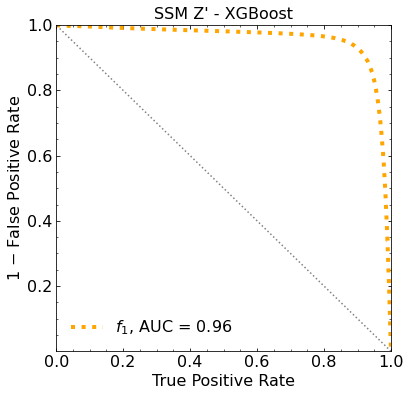


 ########################################

ML iteration  5


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65128	validation_1-logloss:0.65122
[1]	validation_0-logloss:0.61614	validation_1-logloss:0.61613
[2]	validation_0-logloss:0.58692	validation_1-logloss:0.58679
[3]	validation_0-logloss:0.55886	validation_1-logloss:0.55893
[4]	validation_0-logloss:0.53523	validation_1-logloss:0.53529
[5]	validation_0-logloss:0.51589	validation_1-logloss:0.51600
[6]	validation_0-logloss:0.49797	validation_1-logloss:0.49818
[7]	validation_0-logloss:0.48207	validation_1-logloss:0.48238
[8]	validation_0-logloss:0.46651	validation_1-logloss:0.46675
[9]	validation_0-logloss:0.45433	validation_1-logloss:0.45459
[10]	validation_0-logloss:0.44078	validation_1-logloss:0.44108
[11]	validation_0-logloss:0.43092	validation_1-logloss:0.43136
[12]	validation_0-logloss:0.42116	validation_1-logloss:0.42163
[13]	validation_0-logloss:0.41151	validation_1-logloss:0.41200
[14]	validation_0-logloss:0.40286	validation_1-logloss:0.40339
[15]	validation_0-logloss:0.39540	validation_1-logloss:0.39607
[1

[130]	validation_0-logloss:0.25046	validation_1-logloss:0.25536
[131]	validation_0-logloss:0.25034	validation_1-logloss:0.25527
[132]	validation_0-logloss:0.25029	validation_1-logloss:0.25525
[133]	validation_0-logloss:0.25008	validation_1-logloss:0.25507
[134]	validation_0-logloss:0.24999	validation_1-logloss:0.25501
[135]	validation_0-logloss:0.24995	validation_1-logloss:0.25499
[136]	validation_0-logloss:0.24963	validation_1-logloss:0.25472
[137]	validation_0-logloss:0.24956	validation_1-logloss:0.25469
[138]	validation_0-logloss:0.24935	validation_1-logloss:0.25451
[139]	validation_0-logloss:0.24918	validation_1-logloss:0.25439
[140]	validation_0-logloss:0.24909	validation_1-logloss:0.25431
[141]	validation_0-logloss:0.24902	validation_1-logloss:0.25426
[142]	validation_0-logloss:0.24896	validation_1-logloss:0.25423
[143]	validation_0-logloss:0.24889	validation_1-logloss:0.25418
[144]	validation_0-logloss:0.24874	validation_1-logloss:0.25406
[145]	validation_0-logloss:0.24870	valid

[259]	validation_0-logloss:0.24279	validation_1-logloss:0.25108
[260]	validation_0-logloss:0.24276	validation_1-logloss:0.25109
[261]	validation_0-logloss:0.24272	validation_1-logloss:0.25107
[262]	validation_0-logloss:0.24269	validation_1-logloss:0.25107
[263]	validation_0-logloss:0.24265	validation_1-logloss:0.25107
[264]	validation_0-logloss:0.24258	validation_1-logloss:0.25106
[265]	validation_0-logloss:0.24252	validation_1-logloss:0.25102
[266]	validation_0-logloss:0.24247	validation_1-logloss:0.25101
[267]	validation_0-logloss:0.24244	validation_1-logloss:0.25101
[268]	validation_0-logloss:0.24244	validation_1-logloss:0.25101
[269]	validation_0-logloss:0.24243	validation_1-logloss:0.25101
[270]	validation_0-logloss:0.24241	validation_1-logloss:0.25101
[271]	validation_0-logloss:0.24238	validation_1-logloss:0.25101
[272]	validation_0-logloss:0.24236	validation_1-logloss:0.25101
[273]	validation_0-logloss:0.24230	validation_1-logloss:0.25100
[274]	validation_0-logloss:0.24227	valid

[388]	validation_0-logloss:0.23824	validation_1-logloss:0.24996
[389]	validation_0-logloss:0.23820	validation_1-logloss:0.24996
[390]	validation_0-logloss:0.23817	validation_1-logloss:0.24996
[391]	validation_0-logloss:0.23811	validation_1-logloss:0.24996
[392]	validation_0-logloss:0.23805	validation_1-logloss:0.24994
[393]	validation_0-logloss:0.23804	validation_1-logloss:0.24994
[394]	validation_0-logloss:0.23803	validation_1-logloss:0.24994
[395]	validation_0-logloss:0.23798	validation_1-logloss:0.24992
[396]	validation_0-logloss:0.23785	validation_1-logloss:0.24984
[397]	validation_0-logloss:0.23778	validation_1-logloss:0.24979
[398]	validation_0-logloss:0.23774	validation_1-logloss:0.24979
[399]	validation_0-logloss:0.23770	validation_1-logloss:0.24979
[400]	validation_0-logloss:0.23768	validation_1-logloss:0.24979
[401]	validation_0-logloss:0.23762	validation_1-logloss:0.24977
[402]	validation_0-logloss:0.23755	validation_1-logloss:0.24974
[403]	validation_0-logloss:0.23745	valid

[517]	validation_0-logloss:0.23419	validation_1-logloss:0.24931
[518]	validation_0-logloss:0.23417	validation_1-logloss:0.24930
[519]	validation_0-logloss:0.23415	validation_1-logloss:0.24931
[520]	validation_0-logloss:0.23413	validation_1-logloss:0.24930
[521]	validation_0-logloss:0.23410	validation_1-logloss:0.24930
[522]	validation_0-logloss:0.23409	validation_1-logloss:0.24930
[523]	validation_0-logloss:0.23407	validation_1-logloss:0.24930
[524]	validation_0-logloss:0.23405	validation_1-logloss:0.24930
[525]	validation_0-logloss:0.23401	validation_1-logloss:0.24929
[526]	validation_0-logloss:0.23398	validation_1-logloss:0.24930
[527]	validation_0-logloss:0.23396	validation_1-logloss:0.24930
[528]	validation_0-logloss:0.23395	validation_1-logloss:0.24930
[529]	validation_0-logloss:0.23393	validation_1-logloss:0.24930
[530]	validation_0-logloss:0.23391	validation_1-logloss:0.24931
[531]	validation_0-logloss:0.23388	validation_1-logloss:0.24930
[532]	validation_0-logloss:0.23386	valid

[646]	validation_0-logloss:0.23116	validation_1-logloss:0.24924
[647]	validation_0-logloss:0.23114	validation_1-logloss:0.24924
[648]	validation_0-logloss:0.23110	validation_1-logloss:0.24924
[649]	validation_0-logloss:0.23109	validation_1-logloss:0.24924
[650]	validation_0-logloss:0.23105	validation_1-logloss:0.24924
[651]	validation_0-logloss:0.23105	validation_1-logloss:0.24924
[652]	validation_0-logloss:0.23101	validation_1-logloss:0.24925
[653]	validation_0-logloss:0.23098	validation_1-logloss:0.24925
[654]	validation_0-logloss:0.23097	validation_1-logloss:0.24926
[655]	validation_0-logloss:0.23095	validation_1-logloss:0.24926
[656]	validation_0-logloss:0.23092	validation_1-logloss:0.24926
[657]	validation_0-logloss:0.23092	validation_1-logloss:0.24926
[658]	validation_0-logloss:0.23089	validation_1-logloss:0.24927
[659]	validation_0-logloss:0.23084	validation_1-logloss:0.24926
[660]	validation_0-logloss:0.23078	validation_1-logloss:0.24924
[661]	validation_0-logloss:0.23075	valid

[775]	validation_0-logloss:0.22771	validation_1-logloss:0.24902
[776]	validation_0-logloss:0.22768	validation_1-logloss:0.24902
[777]	validation_0-logloss:0.22767	validation_1-logloss:0.24902
[778]	validation_0-logloss:0.22766	validation_1-logloss:0.24902
[779]	validation_0-logloss:0.22766	validation_1-logloss:0.24902
[780]	validation_0-logloss:0.22765	validation_1-logloss:0.24903
[781]	validation_0-logloss:0.22764	validation_1-logloss:0.24903
[782]	validation_0-logloss:0.22760	validation_1-logloss:0.24902
[783]	validation_0-logloss:0.22758	validation_1-logloss:0.24903
[784]	validation_0-logloss:0.22756	validation_1-logloss:0.24903
[785]	validation_0-logloss:0.22755	validation_1-logloss:0.24903
[786]	validation_0-logloss:0.22754	validation_1-logloss:0.24903
[787]	validation_0-logloss:0.22753	validation_1-logloss:0.24903
[788]	validation_0-logloss:0.22750	validation_1-logloss:0.24904
[789]	validation_0-logloss:0.22749	validation_1-logloss:0.24904
[790]	validation_0-logloss:0.22746	valid

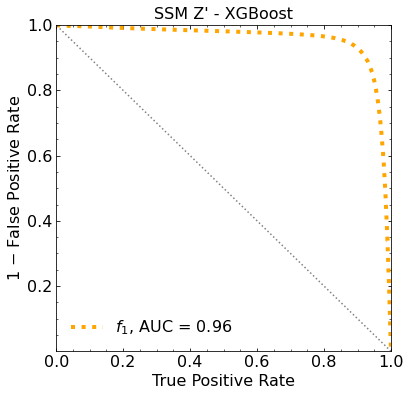


 ########################################

ML iteration  6


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65132	validation_1-logloss:0.65128
[1]	validation_0-logloss:0.61603	validation_1-logloss:0.61606
[2]	validation_0-logloss:0.58607	validation_1-logloss:0.58600
[3]	validation_0-logloss:0.55902	validation_1-logloss:0.55912
[4]	validation_0-logloss:0.53543	validation_1-logloss:0.53531
[5]	validation_0-logloss:0.51573	validation_1-logloss:0.51578
[6]	validation_0-logloss:0.49816	validation_1-logloss:0.49812
[7]	validation_0-logloss:0.48238	validation_1-logloss:0.48222
[8]	validation_0-logloss:0.46689	validation_1-logloss:0.46687
[9]	validation_0-logloss:0.45456	validation_1-logloss:0.45459
[10]	validation_0-logloss:0.44237	validation_1-logloss:0.44257
[11]	validation_0-logloss:0.43226	validation_1-logloss:0.43251
[12]	validation_0-logloss:0.42200	validation_1-logloss:0.42230
[13]	validation_0-logloss:0.41309	validation_1-logloss:0.41342
[14]	validation_0-logloss:0.40532	validation_1-logloss:0.40562
[15]	validation_0-logloss:0.39680	validation_1-logloss:0.39711
[1

[130]	validation_0-logloss:0.25083	validation_1-logloss:0.25536
[131]	validation_0-logloss:0.25066	validation_1-logloss:0.25524
[132]	validation_0-logloss:0.25057	validation_1-logloss:0.25518
[133]	validation_0-logloss:0.25049	validation_1-logloss:0.25512
[134]	validation_0-logloss:0.25035	validation_1-logloss:0.25502
[135]	validation_0-logloss:0.25021	validation_1-logloss:0.25492
[136]	validation_0-logloss:0.25015	validation_1-logloss:0.25488
[137]	validation_0-logloss:0.25007	validation_1-logloss:0.25481
[138]	validation_0-logloss:0.24996	validation_1-logloss:0.25472
[139]	validation_0-logloss:0.24989	validation_1-logloss:0.25469
[140]	validation_0-logloss:0.24980	validation_1-logloss:0.25464
[141]	validation_0-logloss:0.24973	validation_1-logloss:0.25459
[142]	validation_0-logloss:0.24950	validation_1-logloss:0.25443
[143]	validation_0-logloss:0.24936	validation_1-logloss:0.25433
[144]	validation_0-logloss:0.24931	validation_1-logloss:0.25430
[145]	validation_0-logloss:0.24920	valid

[259]	validation_0-logloss:0.24278	validation_1-logloss:0.25116
[260]	validation_0-logloss:0.24275	validation_1-logloss:0.25114
[261]	validation_0-logloss:0.24273	validation_1-logloss:0.25113
[262]	validation_0-logloss:0.24268	validation_1-logloss:0.25112
[263]	validation_0-logloss:0.24264	validation_1-logloss:0.25111
[264]	validation_0-logloss:0.24257	validation_1-logloss:0.25109
[265]	validation_0-logloss:0.24255	validation_1-logloss:0.25108
[266]	validation_0-logloss:0.24250	validation_1-logloss:0.25108
[267]	validation_0-logloss:0.24235	validation_1-logloss:0.25098
[268]	validation_0-logloss:0.24231	validation_1-logloss:0.25097
[269]	validation_0-logloss:0.24230	validation_1-logloss:0.25096
[270]	validation_0-logloss:0.24229	validation_1-logloss:0.25096
[271]	validation_0-logloss:0.24225	validation_1-logloss:0.25096
[272]	validation_0-logloss:0.24220	validation_1-logloss:0.25096
[273]	validation_0-logloss:0.24215	validation_1-logloss:0.25094
[274]	validation_0-logloss:0.24211	valid

[388]	validation_0-logloss:0.23826	validation_1-logloss:0.25019
[389]	validation_0-logloss:0.23822	validation_1-logloss:0.25019
[390]	validation_0-logloss:0.23819	validation_1-logloss:0.25020
[391]	validation_0-logloss:0.23817	validation_1-logloss:0.25020
[392]	validation_0-logloss:0.23812	validation_1-logloss:0.25020
[393]	validation_0-logloss:0.23808	validation_1-logloss:0.25018
[394]	validation_0-logloss:0.23801	validation_1-logloss:0.25015
[395]	validation_0-logloss:0.23790	validation_1-logloss:0.25009
[396]	validation_0-logloss:0.23788	validation_1-logloss:0.25010
[397]	validation_0-logloss:0.23786	validation_1-logloss:0.25010
[398]	validation_0-logloss:0.23784	validation_1-logloss:0.25010
[399]	validation_0-logloss:0.23780	validation_1-logloss:0.25009
[400]	validation_0-logloss:0.23778	validation_1-logloss:0.25009
[401]	validation_0-logloss:0.23775	validation_1-logloss:0.25008
[402]	validation_0-logloss:0.23773	validation_1-logloss:0.25008
[403]	validation_0-logloss:0.23771	valid

[517]	validation_0-logloss:0.23405	validation_1-logloss:0.24944
[518]	validation_0-logloss:0.23403	validation_1-logloss:0.24944
[519]	validation_0-logloss:0.23400	validation_1-logloss:0.24944
[520]	validation_0-logloss:0.23399	validation_1-logloss:0.24944
[521]	validation_0-logloss:0.23396	validation_1-logloss:0.24945
[522]	validation_0-logloss:0.23394	validation_1-logloss:0.24945
[523]	validation_0-logloss:0.23391	validation_1-logloss:0.24945
[524]	validation_0-logloss:0.23390	validation_1-logloss:0.24945
[525]	validation_0-logloss:0.23389	validation_1-logloss:0.24945
[526]	validation_0-logloss:0.23387	validation_1-logloss:0.24946
[527]	validation_0-logloss:0.23386	validation_1-logloss:0.24946
[528]	validation_0-logloss:0.23384	validation_1-logloss:0.24946
[529]	validation_0-logloss:0.23382	validation_1-logloss:0.24946
[530]	validation_0-logloss:0.23380	validation_1-logloss:0.24946
[531]	validation_0-logloss:0.23378	validation_1-logloss:0.24946
[532]	validation_0-logloss:0.23373	valid

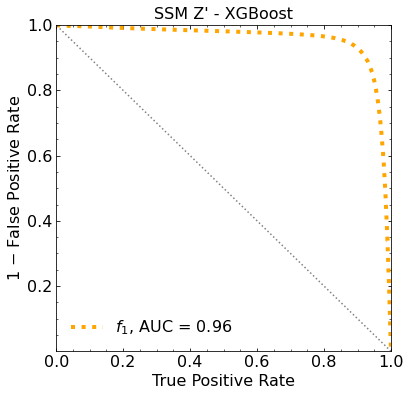


 ########################################

ML iteration  7


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65133	validation_1-logloss:0.65130
[1]	validation_0-logloss:0.61633	validation_1-logloss:0.61608
[2]	validation_0-logloss:0.58595	validation_1-logloss:0.58560
[3]	validation_0-logloss:0.55945	validation_1-logloss:0.55908
[4]	validation_0-logloss:0.53658	validation_1-logloss:0.53622
[5]	validation_0-logloss:0.51725	validation_1-logloss:0.51676
[6]	validation_0-logloss:0.50045	validation_1-logloss:0.50018
[7]	validation_0-logloss:0.48419	validation_1-logloss:0.48399
[8]	validation_0-logloss:0.47031	validation_1-logloss:0.46999
[9]	validation_0-logloss:0.45572	validation_1-logloss:0.45548
[10]	validation_0-logloss:0.44449	validation_1-logloss:0.44444
[11]	validation_0-logloss:0.43280	validation_1-logloss:0.43279
[12]	validation_0-logloss:0.42280	validation_1-logloss:0.42284
[13]	validation_0-logloss:0.41285	validation_1-logloss:0.41283
[14]	validation_0-logloss:0.40378	validation_1-logloss:0.40378
[15]	validation_0-logloss:0.39607	validation_1-logloss:0.39614
[1

[130]	validation_0-logloss:0.25191	validation_1-logloss:0.25591
[131]	validation_0-logloss:0.25184	validation_1-logloss:0.25585
[132]	validation_0-logloss:0.25171	validation_1-logloss:0.25576
[133]	validation_0-logloss:0.25161	validation_1-logloss:0.25568
[134]	validation_0-logloss:0.25152	validation_1-logloss:0.25559
[135]	validation_0-logloss:0.25136	validation_1-logloss:0.25547
[136]	validation_0-logloss:0.25131	validation_1-logloss:0.25544
[137]	validation_0-logloss:0.25121	validation_1-logloss:0.25539
[138]	validation_0-logloss:0.25106	validation_1-logloss:0.25526
[139]	validation_0-logloss:0.25099	validation_1-logloss:0.25520
[140]	validation_0-logloss:0.25090	validation_1-logloss:0.25515
[141]	validation_0-logloss:0.25083	validation_1-logloss:0.25510
[142]	validation_0-logloss:0.25076	validation_1-logloss:0.25505
[143]	validation_0-logloss:0.25064	validation_1-logloss:0.25495
[144]	validation_0-logloss:0.25059	validation_1-logloss:0.25492
[145]	validation_0-logloss:0.25052	valid

[259]	validation_0-logloss:0.24365	validation_1-logloss:0.25133
[260]	validation_0-logloss:0.24364	validation_1-logloss:0.25132
[261]	validation_0-logloss:0.24363	validation_1-logloss:0.25132
[262]	validation_0-logloss:0.24348	validation_1-logloss:0.25123
[263]	validation_0-logloss:0.24344	validation_1-logloss:0.25123
[264]	validation_0-logloss:0.24335	validation_1-logloss:0.25116
[265]	validation_0-logloss:0.24331	validation_1-logloss:0.25115
[266]	validation_0-logloss:0.24329	validation_1-logloss:0.25115
[267]	validation_0-logloss:0.24326	validation_1-logloss:0.25114
[268]	validation_0-logloss:0.24320	validation_1-logloss:0.25112
[269]	validation_0-logloss:0.24319	validation_1-logloss:0.25112
[270]	validation_0-logloss:0.24316	validation_1-logloss:0.25112
[271]	validation_0-logloss:0.24313	validation_1-logloss:0.25111
[272]	validation_0-logloss:0.24309	validation_1-logloss:0.25111
[273]	validation_0-logloss:0.24308	validation_1-logloss:0.25111
[274]	validation_0-logloss:0.24306	valid

[388]	validation_0-logloss:0.23888	validation_1-logloss:0.25015
[389]	validation_0-logloss:0.23886	validation_1-logloss:0.25015
[390]	validation_0-logloss:0.23885	validation_1-logloss:0.25016
[391]	validation_0-logloss:0.23882	validation_1-logloss:0.25015
[392]	validation_0-logloss:0.23880	validation_1-logloss:0.25015
[393]	validation_0-logloss:0.23877	validation_1-logloss:0.25016
[394]	validation_0-logloss:0.23864	validation_1-logloss:0.25006
[395]	validation_0-logloss:0.23862	validation_1-logloss:0.25006
[396]	validation_0-logloss:0.23860	validation_1-logloss:0.25006
[397]	validation_0-logloss:0.23858	validation_1-logloss:0.25006
[398]	validation_0-logloss:0.23857	validation_1-logloss:0.25006
[399]	validation_0-logloss:0.23852	validation_1-logloss:0.25006
[400]	validation_0-logloss:0.23844	validation_1-logloss:0.25002
[401]	validation_0-logloss:0.23843	validation_1-logloss:0.25002
[402]	validation_0-logloss:0.23841	validation_1-logloss:0.25002
[403]	validation_0-logloss:0.23838	valid

[517]	validation_0-logloss:0.23502	validation_1-logloss:0.24963
[518]	validation_0-logloss:0.23497	validation_1-logloss:0.24962
[519]	validation_0-logloss:0.23495	validation_1-logloss:0.24962
[520]	validation_0-logloss:0.23492	validation_1-logloss:0.24962
[521]	validation_0-logloss:0.23490	validation_1-logloss:0.24963
[522]	validation_0-logloss:0.23484	validation_1-logloss:0.24960
[523]	validation_0-logloss:0.23483	validation_1-logloss:0.24960
[524]	validation_0-logloss:0.23480	validation_1-logloss:0.24960
[525]	validation_0-logloss:0.23478	validation_1-logloss:0.24961
[526]	validation_0-logloss:0.23477	validation_1-logloss:0.24961
[527]	validation_0-logloss:0.23476	validation_1-logloss:0.24961
[528]	validation_0-logloss:0.23474	validation_1-logloss:0.24961
[529]	validation_0-logloss:0.23471	validation_1-logloss:0.24960
[530]	validation_0-logloss:0.23469	validation_1-logloss:0.24960
[531]	validation_0-logloss:0.23467	validation_1-logloss:0.24960
[532]	validation_0-logloss:0.23460	valid

[646]	validation_0-logloss:0.23182	validation_1-logloss:0.24952
[647]	validation_0-logloss:0.23181	validation_1-logloss:0.24952
[648]	validation_0-logloss:0.23178	validation_1-logloss:0.24952
[649]	validation_0-logloss:0.23177	validation_1-logloss:0.24953
[650]	validation_0-logloss:0.23177	validation_1-logloss:0.24953
[651]	validation_0-logloss:0.23175	validation_1-logloss:0.24953
[652]	validation_0-logloss:0.23173	validation_1-logloss:0.24954
[653]	validation_0-logloss:0.23170	validation_1-logloss:0.24954
[654]	validation_0-logloss:0.23170	validation_1-logloss:0.24954
[655]	validation_0-logloss:0.23169	validation_1-logloss:0.24955
[656]	validation_0-logloss:0.23165	validation_1-logloss:0.24955


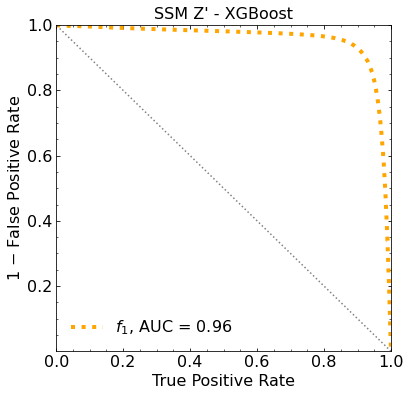


 ########################################

ML iteration  8


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65112	validation_1-logloss:0.65110
[1]	validation_0-logloss:0.61590	validation_1-logloss:0.61579
[2]	validation_0-logloss:0.58552	validation_1-logloss:0.58546
[3]	validation_0-logloss:0.55978	validation_1-logloss:0.55958
[4]	validation_0-logloss:0.53491	validation_1-logloss:0.53493
[5]	validation_0-logloss:0.51413	validation_1-logloss:0.51412
[6]	validation_0-logloss:0.49676	validation_1-logloss:0.49681
[7]	validation_0-logloss:0.48108	validation_1-logloss:0.48106
[8]	validation_0-logloss:0.46794	validation_1-logloss:0.46801
[9]	validation_0-logloss:0.45514	validation_1-logloss:0.45519
[10]	validation_0-logloss:0.44390	validation_1-logloss:0.44397
[11]	validation_0-logloss:0.43411	validation_1-logloss:0.43420
[12]	validation_0-logloss:0.42443	validation_1-logloss:0.42462
[13]	validation_0-logloss:0.41459	validation_1-logloss:0.41477
[14]	validation_0-logloss:0.40639	validation_1-logloss:0.40660
[15]	validation_0-logloss:0.39841	validation_1-logloss:0.39875
[1

[130]	validation_0-logloss:0.25150	validation_1-logloss:0.25558
[131]	validation_0-logloss:0.25141	validation_1-logloss:0.25550
[132]	validation_0-logloss:0.25127	validation_1-logloss:0.25537
[133]	validation_0-logloss:0.25118	validation_1-logloss:0.25532
[134]	validation_0-logloss:0.25110	validation_1-logloss:0.25524
[135]	validation_0-logloss:0.25092	validation_1-logloss:0.25510
[136]	validation_0-logloss:0.25084	validation_1-logloss:0.25505
[137]	validation_0-logloss:0.25058	validation_1-logloss:0.25488
[138]	validation_0-logloss:0.25039	validation_1-logloss:0.25472
[139]	validation_0-logloss:0.25033	validation_1-logloss:0.25470
[140]	validation_0-logloss:0.25013	validation_1-logloss:0.25452
[141]	validation_0-logloss:0.25006	validation_1-logloss:0.25446
[142]	validation_0-logloss:0.25001	validation_1-logloss:0.25443
[143]	validation_0-logloss:0.24991	validation_1-logloss:0.25434
[144]	validation_0-logloss:0.24985	validation_1-logloss:0.25430
[145]	validation_0-logloss:0.24979	valid

[259]	validation_0-logloss:0.24373	validation_1-logloss:0.25122
[260]	validation_0-logloss:0.24371	validation_1-logloss:0.25122
[261]	validation_0-logloss:0.24369	validation_1-logloss:0.25122
[262]	validation_0-logloss:0.24366	validation_1-logloss:0.25122
[263]	validation_0-logloss:0.24363	validation_1-logloss:0.25122
[264]	validation_0-logloss:0.24352	validation_1-logloss:0.25116
[265]	validation_0-logloss:0.24349	validation_1-logloss:0.25116
[266]	validation_0-logloss:0.24347	validation_1-logloss:0.25116
[267]	validation_0-logloss:0.24343	validation_1-logloss:0.25115
[268]	validation_0-logloss:0.24338	validation_1-logloss:0.25115
[269]	validation_0-logloss:0.24335	validation_1-logloss:0.25115
[270]	validation_0-logloss:0.24332	validation_1-logloss:0.25115
[271]	validation_0-logloss:0.24330	validation_1-logloss:0.25115
[272]	validation_0-logloss:0.24309	validation_1-logloss:0.25098
[273]	validation_0-logloss:0.24307	validation_1-logloss:0.25098
[274]	validation_0-logloss:0.24306	valid

[388]	validation_0-logloss:0.23912	validation_1-logloss:0.25009
[389]	validation_0-logloss:0.23911	validation_1-logloss:0.25010
[390]	validation_0-logloss:0.23909	validation_1-logloss:0.25010
[391]	validation_0-logloss:0.23906	validation_1-logloss:0.25010
[392]	validation_0-logloss:0.23902	validation_1-logloss:0.25009
[393]	validation_0-logloss:0.23901	validation_1-logloss:0.25009
[394]	validation_0-logloss:0.23899	validation_1-logloss:0.25009
[395]	validation_0-logloss:0.23896	validation_1-logloss:0.25009
[396]	validation_0-logloss:0.23895	validation_1-logloss:0.25009
[397]	validation_0-logloss:0.23892	validation_1-logloss:0.25009
[398]	validation_0-logloss:0.23891	validation_1-logloss:0.25009
[399]	validation_0-logloss:0.23888	validation_1-logloss:0.25009
[400]	validation_0-logloss:0.23887	validation_1-logloss:0.25009
[401]	validation_0-logloss:0.23884	validation_1-logloss:0.25009
[402]	validation_0-logloss:0.23880	validation_1-logloss:0.25009
[403]	validation_0-logloss:0.23879	valid

[517]	validation_0-logloss:0.23490	validation_1-logloss:0.24951
[518]	validation_0-logloss:0.23488	validation_1-logloss:0.24951
[519]	validation_0-logloss:0.23484	validation_1-logloss:0.24951
[520]	validation_0-logloss:0.23483	validation_1-logloss:0.24951
[521]	validation_0-logloss:0.23481	validation_1-logloss:0.24952
[522]	validation_0-logloss:0.23478	validation_1-logloss:0.24952
[523]	validation_0-logloss:0.23476	validation_1-logloss:0.24952
[524]	validation_0-logloss:0.23470	validation_1-logloss:0.24950
[525]	validation_0-logloss:0.23468	validation_1-logloss:0.24950
[526]	validation_0-logloss:0.23466	validation_1-logloss:0.24950
[527]	validation_0-logloss:0.23463	validation_1-logloss:0.24951
[528]	validation_0-logloss:0.23463	validation_1-logloss:0.24951
[529]	validation_0-logloss:0.23461	validation_1-logloss:0.24951
[530]	validation_0-logloss:0.23458	validation_1-logloss:0.24952
[531]	validation_0-logloss:0.23455	validation_1-logloss:0.24951
[532]	validation_0-logloss:0.23450	valid

[646]	validation_0-logloss:0.23157	validation_1-logloss:0.24932
[647]	validation_0-logloss:0.23155	validation_1-logloss:0.24932
[648]	validation_0-logloss:0.23154	validation_1-logloss:0.24933
[649]	validation_0-logloss:0.23151	validation_1-logloss:0.24933
[650]	validation_0-logloss:0.23148	validation_1-logloss:0.24933
[651]	validation_0-logloss:0.23146	validation_1-logloss:0.24933
[652]	validation_0-logloss:0.23146	validation_1-logloss:0.24933
[653]	validation_0-logloss:0.23143	validation_1-logloss:0.24934
[654]	validation_0-logloss:0.23139	validation_1-logloss:0.24934
[655]	validation_0-logloss:0.23134	validation_1-logloss:0.24934
[656]	validation_0-logloss:0.23132	validation_1-logloss:0.24934
[657]	validation_0-logloss:0.23130	validation_1-logloss:0.24934
[658]	validation_0-logloss:0.23127	validation_1-logloss:0.24935
[659]	validation_0-logloss:0.23125	validation_1-logloss:0.24935
[660]	validation_0-logloss:0.23120	validation_1-logloss:0.24935
[661]	validation_0-logloss:0.23118	valid

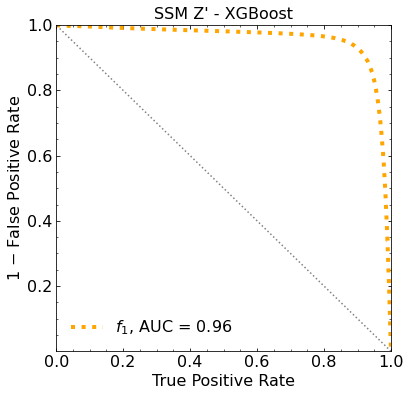


 ########################################

ML iteration  9


/home/andres/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0]	validation_0-logloss:0.65123	validation_1-logloss:0.65126
[1]	validation_0-logloss:0.61627	validation_1-logloss:0.61620
[2]	validation_0-logloss:0.58596	validation_1-logloss:0.58592
[3]	validation_0-logloss:0.56003	validation_1-logloss:0.55984
[4]	validation_0-logloss:0.53679	validation_1-logloss:0.53679
[5]	validation_0-logloss:0.51717	validation_1-logloss:0.51714
[6]	validation_0-logloss:0.49908	validation_1-logloss:0.49894
[7]	validation_0-logloss:0.48361	validation_1-logloss:0.48349
[8]	validation_0-logloss:0.47016	validation_1-logloss:0.47006
[9]	validation_0-logloss:0.45589	validation_1-logloss:0.45581
[10]	validation_0-logloss:0.44435	validation_1-logloss:0.44432
[11]	validation_0-logloss:0.43281	validation_1-logloss:0.43277
[12]	validation_0-logloss:0.42355	validation_1-logloss:0.42352
[13]	validation_0-logloss:0.41300	validation_1-logloss:0.41317
[14]	validation_0-logloss:0.40427	validation_1-logloss:0.40450
[15]	validation_0-logloss:0.39637	validation_1-logloss:0.39673
[1

[130]	validation_0-logloss:0.25094	validation_1-logloss:0.25543
[131]	validation_0-logloss:0.25086	validation_1-logloss:0.25537
[132]	validation_0-logloss:0.25079	validation_1-logloss:0.25531
[133]	validation_0-logloss:0.25073	validation_1-logloss:0.25528
[134]	validation_0-logloss:0.25066	validation_1-logloss:0.25524
[135]	validation_0-logloss:0.25057	validation_1-logloss:0.25518
[136]	validation_0-logloss:0.25048	validation_1-logloss:0.25512
[137]	validation_0-logloss:0.25044	validation_1-logloss:0.25509
[138]	validation_0-logloss:0.25037	validation_1-logloss:0.25505
[139]	validation_0-logloss:0.25033	validation_1-logloss:0.25503
[140]	validation_0-logloss:0.25016	validation_1-logloss:0.25491
[141]	validation_0-logloss:0.24991	validation_1-logloss:0.25472
[142]	validation_0-logloss:0.24982	validation_1-logloss:0.25466
[143]	validation_0-logloss:0.24974	validation_1-logloss:0.25461
[144]	validation_0-logloss:0.24968	validation_1-logloss:0.25458
[145]	validation_0-logloss:0.24940	valid

[259]	validation_0-logloss:0.24329	validation_1-logloss:0.25151
[260]	validation_0-logloss:0.24325	validation_1-logloss:0.25151
[261]	validation_0-logloss:0.24324	validation_1-logloss:0.25150
[262]	validation_0-logloss:0.24322	validation_1-logloss:0.25150
[263]	validation_0-logloss:0.24319	validation_1-logloss:0.25150
[264]	validation_0-logloss:0.24314	validation_1-logloss:0.25148
[265]	validation_0-logloss:0.24312	validation_1-logloss:0.25148
[266]	validation_0-logloss:0.24309	validation_1-logloss:0.25148
[267]	validation_0-logloss:0.24306	validation_1-logloss:0.25148
[268]	validation_0-logloss:0.24303	validation_1-logloss:0.25145
[269]	validation_0-logloss:0.24291	validation_1-logloss:0.25142
[270]	validation_0-logloss:0.24286	validation_1-logloss:0.25139
[271]	validation_0-logloss:0.24283	validation_1-logloss:0.25139
[272]	validation_0-logloss:0.24280	validation_1-logloss:0.25139
[273]	validation_0-logloss:0.24271	validation_1-logloss:0.25133
[274]	validation_0-logloss:0.24250	valid

[388]	validation_0-logloss:0.23863	validation_1-logloss:0.25039
[389]	validation_0-logloss:0.23862	validation_1-logloss:0.25038
[390]	validation_0-logloss:0.23860	validation_1-logloss:0.25038
[391]	validation_0-logloss:0.23857	validation_1-logloss:0.25039
[392]	validation_0-logloss:0.23856	validation_1-logloss:0.25039
[393]	validation_0-logloss:0.23852	validation_1-logloss:0.25039
[394]	validation_0-logloss:0.23851	validation_1-logloss:0.25039
[395]	validation_0-logloss:0.23850	validation_1-logloss:0.25039
[396]	validation_0-logloss:0.23848	validation_1-logloss:0.25040
[397]	validation_0-logloss:0.23847	validation_1-logloss:0.25040
[398]	validation_0-logloss:0.23840	validation_1-logloss:0.25036
[399]	validation_0-logloss:0.23835	validation_1-logloss:0.25034
[400]	validation_0-logloss:0.23835	validation_1-logloss:0.25034
[401]	validation_0-logloss:0.23834	validation_1-logloss:0.25034
[402]	validation_0-logloss:0.23832	validation_1-logloss:0.25034
[403]	validation_0-logloss:0.23829	valid

[517]	validation_0-logloss:0.23465	validation_1-logloss:0.24974
[518]	validation_0-logloss:0.23463	validation_1-logloss:0.24974
[519]	validation_0-logloss:0.23460	validation_1-logloss:0.24974
[520]	validation_0-logloss:0.23459	validation_1-logloss:0.24974
[521]	validation_0-logloss:0.23458	validation_1-logloss:0.24974
[522]	validation_0-logloss:0.23458	validation_1-logloss:0.24974
[523]	validation_0-logloss:0.23456	validation_1-logloss:0.24974
[524]	validation_0-logloss:0.23455	validation_1-logloss:0.24974
[525]	validation_0-logloss:0.23453	validation_1-logloss:0.24974
[526]	validation_0-logloss:0.23451	validation_1-logloss:0.24974
[527]	validation_0-logloss:0.23449	validation_1-logloss:0.24974
[528]	validation_0-logloss:0.23447	validation_1-logloss:0.24975
[529]	validation_0-logloss:0.23440	validation_1-logloss:0.24972
[530]	validation_0-logloss:0.23436	validation_1-logloss:0.24972
[531]	validation_0-logloss:0.23433	validation_1-logloss:0.24972
[532]	validation_0-logloss:0.23432	valid

[646]	validation_0-logloss:0.23114	validation_1-logloss:0.24951
[647]	validation_0-logloss:0.23112	validation_1-logloss:0.24951
[648]	validation_0-logloss:0.23110	validation_1-logloss:0.24951
[649]	validation_0-logloss:0.23107	validation_1-logloss:0.24950
[650]	validation_0-logloss:0.23105	validation_1-logloss:0.24951
[651]	validation_0-logloss:0.23104	validation_1-logloss:0.24951
[652]	validation_0-logloss:0.23103	validation_1-logloss:0.24951
[653]	validation_0-logloss:0.23103	validation_1-logloss:0.24951
[654]	validation_0-logloss:0.23101	validation_1-logloss:0.24952
[655]	validation_0-logloss:0.23099	validation_1-logloss:0.24952
[656]	validation_0-logloss:0.23097	validation_1-logloss:0.24951
[657]	validation_0-logloss:0.23095	validation_1-logloss:0.24951
[658]	validation_0-logloss:0.23090	validation_1-logloss:0.24950
[659]	validation_0-logloss:0.23087	validation_1-logloss:0.24950
[660]	validation_0-logloss:0.23086	validation_1-logloss:0.24950
[661]	validation_0-logloss:0.23084	valid

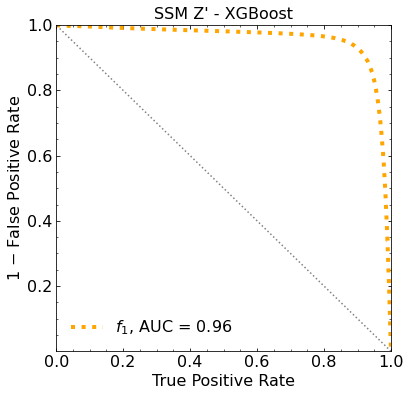


 ########################################



In [14]:
# XGBoost with only the kinematic variables of the leptons

iterations_ML = 10

print('ML iteration 1')

# CLASSIFIER
classifier = XGBClassifier(
    n_estimators=2500,
    learning_rate=0.1,
    reg_lambda=0.0,reg_alpha=0.0,
    gamma=0.0,objective='binary:logistic',
    max_depth=5)

ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

# FIT
classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
        eval_metric='logloss',early_stopping_rounds=50,#early stopping
        verbose=True)

# PREDICTIONS
y_pred_xg_aux = classifier.predict_proba(X_mon_test).T[1]
y_pred_xg_auxRE = np.reshape(y_pred_xg_aux, (1,len(y_pred_xg_aux)))


# ROC
fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


# PLOT THE ROC WITH AUC
fig = plt.figure(figsize=(6, 6))
gs = gridspec.GridSpec(1, 1) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax0.minorticks_on()


plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
plt.plot([1,0],[0,1],ls=":",color="grey")
plt.xlabel("True Positive Rate",fontsize=16)
plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
plt.legend()
plt.title(r"SSM Z' - XGBoost",fontsize=16)
plt.xlim([0,1])
plt.ylim([0,1])
plt.yticks([0.2,0.4,0.6,0.8,1.])
plt.legend(frameon=False,fontsize=16)
plt.show()




print('\n ########################################\n')





for it in range(1,iterations_ML):

    print('ML iteration ', it)
    
    # CLASSIFIER
    classifier = XGBClassifier(
        n_estimators=2500,
        learning_rate=0.1,
        reg_lambda=0.0,reg_alpha=0.0,
        gamma=0.0,objective='binary:logistic',
        max_depth=5)

    ran_ind = np.random.choice(np.arange(len(X_mon_train)), size = len(X_mon_train), replace = True)

    # FIT
    classifier.fit(X_mon_train[ran_ind],y_mon_train[ran_ind],eval_set=[(X_mon_train[ran_ind], y_mon_train[ran_ind]), (X_mon_val, y_mon_val)],
            eval_metric='logloss',early_stopping_rounds=50,#early stopping
            verbose=True)

    # PREDICTIONS
    y_pred_xg_aux_it = classifier.predict_proba(X_mon_test).T[1]
    y_pred_xg_auxRE_it = np.reshape(y_pred_xg_aux_it, (1,len(y_pred_xg_aux_it)))
    
    y_pred_xg_auxRE = np.concatenate([y_pred_xg_auxRE,y_pred_xg_auxRE_it])


    # ROC
    fpr_mon_xg, tpr_mon_xg, _ = roc_curve(y_mon_test, y_pred_xg_aux)
    roc_auc_xg = auc(fpr_mon_xg, tpr_mon_xg)


    # PLOT THE ROC WITH AUC
    fig = plt.figure(figsize=(6, 6))
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax0.minorticks_on()


    plt.plot(tpr_mon_xg,1-fpr_mon_xg,label="$f_{1}$, AUC = %0.2f" % roc_auc_xg,color="orange",ls=":",lw=4)
    plt.plot([1,0],[0,1],ls=":",color="grey")
    plt.xlabel("True Positive Rate",fontsize=16)
    plt.ylabel("1 $-$ False Positive Rate",fontsize=16)
    plt.legend()
    plt.title(r"SSM Z' - XGBoost",fontsize=16)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.yticks([0.2,0.4,0.6,0.8,1.])
    plt.legend(frameon=False,fontsize=16)
    plt.show()
    
    print('\n ########################################\n')
    
    
y_pred_xg = np.mean(y_pred_xg_auxRE, axis=0)

Classification score (1ML):


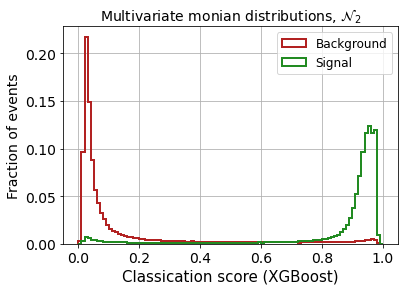

Classification score (10ML):


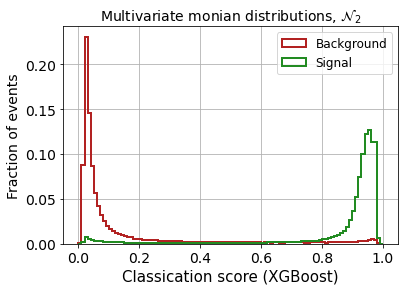

In [15]:
# XGBoost with the kinematic variables of the leptons

########################
# CLASSIFICATION SCORE #
########################

# Outputs for validation data set

pred_XG_SM_1ML = []
pred_XG_NP_1ML = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM_1ML.append(y_pred_xg_1ML[i])
    else:
        pred_XG_NP_1ML.append(y_pred_xg_1ML[i])
        
        
print('Classification score (1ML):')
        
weights = np.ones_like(pred_XG_SM_1ML)/float(len(pred_XG_SM_1ML))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM_1ML, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP_1ML)/float(len(pred_XG_NP_1ML))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP_1ML, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()




# Outputs for validation data set

pred_XG_SM = []
pred_XG_NP = []

for i in range(len(y_mon_test)):
    if y_mon_test[i] == 0:
        pred_XG_SM.append(y_pred_xg[i])
    else:
        pred_XG_NP.append(y_pred_xg[i])
        
        
print('Classification score (10ML):')
        
weights = np.ones_like(pred_XG_SM)/float(len(pred_XG_SM))
nSM, binsSM, patchesSM = plt.hist(pred_XG_SM, 100, weights=weights, range=[0,1], histtype='step', color='firebrick', linewidth=2, label='Background')

weights = np.ones_like(pred_XG_NP)/float(len(pred_XG_NP))
nNP, binsNP, patchesNP = plt.hist(pred_XG_NP, 100, weights=weights, range=[0,1], histtype='step', color='forestgreen', linewidth=2, label='Signal')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Classication score (XGBoost)",fontsize=15)
plt.ylabel("Fraction of events",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
plt.title('Multivariate monian distributions, $\mathcal{N}_{2}$', fontsize=14)
#plt.savefig('images/' + '2monian-output.pdf', format="pdf", bbox_inches="tight")
plt.show()


## METHODS

### 0. Ensembles characteristics

In [16]:
##############
# PARAMETERS #
##############

# requested number of ensembles
n_ensembles = 5000

# number of expected background events per ensemble
B_expected = 5000

# ratio S_expected/B_expected (signal ratio)
SB_ratio = [0.0006, 0.001, 0.0016, 0.0025, 0.005, 0.0075, 0.01, 0.025]





# SOME USEFUL DERIVATED PARAMETERS:

# S_expected:
S_expected = [ int(SB_ratio[iii]*B_expected) for iii in range(len(SB_ratio)) ]
print(S_expected)

# S/\sqrt{B}
SsqrtB = [ S_expected[iii]/(B_expected)**0.5 for iii in range(len(SB_ratio)) ]


ntrials = 5000

[2, 5, 8, 12, 25, 37, 50, 125]


### 0. BINNING WITH CROSS-VALIDATION

### Numbers of bins

 BINNING 


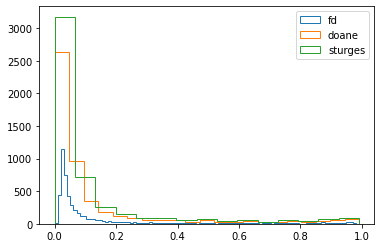

fd 97
doane 21
sturges 15
 


In [17]:
print(' BINNING ')

divs_B = int(len(pred_XG_SM)/B_expected)

B_1 = []
B_2 = []
B_3 = []

for it in range(divs_B):
    datB_grid_SM = pred_XG_SM[(B_expected*it):(B_expected*(it+1))]
    datB_grid_NP = pred_XG_NP[:B_expected]

    B_hist1 = np.histogram_bin_edges(datB_grid_SM, bins = 'fd')
    B_hist2 = np.histogram_bin_edges(datB_grid_SM, bins = 'doane')
    B_hist3 = np.histogram_bin_edges(datB_grid_SM, bins = 'sturges')

    B_1.append(len(B_hist1))
    B_2.append(len(B_hist2))
    B_3.append(len(B_hist3))



B_1_mean = int(np.mean(B_1))
B_2_mean = int(np.mean(B_2))
B_3_mean = int(np.mean(B_3))


B_hist1 = plt.hist(datB_grid_SM, bins = B_1_mean, histtype = 'step', label = 'fd')
B_hist2 = plt.hist(datB_grid_SM, bins = B_2_mean, histtype = 'step', label = 'doane')
B_hist3 = plt.hist(datB_grid_SM, bins = B_3_mean, histtype = 'step', label = 'sturges')
plt.legend()
plt.show()


print('fd', B_1_mean)
print('doane', B_2_mean)
print('sturges', B_3_mean)
print(' ')

B_bins_mean = [B_1_mean, B_2_mean, B_3_mean]

### Binning with cross-validation - equal size bins

In [18]:
# eq size with cross-val method to determine Nbin
Z_bins_XG_CV0 = []
Z_bins_XG_CV1 = []
Z_bins_XG_CV2 = []

Z_bins_XG_CV0_zeros = []
Z_bins_XG_CV1_zeros = []
Z_bins_XG_CV2_zeros = []



for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    
    
    
    
    ###############################
    # EQ SIZE CROSS-VAL FOR Nbins #
    ###############################


    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]

    Z_bins_XG_CV = []
    Z_bins_XG_CV_zeros = []

    for j_it in range(len(B_bins_mean)):

        # bin the parameter space of all background events
        hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(B_bins_mean[j_it]), range = [[min(pred_XG_SM),max(pred_XG_SM)]])
        bin_edges = binedges_back[0]

        if min(hist_back) >= 5*N_ensembles_back:
            print('ok j_it=', j_it)

            # now divide by the number of possible ensembles
            back_prom = hist_back/N_ensembles_back

            # same for signal
            hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
            sig_prom = hist_sig/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_CV_aux = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

        else:
            print('NO ok j_it=', j_it)
            Z_bins_XG_CV_aux = 0

        Z_bins_XG_CV.append(Z_bins_XG_CV_aux)


        # REPLACE the zeros
        hist_back_noceros = []
        for i in range(len(hist_back)):
            if hist_back[i]!=0:
                hist_back_noceros.append(hist_back[i])

        min_back = min(hist_back_noceros)

        # replace the zeros
        for i in range(len(hist_back)):
            if hist_back[i]==0:
                hist_back[i] = min_back

        # now divide by the number of possible ensembles
        back_prom = hist_back/N_ensembles_back

        # same for signal
        hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges])
        sig_prom = hist_sig/N_ensembles_sig

        Z_bins_XG_CV_zeros.append( ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5 )


    Z_bins_XG_CV0.append(Z_bins_XG_CV[0])
    Z_bins_XG_CV1.append(Z_bins_XG_CV[1])
    Z_bins_XG_CV2.append(Z_bins_XG_CV[2])

    Z_bins_XG_CV0_zeros.append(Z_bins_XG_CV_zeros[0])
    Z_bins_XG_CV1_zeros.append(Z_bins_XG_CV_zeros[1])
    Z_bins_XG_CV2_zeros.append(Z_bins_XG_CV_zeros[2])

    print(' ')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
NO ok j_it= 0
ok j_it= 1
ok j_it= 2
 


In [19]:
print(Z_bins_XG_CV0)
print(Z_bins_XG_CV1)
print(Z_bins_XG_CV2)

print(Z_bins_XG_CV0_zeros)
print(Z_bins_XG_CV1_zeros)
print(Z_bins_XG_CV2_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.12870181215051057, 0.3201223646148563, 0.50963143886703, 0.75942453800133, 1.549754394222237, 2.252367025245578, 2.9871652734152363, 6.7999378030768725]
[0.127717453393785, 0.317673552610448, 0.5057335128628695, 0.7536197147382868, 1.5379675858148998, 2.235370009481144, 2.9648719741167313, 6.753632571069439]
[0.13147352921831823, 0.32689029653931156, 0.5202122819971422, 0.7748227190680657, 1.5789599020250724, 2.2922225733893824, 3.0367517759632827, 6.8833262887857]
[0.12870181215051057, 0.3201223646148563, 0.50963143886703, 0.75942453800133, 1.549754394222237, 2.252367025245578, 2.9871652734152363, 6.7999378030768725]
[0.127717453393785, 0.317673552610448, 0.5057335128628695, 0.7536197147382868, 1.5379675858148998, 2.235370009481144, 2.9648719741167313, 6.753632571069439]


In [ ]:
Z_bins_XG_CV0 = 
Z_bins_XG_CV1 = 
Z_bins_XG_CV2 = 

Z_bins_XG_CV0_zeros = 
Z_bins_XG_CV1_zeros = 
Z_bins_XG_CV2_zeros = 

<ipython-input-20-b6791d54c268>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd')
<ipython-input-20-b6791d54c268>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')
<ipython-input-20-b6791d54c268>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges')
<ipython-input-20-b6791d54c268>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argum

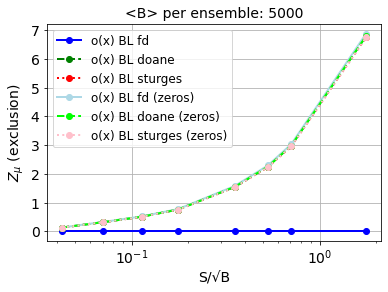

In [20]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-ok', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV1, '--ok', color='green', lw=lw, label='o(x) BL doane')  
plt.plot(posX, Z_bins_XG_CV2, ':ok', color='red', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV0_zeros, '-ok', color='lightblue', lw=lw, label='o(x) BL fd (zeros)') 
plt.plot(posX, Z_bins_XG_CV1_zeros, '--ok', color='lime', lw=lw, label='o(x) BL doane (zeros)') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':ok', color='pink', lw=lw, label='o(x) BL sturges (zeros)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Binning with cross-validation - non-equal size bins

In [22]:
########################################################################
# RANDOM BINNING with CROSS-VAL FOR Nbins and CROSS-VAL for the random #
########################################################################

num_SM = int(len(pred_XG_SM)/6)
num_NP = int(len(pred_XG_NP)/6)

numdat = min(num_SM, num_NP)

data_grid_SM_0 = pred_XG_SM[(0*numdat):(1*numdat)]
data_grid_NP_0 = pred_XG_NP[(0*numdat):(1*numdat)]

data_grid_SM_1 = pred_XG_SM[(1*numdat):(2*numdat)]
data_grid_NP_1 = pred_XG_NP[(1*numdat):(2*numdat)]

data_grid_SM_2 = pred_XG_SM[(2*numdat):(3*numdat)]
data_grid_NP_2 = pred_XG_NP[(2*numdat):(3*numdat)]

data_grid_SM_3 = pred_XG_SM[(3*numdat):(4*numdat)]
data_grid_NP_3 = pred_XG_NP[(3*numdat):(4*numdat)]

data_grid_SM_4 = pred_XG_SM[(4*numdat):(5*numdat)]
data_grid_NP_4 = pred_XG_NP[(4*numdat):(5*numdat)]

data_grid_SM_5 = pred_XG_SM[(5*numdat):(6*numdat)]
data_grid_NP_5 = pred_XG_NP[(5*numdat):(6*numdat)]



# cross-val method to determine the random binning
CV0_chi2 = []
CV1_chi2 = []
CV2_chi2 = []

CV0_chi2_N = []
CV1_chi2_N = []
CV2_chi2_N = []

CV0_MSE = []
CV1_MSE = []
CV2_MSE = []

CV0_poiss = []
CV1_poiss = []
CV2_poiss = []


CV0_chi2_eqsize = []
CV1_chi2_eqsize = []
CV2_chi2_eqsize = []

CV0_chi2_N_eqsize = []
CV1_chi2_N_eqsize = []
CV2_chi2_N_eqsize = []

CV0_MSE_eqsize = []
CV1_MSE_eqsize = []
CV2_MSE_eqsize = []

CV0_poiss_eqsize = []
CV1_poiss_eqsize = []
CV2_poiss_eqsize = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2 = []
Z_bins_XG_CV1_chi2 = []
Z_bins_XG_CV2_chi2 = []

Z_bins_XG_CV0_chi2_N = []
Z_bins_XG_CV1_chi2_N = []
Z_bins_XG_CV2_chi2_N = []

Z_bins_XG_CV0_MSE = []
Z_bins_XG_CV1_MSE = []
Z_bins_XG_CV2_MSE = []

Z_bins_XG_CV0_poiss = []
Z_bins_XG_CV1_poiss = []
Z_bins_XG_CV2_poiss = []


# THE SAME but replacin the zeros in the binning

# cross-val method to determine the random binning
CV0_chi2_zeros = []
CV1_chi2_zeros = []
CV2_chi2_zeros = []

CV0_chi2_N_zeros = []
CV1_chi2_N_zeros = []
CV2_chi2_N_zeros = []

CV0_MSE_zeros = []
CV1_MSE_zeros = []
CV2_MSE_zeros = []

CV0_poiss_zeros = []
CV1_poiss_zeros = []
CV2_poiss_zeros = []


CV0_chi2_eqsize_zeros = []
CV1_chi2_eqsize_zeros = []
CV2_chi2_eqsize_zeros = []

CV0_chi2_N_eqsize_zeros = []
CV1_chi2_N_eqsize_zeros = []
CV2_chi2_N_eqsize_zeros = []

CV0_MSE_eqsize_zeros = []
CV1_MSE_eqsize_zeros = []
CV2_MSE_eqsize_zeros = []

CV0_poiss_eqsize_zeros = []
CV1_poiss_eqsize_zeros = []
CV2_poiss_eqsize_zeros = []


# random with cross-val method to determine Nbin and cross-val method to determine the random binning
Z_bins_XG_CV0_chi2_zeros = []
Z_bins_XG_CV1_chi2_zeros = []
Z_bins_XG_CV2_chi2_zeros = []

Z_bins_XG_CV0_chi2_N_zeros = []
Z_bins_XG_CV1_chi2_N_zeros = []
Z_bins_XG_CV2_chi2_N_zeros = []

Z_bins_XG_CV0_MSE_zeros = []
Z_bins_XG_CV1_MSE_zeros = []
Z_bins_XG_CV2_MSE_zeros = []

Z_bins_XG_CV0_poiss_zeros = []
Z_bins_XG_CV1_poiss_zeros = []
Z_bins_XG_CV2_poiss_zeros = []




for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    Z_bins_XG_CV_rd = []

    chi2 = []
    chi2_N = []
    MSE = []
    poiss = []


    Z_bins_XG_CV_rd_zeros = []

    chi2_zeros = []
    chi2_N_zeros = []
    MSE_zeros = []
    poiss_zeros = []


    # Les't find the number of possible ensembles
    N_ensembles_back = len(data_grid_SM_0) / B_expected
    N_ensembles_sig = len(data_grid_NP_0) / S_expected[iii]



    for j_it in range(len(B_bins_mean)):

        print('doing Nbin: ', B_bins_mean[j_it])

        for i_it in range(ntrials):

            if i_it == 0:
                # bin the parameter space of all background events
                bin_edges = np.linspace( min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]+1) )

            else:
                bin_edges = np.hstack( (min(pred_XG_SM), np.sort( np.random.uniform(min(pred_XG_SM), max(pred_XG_SM), (B_bins_mean[j_it]-1)) ), max(pred_XG_SM) ) )

            hist_SM_0, _ = np.histogramdd([data_grid_SM_0], bins = [bin_edges])
            hist_SM_1, _ = np.histogramdd([data_grid_SM_1], bins = [bin_edges])
            hist_SM_2, _ = np.histogramdd([data_grid_SM_2], bins = [bin_edges])
            hist_SM_3, _ = np.histogramdd([data_grid_SM_3], bins = [bin_edges])

            mean = (hist_SM_0 + hist_SM_1 + hist_SM_2 + hist_SM_3 )/4

            if min(mean)>= 5*N_ensembles_back:

                ##################
                # COMPUTE METRIC #
                ##################
                hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

                aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
                aux_chi2_N = aux_chi2 / j_it
                aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
                aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


                #############
                # COMPUTE Z #
                #############
                # bin the parameter space of all background events
                hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

                # now divide by the number of possible ensembles
                back_prom_5 = hist_SM_5/N_ensembles_back

                # same for signal
                hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

                sig_prom_5 = hist_NP_5/N_ensembles_sig

                # then the signif Z^binned-Asimov:
                Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            else:
                Z_bins_XG_aux = 0
                aux_chi2 = 9999
                aux_chi2_N = 9999
                aux_MSE = 9999
                aux_poiss = 9999

            Z_bins_XG_CV_rd.append(Z_bins_XG_aux)
            chi2.append(aux_chi2)
            chi2_N.append(aux_chi2_N)
            MSE.append(aux_MSE)
            poiss.append(aux_poiss)



            # REPLACE the zeros
            mean_noceros = []
            for i in range(len(mean)):
                if mean[i]!=0:
                    mean_noceros.append(mean[i])

            min_mean = min(mean_noceros)

            # replace the zeros
            for i in range(len(mean)):
                if mean[i]==0:
                    mean[i] = min_mean


            ##################
            # COMPUTE METRIC #
            ##################
            hist_SM_4, _ = np.histogramdd([data_grid_SM_4], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]!=0:
                    hist_back_noceros.append(hist_SM_4[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_4)):
                if hist_SM_4[i]==0:
                    hist_SM_4[i] = min_back

            aux_chi2 = sum( ((hist_SM_4 - mean))**2 / mean )
            aux_chi2_N = aux_chi2 / j_it
            aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it
            aux_poiss = sum( mean - (hist_SM_4*np.log(mean)) + (hist_SM_4*np.log(hist_SM_4)) - hist_SM_4 )


            #############
            # COMPUTE Z #
            #############
            # bin the parameter space of all background events
            hist_SM_5, _ = np.histogramdd([data_grid_SM_5], bins = [bin_edges])

            hist_back_noceros = []
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]!=0:
                    hist_back_noceros.append(hist_SM_5[i])

            min_back = min(hist_back_noceros)

            # replace the zeros
            for i in range(len(hist_SM_5)):
                if hist_SM_5[i]==0:
                    hist_SM_5[i] = min_back

            # now divide by the number of possible ensembles
            back_prom_5 = hist_SM_5/N_ensembles_back

            # same for signal
            hist_NP_5, _ = np.histogramdd([data_grid_NP_5], bins = [bin_edges])

            sig_prom_5 = hist_NP_5/N_ensembles_sig

            # then the signif Z^binned-Asimov:
            Z_bins_XG_aux = ( 2* sum( ( back_prom_5 * np.log( back_prom_5 / (sig_prom_5+back_prom_5) ) ) + sig_prom_5 ) )**0.5


            Z_bins_XG_CV_rd_zeros.append(Z_bins_XG_aux)
            chi2_zeros.append(aux_chi2)
            chi2_N_zeros.append(aux_chi2_N)
            MSE_zeros.append(aux_MSE)
            poiss_zeros.append(aux_poiss)




    ################################################
    # SELECT THE BINNING with MINIMUM METRIC VALUE #
    ################################################

    # the value of the metric
    chi2_per_bin = []
    chi2_N_per_bin = []
    MSE_per_bin = []
    poiss_per_bin = []

    chi2_per_bin_eqsize = []
    chi2_N_per_bin_eqsize = []
    MSE_per_bin_eqsize = []
    poiss_per_bin_eqsize = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin.append( np.min(chi2[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin.append( np.min(chi2_N[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin.append( np.min(MSE[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin.append( np.min(poiss[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize.append( chi2[ntrials*i] )
        chi2_N_per_bin_eqsize.append( chi2_N[ntrials*i] )
        MSE_per_bin_eqsize.append( MSE[ntrials*i] )
        poiss_per_bin_eqsize.append( poiss[ntrials*i] )


    CV0_chi2.append(chi2_per_bin[0])
    CV1_chi2.append(chi2_per_bin[1])
    CV2_chi2.append(chi2_per_bin[2])

    CV0_chi2_N.append(chi2_N_per_bin[0])
    CV1_chi2_N.append(chi2_N_per_bin[1])
    CV2_chi2_N.append(chi2_N_per_bin[2])

    CV0_MSE.append(MSE_per_bin[0])
    CV1_MSE.append(MSE_per_bin[1])
    CV2_MSE.append(MSE_per_bin[2])

    CV0_poiss.append(poiss_per_bin[0])
    CV1_poiss.append(poiss_per_bin[1])
    CV2_poiss.append(poiss_per_bin[2])



    CV0_chi2_eqsize.append(chi2_per_bin_eqsize[0])
    CV1_chi2_eqsize.append(chi2_per_bin_eqsize[1])
    CV2_chi2_eqsize.append(chi2_per_bin_eqsize[2])

    CV0_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[0])
    CV1_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[1])
    CV2_chi2_N_eqsize.append(chi2_N_per_bin_eqsize[2])

    CV0_MSE_eqsize.append(MSE_per_bin_eqsize[0])
    CV1_MSE_eqsize.append(MSE_per_bin_eqsize[1])
    CV2_MSE_eqsize.append(MSE_per_bin_eqsize[2])

    CV0_poiss_eqsize.append(poiss_per_bin_eqsize[0])
    CV1_poiss_eqsize.append(poiss_per_bin_eqsize[1])
    CV2_poiss_eqsize.append(poiss_per_bin_eqsize[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin = []
    Z_chi2_N_per_bin = []
    Z_MSE_per_bin = []
    Z_poiss_per_bin = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin.append( Z_bins_XG_CV_rd[np.argmin(chi2_N[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin.append( Z_bins_XG_CV_rd[np.argmin(MSE[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin.append( Z_bins_XG_CV_rd[np.argmin(poiss[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2.append(Z_chi2_per_bin[0])
    Z_bins_XG_CV1_chi2.append(Z_chi2_per_bin[1])
    Z_bins_XG_CV2_chi2.append(Z_chi2_per_bin[2])

    Z_bins_XG_CV0_chi2_N.append(Z_chi2_N_per_bin[0])
    Z_bins_XG_CV1_chi2_N.append(Z_chi2_N_per_bin[1])
    Z_bins_XG_CV2_chi2_N.append(Z_chi2_N_per_bin[2])

    Z_bins_XG_CV0_MSE.append(Z_MSE_per_bin[0])
    Z_bins_XG_CV1_MSE.append(Z_MSE_per_bin[1])
    Z_bins_XG_CV2_MSE.append(Z_MSE_per_bin[2])

    Z_bins_XG_CV0_poiss.append(Z_poiss_per_bin[0])
    Z_bins_XG_CV1_poiss.append(Z_poiss_per_bin[1])
    Z_bins_XG_CV2_poiss.append(Z_poiss_per_bin[2])




    # SAME for replacing the zeros in the binning
    # the value of the metric
    chi2_per_bin_zeros = []
    chi2_N_per_bin_zeros = []
    MSE_per_bin_zeros = []
    poiss_per_bin_zeros = []

    chi2_per_bin_eqsize_zeros = []
    chi2_N_per_bin_eqsize_zeros = []
    MSE_per_bin_eqsize_zeros = []
    poiss_per_bin_eqsize_zeros = []

    for i in range(len(B_bins_mean)):
        chi2_per_bin_zeros.append( np.min(chi2_zeros[ntrials*i:ntrials*(i+1)]) )
        chi2_N_per_bin_zeros.append( np.min(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) )
        MSE_per_bin_zeros.append( np.min(MSE_zeros[ntrials*i:ntrials*(i+1)]) )
        poiss_per_bin_zeros.append( np.min(poiss_zeros[ntrials*i:ntrials*(i+1)]) )

        chi2_per_bin_eqsize_zeros.append( chi2_zeros[ntrials*i] )
        chi2_N_per_bin_eqsize_zeros.append( chi2_N_zeros[ntrials*i] )
        MSE_per_bin_eqsize_zeros.append( MSE_zeros[ntrials*i] )
        poiss_per_bin_eqsize_zeros.append( poiss_zeros[ntrials*i] )


    CV0_chi2_zeros.append(chi2_per_bin_zeros[0])
    CV1_chi2_zeros.append(chi2_per_bin_zeros[1])
    CV2_chi2_zeros.append(chi2_per_bin_zeros[2])

    CV0_chi2_N_zeros.append(chi2_N_per_bin_zeros[0])
    CV1_chi2_N_zeros.append(chi2_N_per_bin_zeros[1])
    CV2_chi2_N_zeros.append(chi2_N_per_bin_zeros[2])

    CV0_MSE_zeros.append(MSE_per_bin_zeros[0])
    CV1_MSE_zeros.append(MSE_per_bin_zeros[1])
    CV2_MSE_zeros.append(MSE_per_bin_zeros[2])

    CV0_poiss_zeros.append(poiss_per_bin_zeros[0])
    CV1_poiss_zeros.append(poiss_per_bin_zeros[1])
    CV2_poiss_zeros.append(poiss_per_bin_zeros[2])



    CV0_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[0])
    CV1_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[1])
    CV2_chi2_eqsize_zeros.append(chi2_per_bin_eqsize_zeros[2])

    CV0_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[0])
    CV1_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[1])
    CV2_chi2_N_eqsize_zeros.append(chi2_N_per_bin_eqsize_zeros[2])

    CV0_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[0])
    CV1_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[1])
    CV2_MSE_eqsize_zeros.append(MSE_per_bin_eqsize_zeros[2])

    CV0_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[0])
    CV1_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[1])
    CV2_poiss_eqsize_zeros.append(poiss_per_bin_eqsize_zeros[2])




    # Z for the minimum of the metric
    Z_chi2_per_bin_zeros = []
    Z_chi2_N_per_bin_zeros = []
    Z_MSE_per_bin_zeros = []
    Z_poiss_per_bin_zeros = []

    for i in range(len(B_bins_mean)):
        Z_chi2_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_chi2_N_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(chi2_N_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_MSE_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(MSE_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )
        Z_poiss_per_bin_zeros.append( Z_bins_XG_CV_rd_zeros[np.argmin(poiss_zeros[ntrials*i:ntrials*(i+1)]) + ntrials*i] )   



    Z_bins_XG_CV0_chi2_zeros.append(Z_chi2_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_zeros.append(Z_chi2_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_zeros.append(Z_chi2_per_bin_zeros[2])

    Z_bins_XG_CV0_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[0])
    Z_bins_XG_CV1_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[1])
    Z_bins_XG_CV2_chi2_N_zeros.append(Z_chi2_N_per_bin_zeros[2])

    Z_bins_XG_CV0_MSE_zeros.append(Z_MSE_per_bin_zeros[0])
    Z_bins_XG_CV1_MSE_zeros.append(Z_MSE_per_bin_zeros[1])
    Z_bins_XG_CV2_MSE_zeros.append(Z_MSE_per_bin_zeros[2])

    Z_bins_XG_CV0_poiss_zeros.append(Z_poiss_per_bin_zeros[0])
    Z_bins_XG_CV1_poiss_zeros.append(Z_poiss_per_bin_zeros[1])
    Z_bins_XG_CV2_poiss_zeros.append(Z_poiss_per_bin_zeros[2])
    
    print(' ')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
doing Nbin:  97


<ipython-input-22-31abcaeaab5c>:266: RuntimeWarning: divide by zero encountered in double_scalars
  aux_chi2_N = aux_chi2 / j_it
<ipython-input-22-31abcaeaab5c>:267: RuntimeWarning: divide by zero encountered in double_scalars
  aux_MSE = sum( ((hist_SM_4 - mean))**2 ) / j_it


doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 
B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
doing Nbin:  97
doing Nbin:  21
doing Nbin:  15
 


In [23]:
print(Z_bins_XG_CV0_chi2)
print(Z_bins_XG_CV1_chi2)
print(Z_bins_XG_CV2_chi2)

print(Z_bins_XG_CV0_chi2_N)
print(Z_bins_XG_CV1_chi2_N)
print(Z_bins_XG_CV2_chi2_N)

print(Z_bins_XG_CV0_MSE)
print(Z_bins_XG_CV1_MSE)
print(Z_bins_XG_CV2_MSE)

print(Z_bins_XG_CV0_poiss)
print(Z_bins_XG_CV1_poiss)
print(Z_bins_XG_CV2_poiss)



print(Z_bins_XG_CV0_chi2_zeros)
print(Z_bins_XG_CV1_chi2_zeros)
print(Z_bins_XG_CV2_chi2_zeros)

print(Z_bins_XG_CV0_chi2_N_zeros)
print(Z_bins_XG_CV1_chi2_N_zeros)
print(Z_bins_XG_CV2_chi2_N_zeros)

print(Z_bins_XG_CV0_MSE_zeros)
print(Z_bins_XG_CV1_MSE_zeros)
print(Z_bins_XG_CV2_MSE_zeros)

print(Z_bins_XG_CV0_poiss_zeros)
print(Z_bins_XG_CV1_poiss_zeros)
print(Z_bins_XG_CV2_poiss_zeros)

[0, 0, 0, 0, 0, 0, 0, 0]
[0.13114160167478345, 0.3234059383893399, 0.5212593292739436, 0.7726378336061875, 1.577842482242071, 2.297526057009567, 3.0364161415013973, 6.875461836170214]
[0.12969302791405624, 0.3238219941329809, 0.5142805919558907, 0.7543138377588468, 1.5592146569685836, 2.265955002811302, 2.824887143226208, 6.8590272937641314]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.13114160167478345, 0.3234059383893399, 0.5212593292739436, 0.7726378336061875, 1.577842482242071, 2.297526057009567, 3.0364161415013973, 6.875461836170214]
[0.12969302791405624, 0.3238219941329809, 0.5142805919558907, 0.7543138377588468, 1.5592146569685836, 2.265955002811302, 2.824887143226208, 6.8590272937641314]
[0, 0, 0, 0, 0, 0, 0, 0]
[0.13046469011313294, 0.3241815312218153, 0.5104115895763144, 0.7471350226413078, 1.5735901458227526, 2.2699190088195853, 2.976840885624676, 6.726217119069849]
[0.13034012401457018, 0.3238219941329809, 0.4907168517348083, 0.7489705499888065, 1.5641615108394762, 2.267128634786263, 2.9787

In [ ]:
Z_bins_XG_CV0_chi2 = 
Z_bins_XG_CV1_chi2 = 
Z_bins_XG_CV2_chi2 = 

Z_bins_XG_CV0_chi2_N = 
Z_bins_XG_CV1_chi2_N = 
Z_bins_XG_CV2_chi2_N = 

Z_bins_XG_CV0_MSE = 
Z_bins_XG_CV1_MSE = 
Z_bins_XG_CV2_MSE = 

Z_bins_XG_CV0_poiss = 
Z_bins_XG_CV1_poiss = 
Z_bins_XG_CV2_poiss = 



Z_bins_XG_CV0_chi2_zeros = 
Z_bins_XG_CV1_chi2_zeros = 
Z_bins_XG_CV2_chi2_zeros = 

Z_bins_XG_CV0_chi2_N_zeros = 
Z_bins_XG_CV1_chi2_N_zeros = 
Z_bins_XG_CV2_chi2_N_zeros = 

Z_bins_XG_CV0_MSE_zeros = 
Z_bins_XG_CV1_MSE_zeros = 
Z_bins_XG_CV2_MSE_zeros = 

Z_bins_XG_CV0_poiss_zeros = 
Z_bins_XG_CV1_poiss_zeros = 
Z_bins_XG_CV2_poiss_zeros = 

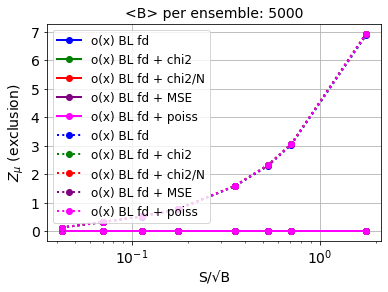

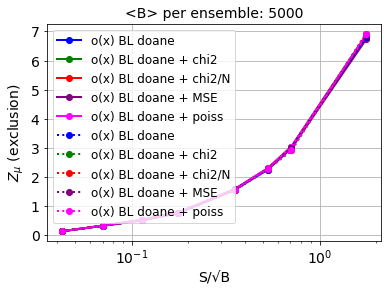

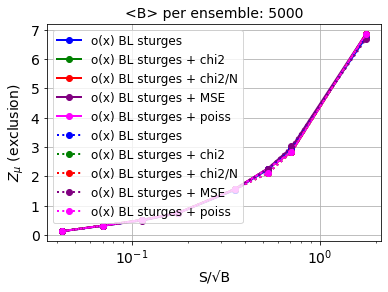

In [24]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV0, '-o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2, '-o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N, '-o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE, '-o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss, '-o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 
plt.plot(posX, Z_bins_XG_CV0_zeros, ':o', color='blue', lw=lw, label='o(x) BL fd') 
plt.plot(posX, Z_bins_XG_CV0_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL fd + chi2')  
plt.plot(posX, Z_bins_XG_CV0_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL fd + chi2/N') 
plt.plot(posX, Z_bins_XG_CV0_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL fd + MSE') 
plt.plot(posX, Z_bins_XG_CV0_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL fd + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()





plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV1, '-o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2, '-o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N, '-o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE, '-o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss, '-o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 
plt.plot(posX, Z_bins_XG_CV1_zeros, ':o', color='blue', lw=lw, label='o(x) BL doane') 
plt.plot(posX, Z_bins_XG_CV1_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL doane + chi2')  
plt.plot(posX, Z_bins_XG_CV1_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL doane + chi2/N') 
plt.plot(posX, Z_bins_XG_CV1_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL doane + MSE') 
plt.plot(posX, Z_bins_XG_CV1_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL doane + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, Z_bins_XG_CV2, '-o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2, '-o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N, '-o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE, '-o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss, '-o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 
plt.plot(posX, Z_bins_XG_CV2_zeros, ':o', color='blue', lw=lw, label='o(x) BL sturges') 
plt.plot(posX, Z_bins_XG_CV2_chi2_zeros, ':o', color='green', lw=lw, label='o(x) BL sturges + chi2')  
plt.plot(posX, Z_bins_XG_CV2_chi2_N_zeros, ':o', color='red', lw=lw, label='o(x) BL sturges + chi2/N') 
plt.plot(posX, Z_bins_XG_CV2_MSE_zeros, ':o', color='purple', lw=lw, label='o(x) BL sturges + MSE') 
plt.plot(posX, Z_bins_XG_CV2_poiss_zeros, ':o', color='magenta', lw=lw, label='o(x) BL sturges + poiss') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 1. BIN LOG LIKELIHOOD

In [18]:
# 1st variable: invariant mass
background_X_1 = invariant_mass_eeSM
signal_X_1 = invariant_mass_eeSSMZprime

N_B = len(background_X_1)
N_S = len(signal_X_1)

# bins
logbins = [2000.0, 2200.0, 2500.0, 2850.0, 3250.0, 3750.0, 4350.0, 5000.0, 5750.0, 6600.0, 7500.0, 8750.0, 10000.0, 11500.0, 13000.0, 20000.0]

In [19]:
#################################
# BINNED POISSON LOG-LIKELIHOOD #
#################################


store_Z_bins = []
store_Z_bins_logbins = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't use an integer number of possible ensembles
    N_ensembles_back = int(N_B / B_expected)
    N_events_back = N_ensembles_back * B_expected

    N_ensembles_sig = int(N_S / S_expected[iii])
    N_events_sig = N_ensembles_sig * S_expected[iii]


    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=(100), range = [[2000,20000]])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=(100), range = [[2000,20000]])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins.append(Z_bins)

    print('Z_bins : ', Z_bins)
    

    
    ############
    # LOG BINS #
    ############
    #Let's find out the expected number of B and S events in each bin:

    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([background_X_1[:N_events_back]], bins=[logbins])
    # now divide by the number of possible ensembles
    back_prom = hist_back.T.ravel()/N_ensembles_back

    # same for signal
    hist_sig, binedges_sig = np.histogramdd([signal_X_1[:N_events_sig]], bins=[logbins])
    sig_prom = hist_sig.T.ravel()/N_ensembles_sig

        

    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    back_prom_noceros = []
    for i in range(len(back_prom)):
        if back_prom[i]!=0:
            back_prom_noceros.append(back_prom[i])

    min_back = min(back_prom_noceros)

    # replace the zeros
    for i in range(len(back_prom)):
        if back_prom[i]==0:
            back_prom[i] = min_back

    # then the signif Z^binned-Asimov:
    Z_bins_logbins = ( 2* sum( ( back_prom * np.log( back_prom/(sig_prom + back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_logbins.append(Z_bins_logbins)

    print('Z_bins_logbins : ', Z_bins_logbins)
    
    
    
    print('\n ----------------------------------- \n')


B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins :  0.1574973448359927
Z_bins_logbins :  0.13248715799063782

 ----------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins :  0.39022445671911943
Z_bins_logbins :  0.3294798716950278

 ----------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins :  0.6189179336264236
Z_bins_logbins :  0.5244371268189316

 ----------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
Z_bins :  0.9179118752460503
Z_bins_logbins :  0.7813101075552071

 ----------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
Z_bins :  1.8474510252497145
Z_bins_logbins :  1.5932872555920863

 ----------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
Z_bins :  2.6557512854031526
Z_bins_logbins :  2.314213760885

In [20]:
print(store_Z_bins)
print(store_Z_bins_logbins)

[0.1574973448359927, 0.39022445671911943, 0.6189179336264236, 0.9179118752460503, 1.8474510252497145, 2.6557512854031526, 3.4859076329640164, 7.622117274076591]
[0.13248715799063782, 0.3294798716950278, 0.5244371268189316, 0.7813101075552071, 1.5932872555920863, 2.3142137608854516, 3.0672394070110385, 6.960375935733528]


In [25]:
store_Z_bins = [0.1574973448359927, 0.39022445671911943, 0.6189179336264236, 0.9179118752460503, 1.8474510252497145, 2.6557512854031526, 3.4859076329640164, 7.622117274076591]

store_Z_bins_logbins = [0.13248715799063782, 0.3294798716950278, 0.5244371268189316, 0.7813101075552071, 1.5932872555920863, 2.3142137608854516, 3.0672394070110385, 6.960375935733528]

<ipython-input-6-3340ebf10fa5>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-6-3340ebf10fa5>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')


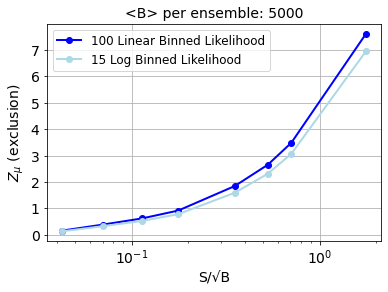

In [6]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, '-ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, '-ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 2. Binned OUTPUT and MLL Asimov

In [22]:
#################################
# MLL Asimov-like #
#################################


store_Z_bins_XG = []

store_Z_bins_XG_15bins = []
store_Z_bins_XG_15bins_1ML = []

store_Z_bins_XG_15bins_eq = []
store_Z_bins_XG_15bins_eq_1ML = []


for iii in range(len(SB_ratio)):

    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])

    # Les't find the number of possible ensembles
    N_ensembles_back = len(pred_XG_SM) / B_expected
    N_ensembles_sig = len(pred_XG_NP) / S_expected[iii]



    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(100), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(100), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG.append(Z_bins_XG)

    print('Z_bins_XG : ', Z_bins_XG)
    
    
    
    
    
    ######################
    # linear bins, 10 ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins.append(Z_bins_XG_15bins)

    print('Z_bins_XG_15bins : ', Z_bins_XG_15bins)
    
    
    
    
    
    ######################
    # linear bins, 1  ML #
    ######################
    
    #Let's find out the expected number of B and S events in each bin:
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=(15), range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=(15), range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_1ML.append(Z_bins_XG_15bins_1ML)

    print('Z_bins_XG_15bins_1ML : ', Z_bins_XG_15bins_1ML)
    
    
    
    
    
    ##########################
    # non linear bins, 10 ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq.append(Z_bins_XG_15bins_eq)

    print('Z_bins_XG_15bins_eq : ', Z_bins_XG_15bins_eq)
    
    
    
    
    
    ##########################
    # non linear bins, 1  ML #
    ##########################
    
    #Let's find out the expected number of B and S events in each bin:
    # same number of B events per bin
    bin_edges_same = pd.qcut(pd.DataFrame(pred_XG_SM_1ML)[0], q = 15, precision=0, retbins = True)[1]
 
    # bin the parameter space of all background events
    hist_back, binedges_back = np.histogramdd([pred_XG_SM_1ML], bins=[bin_edges_same], range = [[0,1]])
    
    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    hist_back_noceros = []
    for i in range(len(hist_back)):
        if hist_back[i]!=0:
            hist_back_noceros.append(hist_back[i])

    min_back = min(hist_back_noceros)

    # replace the zeros
    for i in range(len(hist_back)):
        if hist_back[i]==0:
            hist_back[i] = min_back
    
    # now divide by the number of possible ensembles
    back_prom = hist_back/N_ensembles_back
    # normalized (sum=1)
    back_norm = hist_back/np.sum(hist_back)

    
    
    # same for signal
    hist_sig, binedges_sig = np.histogramdd([pred_XG_NP_1ML], bins=[bin_edges_same], range = [[0,1]])
    sig_prom = hist_sig/N_ensembles_sig
    sig_norm = hist_sig/np.sum(hist_sig)
        


    ##########################################
    # BINNED LIKELIHOOD of CLASSIFIER OUTPUT #
    ##########################################

    # then the signif Z^binned-Asimov:
    Z_bins_XG_15bins_eq_1ML = ( 2* sum( ( back_prom * np.log( back_prom / (sig_prom+back_prom) ) ) + sig_prom ) )**0.5

    store_Z_bins_XG_15bins_eq_1ML.append(Z_bins_XG_15bins_eq_1ML)

    print('Z_bins_XG_15bins_eq_1ML : ', Z_bins_XG_15bins_eq_1ML)


        
    print('\n ----------------------------------------- \n')

B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
Z_bins_XG :  0.1313249011851619
Z_bins_XG_15bins :  0.12699993183762032
Z_bins_XG_15bins_1ML :  0.12608413369742208
Z_bins_XG_15bins_eq :  0.0982289262853765
Z_bins_XG_15bins_eq_1ML :  0.09816336171167273

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
Z_bins_XG :  0.32652568382658254
Z_bins_XG_15bins :  0.3159252452837767
Z_bins_XG_15bins_1ML :  0.3136743607388282
Z_bins_XG_15bins_eq :  0.24491931199907813
Z_bins_XG_15bins_eq_1ML :  0.2447563090892012

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
Z_bins_XG :  0.5196396088309566
Z_bins_XG_15bins :  0.5030063988001434
Z_bins_XG_15bins_1ML :  0.49946480562933304
Z_bins_XG_15bins_eq :  0.3908357749532872
Z_bins_XG_15bins_eq_1ML :  0.39057640397817567

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:

In [23]:
print(store_Z_bins_XG)

print(store_Z_bins_XG_15bins)
print(store_Z_bins_XG_15bins_1ML)

print(store_Z_bins_XG_15bins_eq)
print(store_Z_bins_XG_15bins_eq_1ML)

[0.1313249011851619, 0.32652568382658254, 0.5196396088309566, 0.7739841988785123, 1.5773383676148347, 2.289971580291154, 3.0339015593323855, 6.8781242612586615]
[0.12699993183762032, 0.3159252452837767, 0.5030063988001434, 0.7496636135918988, 1.5305511277952166, 2.22537252449829, 2.9526140684516764, 6.734996219590736]
[0.12608413369742208, 0.3136743607388282, 0.49946480562933304, 0.7444665403071177, 1.5204403726887574, 2.21127529482274, 2.934695220939999, 6.701813965947511]
[0.0982289262853765, 0.24491931199907813, 0.3908357749532872, 0.5842055929954781, 1.2035796157751153, 1.7635050704264945, 2.3579870833636747, 5.572391618148314]
[0.09816336171167273, 0.2447563090892012, 0.39057640397817567, 0.5838193584529203, 1.2027933549223473, 1.7623651970446346, 2.356479751711776, 5.569025812435195]


In [26]:
store_Z_bins_XG = [0.1313249011851619, 0.32652568382658254, 0.5196396088309566, 0.7739841988785123, 1.5773383676148347, 2.289971580291154, 3.0339015593323855, 6.8781242612586615]

store_Z_bins_XG_15bins = [0.12699993183762032, 0.3159252452837767, 0.5030063988001434, 0.7496636135918988, 1.5305511277952166, 2.22537252449829, 2.9526140684516764, 6.734996219590736]
store_Z_bins_XG_15bins_1ML = [0.12608413369742208, 0.3136743607388282, 0.49946480562933304, 0.7444665403071177, 1.5204403726887574, 2.21127529482274, 2.934695220939999, 6.701813965947511]

store_Z_bins_XG_15bins_eq = [0.0982289262853765, 0.24491931199907813, 0.3908357749532872, 0.5842055929954781, 1.2035796157751153, 1.7635050704264945, 2.3579870833636747, 5.572391618148314]
store_Z_bins_XG_15bins_eq_1ML = [0.09816336171167273, 0.2447563090892012, 0.39057640397817567, 0.5838193584529203, 1.2027933549223473, 1.7623651970446346, 2.356479751711776, 5.569025812435195]

<ipython-input-8-13c05c382495>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-8-13c05c382495>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)')
<ipython-input-8-13c05c382495>:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)')
<ipython-input-8-13c05c382495>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the

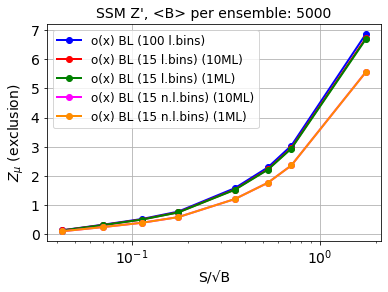

In [8]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



    
    
plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_XG, '-ok', color='blue', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='red', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title("SSM Z', <B> per ensemble: %0.2d" % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 3. MACHINE-LEARNED LIKELIHOOD with KDE

##### For 10 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [           -inf            -inf            -inf            -inf
  1.49471161e+04  1.49341406e+04  1.48792269e+04  1.47289786e+04
  1.43998820e+04  1.38237233e+04  1.29815036e+04  1.18888943e+04
  1.05288790e+04  8.87425883e+03  6.95950080e+03  4.82986835e+03
  2.51012340e+03  9.33632976e+00 -2.53732908e+03 -4.95402152e+03]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf           -inf
           -inf           -inf 14769.04676362 14661.56478681
 14507.15503208 14278.56441416 13894.27595706 13187.10044919
 11992.14640749 10274.94170867  8144.92757753  5716.16219097
  3083.94670984   291.04518436 -2501.20064064 -4918.61927319]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.0091866653175426, kernel='epanechnikov')


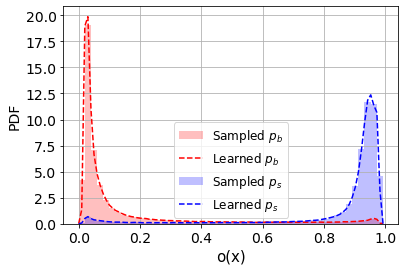


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



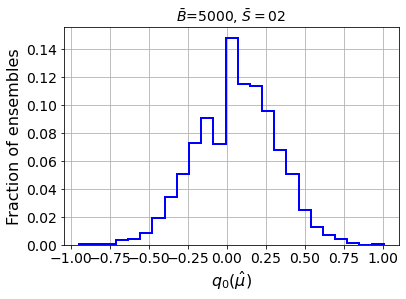

muhat mean:  0.05013658331582266
median q_muhat:  0.06594564818425308
Z_KDE:  0.2567988477081879
Z_KDE mu=0:  0.2567988477081879

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



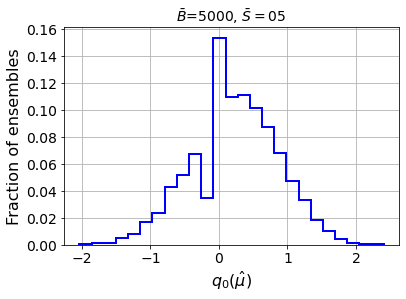

muhat mean:  0.11692243010300611
median q_muhat:  0.24896197768648776
Z_KDE:  0.4989608979534246
Z_KDE mu=0:  0.4989608979534246

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 


 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



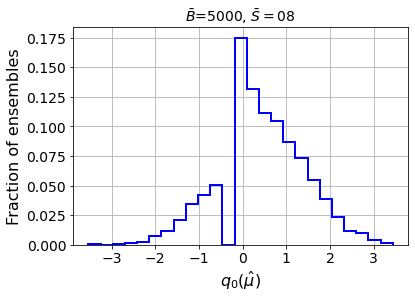

muhat mean:  0.18402354425057812
median q_muhat:  0.4279350809080089
Z_KDE:  0.6541674716064755
Z_KDE mu=0:  0.6541674716064755

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 


 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



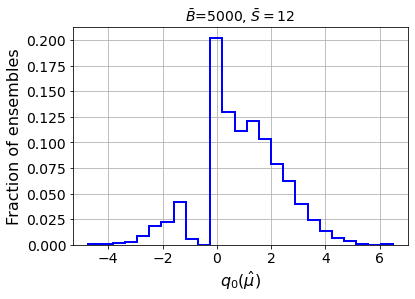

muhat mean:  0.2119402985074627
median q_muhat:  0.9093611826005947
Z_KDE:  0.9536043113370423
Z_KDE mu=0:  0.9536043113370423

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 


 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



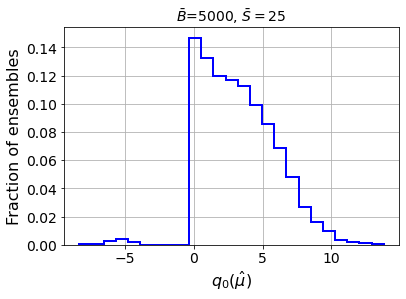

muhat mean:  0.20622764569745425
median q_muhat:  3.0021403063862024
Z_KDE:  1.732668550642679
Z_KDE mu=0:  1.732668550642679

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 


 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



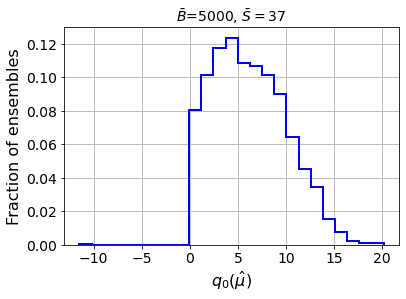

muhat mean:  0.1569985266259735
median q_muhat:  5.88199577806283
Z_KDE:  2.4252826181834624
Z_KDE mu=0:  2.4252826181834624

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 


 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



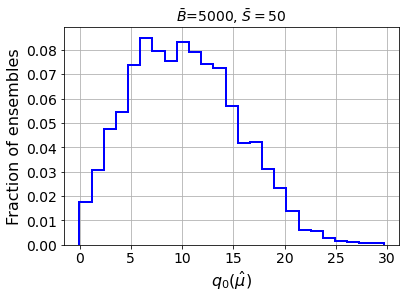

muhat mean:  0.12538914598233067
median q_muhat:  10.037694497184788
Z_KDE:  3.1682320775449497
Z_KDE mu=0:  3.1682320775449497

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 


 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



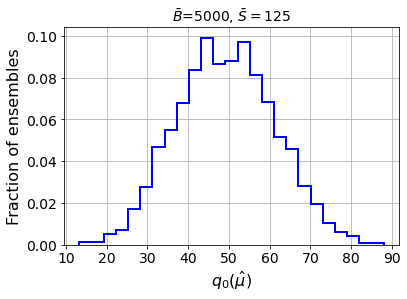

muhat mean:  0.06302698145025296
median q_muhat:  49.21809021438909
Z_KDE:  7.015560577344415
Z_KDE mu=0:  7.015826461763042

 ----------------------------------------- 



In [25]:
store_Z_MLL_KDE = []
store_Z_MLL_KDE_mu0 = []

store_muhat_mean_MLL = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM[:50000]])
print(grid.best_estimator_)

SM_bandwidth = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP[:50000]])
print(grid.best_estimator_)

NP_bandwidth = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth).fit(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ])
kde_sig = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth).fit(np.c_[pred_XG_NP, np.ones(len(pred_XG_NP)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val = np.min([np.min(pred_XG_SM),np.min(pred_XG_NP)])
max_val = np.max([np.max(pred_XG_SM),np.max(pred_XG_NP)])

s_vals = np.linspace(min_val,max_val,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg = np.exp(kde_bkg.score_samples(np.c_[s_vals, np.zeros(len(s_vals)) ]) )
dens_sig = np.exp(kde_sig.score_samples(np.c_[s_vals, np.ones(len(s_vals)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM = sum(dens_bkg*(s_vals[1]-s_vals[0]))
factor_aux_NP = sum(dens_sig*(s_vals[1]-s_vals[0]))

# normalizo
dens_bkg = dens_bkg / factor_aux_SM
dens_sig = dens_sig / factor_aux_NP






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM,density=True,bins=50,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals,dens_bkg,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP,density=True,bins=50,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals,dens_sig,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM = np.exp(kde_bkg.score_samples(np.c_[pred_XG_SM, np.zeros(len(pred_XG_SM)) ]) )
KDE_NP_pred_SM = np.exp(kde_sig.score_samples(np.c_[pred_XG_SM, np.ones(len(pred_XG_SM)) ]) )

# Normalize

KDE_SM_pred_SM = KDE_SM_pred_SM / factor_aux_SM
KDE_NP_pred_SM = KDE_NP_pred_SM / factor_aux_NP




indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')

    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]
    for jk in range(len(q_muhat_mu0)):
        if q_muhat_mu0[jk] < 0:
            q_muhat_mu0[jk] = 0

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]
    for jk in range(len(q_muhat)):
        if q_muhat[jk] < 0:
            q_muhat[jk] = 0

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [26]:
print(store_Z_MLL_KDE)
print(store_Z_MLL_KDE_mu0)

print(store_muhat_mean_MLL)

[0.2567988477081879, 0.4989608979534246, 0.6541674716064755, 0.9536043113370423, 1.732668550642679, 2.4252826181834624, 3.1682320775449497, 7.015560577344415]
[0.2567988477081879, 0.4989608979534246, 0.6541674716064755, 0.9536043113370423, 1.732668550642679, 2.4252826181834624, 3.1682320775449497, 7.015826461763042]
[0.05013658331582266, 0.11692243010300611, 0.18402354425057812, 0.2119402985074627, 0.20622764569745425, 0.1569985266259735, 0.12538914598233067, 0.06302698145025296]


In [27]:
store_Z_MLL_KDE = [0.2567988477081879, 0.4989608979534246, 0.6541674716064755, 0.9536043113370423, 1.732668550642679, 2.4252826181834624, 3.1682320775449497, 7.015560577344415]
store_Z_MLL_KDE_mu0 = [0.2567988477081879, 0.4989608979534246, 0.6541674716064755, 0.9536043113370423, 1.732668550642679, 2.4252826181834624, 3.1682320775449497, 7.015826461763042]

store_muhat_mean_MLL = [0.05013658331582266, 0.11692243010300611, 0.18402354425057812, 0.2119402985074627, 0.20622764569745425, 0.1569985266259735, 0.12538914598233067, 0.06302698145025296]

##### For 1 ML

[1.00000000e-03 1.44719254e-03 2.09436625e-03 3.03095122e-03
 4.38637001e-03 6.34792196e-03 9.18666532e-03 1.32948735e-02
 1.92402418e-02 2.78443345e-02 4.02961132e-02 5.83162345e-02
 8.43948197e-02 1.22135554e-01 1.76753662e-01 2.55796582e-01
 3.70186906e-01 5.35731729e-01 7.75306963e-01 1.12201845e+00]
KernelDensity(bandwidth=0.004386370005779536, kernel='epanechnikov')


/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          -inf           -inf           -inf 14781.74862457
 14774.48841663 14744.33586475 14681.28059968 14578.75348284
 14425.70862493 14187.74683288 13789.89332833 13085.63803715
 11913.56459206 10222.1095263   8110.00126168  5693.00978313
  3063.62907267   273.23060985 -2518.52370437 -4928.31515503]
  warnings.warn(
/home/andres/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:929: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


KernelDensity(bandwidth=0.003030951223220623, kernel='epanechnikov')


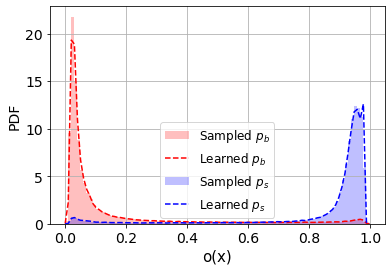


-------------------------------------
 MLL with KDE
-------------------------------------
B_expected:  5000
S_expected:  2
S/$\sqrt{B}$:  0.0282842712474619
n_ensembles (initial):  5000 

Z_KDE_bins :  0.1314099981078077

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4759

 This may take long... 



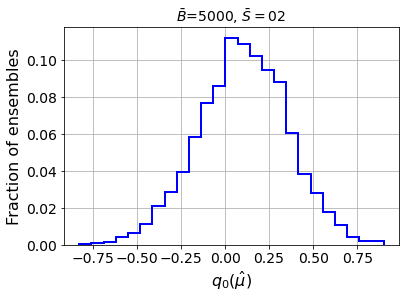

muhat mean:  0.051733557470056736
median q_muhat:  0.1054673340441119
Z_KDE:  0.32475734640514586
Z_KDE mu=0:  0.32475734640514586

 ----------------------------------------- 

B_expected:  5000
S_expected:  5
S/$\sqrt{B}$:  0.07071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  0.3267493477280686

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



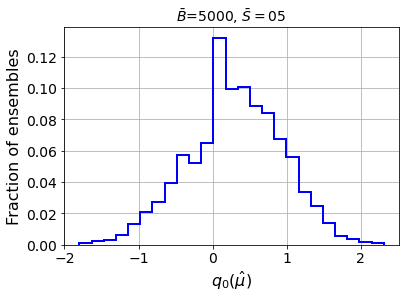

muhat mean:  0.10788311961320161
median q_muhat:  0.30994973712477325
Z_KDE:  0.5567312970587995
Z_KDE mu=0:  0.5567312970587995

 ----------------------------------------- 

B_expected:  5000
S_expected:  8
S/$\sqrt{B}$:  0.1131370849898476
n_ensembles (initial):  5000 

Z_KDE_bins :  0.5200137903782349

 If  1001  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



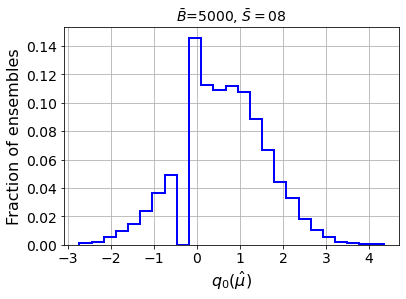

muhat mean:  0.14774017237754886
median q_muhat:  0.6408271493346671
Z_KDE:  0.8005168014068581
Z_KDE mu=0:  0.8005168014068581

 ----------------------------------------- 

B_expected:  5000
S_expected:  12
S/$\sqrt{B}$:  0.1697056274847714
n_ensembles (initial):  5000 

Z_KDE_bins :  0.7745756268368258

 If  1003  =  346    then the proposed range has to be extended
n_ensembles (actual):  4757

 This may take long... 



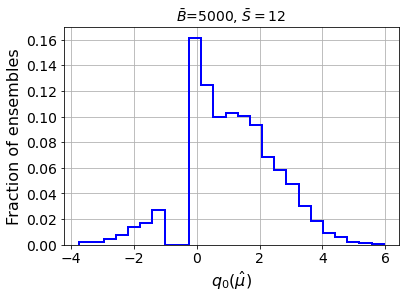

muhat mean:  0.19209585873449653
median q_muhat:  1.0662826226978268
Z_KDE:  1.0326096177635704
Z_KDE mu=0:  1.0326096177635704

 ----------------------------------------- 

B_expected:  5000
S_expected:  25
S/$\sqrt{B}$:  0.35355339059327373
n_ensembles (initial):  5000 

Z_KDE_bins :  1.5787397996126697

 If  1005  =  346    then the proposed range has to be extended
n_ensembles (actual):  4753

 This may take long... 



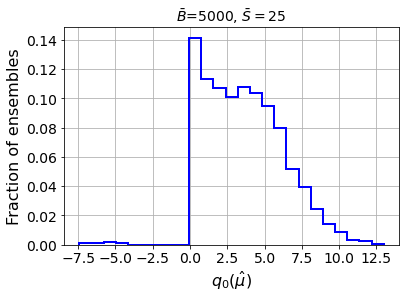

muhat mean:  0.16749421418051758
median q_muhat:  3.4445080445386083
Z_KDE:  1.855938588568762
Z_KDE mu=0:  1.855938588568762

 ----------------------------------------- 

B_expected:  5000
S_expected:  37
S/$\sqrt{B}$:  0.5232590180780452
n_ensembles (initial):  5000 

Z_KDE_bins :  2.2922207940994506

 If  1007  =  346    then the proposed range has to be extended
n_ensembles (actual):  4751

 This may take long... 



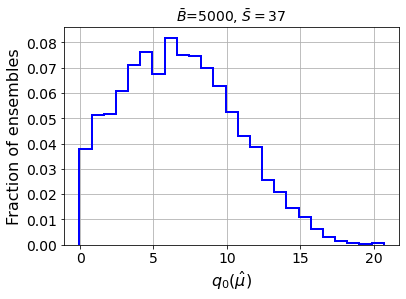

muhat mean:  0.12212165859818987
median q_muhat:  6.6013600692733405
Z_KDE:  2.5693112052208353
Z_KDE mu=0:  2.5693112052208353

 ----------------------------------------- 

B_expected:  5000
S_expected:  50
S/$\sqrt{B}$:  0.7071067811865475
n_ensembles (initial):  5000 

Z_KDE_bins :  3.0371353526874127

 If  1010  =  347    then the proposed range has to be extended
n_ensembles (actual):  4754

 This may take long... 



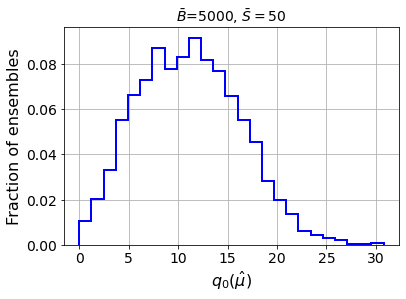

muhat mean:  0.09444678165755153
median q_muhat:  10.999711239498637
Z_KDE:  3.3165812577861917
Z_KDE mu=0:  3.3165812577861917

 ----------------------------------------- 

B_expected:  5000
S_expected:  125
S/$\sqrt{B}$:  1.7677669529663687
n_ensembles (initial):  5000 

Z_KDE_bins :  6.887309411192304

 If  1025  =  349    then the proposed range has to be extended
n_ensembles (actual):  4744

 This may take long... 



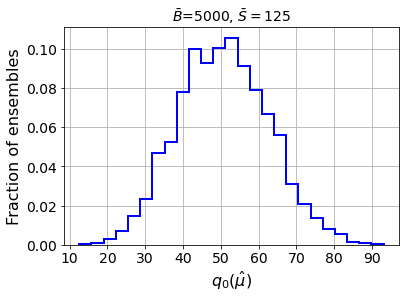

muhat mean:  0.052655986509274874
median q_muhat:  50.56325386277936
Z_KDE:  7.110784335274088
Z_KDE mu=0:  7.110784335274088

 ----------------------------------------- 



In [27]:
store_Z_KDE_bins = []

store_Z_MLL_KDE_1ML = []
store_Z_MLL_KDE_mu0_1ML = []

store_muhat_mean_MLL_1ML = []




# FIND THE BANDWIDTH

bandwidth = np.logspace(-3.0, 0.05, 20)
print(bandwidth)

kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_SM_1ML[:50000]])
print(grid.best_estimator_)

SM_bandwidth_1ML = grid.best_estimator_.bandwidth



kde = KernelDensity(kernel='epanechnikov')
grid = GridSearchCV(kde, {'bandwidth': bandwidth})
grid.fit(np.c_[pred_XG_NP_1ML[:50000]])
print(grid.best_estimator_)

NP_bandwidth_1ML = grid.best_estimator_.bandwidth







# aca fitteo 
kde_bkg_1ML = KernelDensity(kernel="epanechnikov", bandwidth=SM_bandwidth_1ML).fit(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ])
kde_sig_1ML = KernelDensity(kernel="epanechnikov", bandwidth=NP_bandwidth_1ML).fit(np.c_[pred_XG_NP_1ML, np.ones(len(pred_XG_NP_1ML)) ])


# elijo los valores para graficar y calcular la significancia de Asimov
min_val_1ML = np.min([np.min(pred_XG_SM_1ML),np.min(pred_XG_NP_1ML)])
max_val_1ML = np.max([np.max(pred_XG_SM_1ML),np.max(pred_XG_NP_1ML)])

s_vals_1ML = np.linspace(min_val_1ML,max_val_1ML,100)





# evaluo las densidades en cada valor de s. esto es mas o menos equivalente a tomar bines continuos
dens_bkg_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[s_vals_1ML, np.zeros(len(s_vals_1ML)) ]) )
dens_sig_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[s_vals_1ML, np.ones(len(s_vals_1ML)) ]) )





# PERO NO ESTA NORMALIZADO A 1 el area
# Area
factor_aux_SM_1ML = sum(dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))
factor_aux_NP_1ML = sum(dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0]))

# normalizo
dens_bkg_1ML = dens_bkg_1ML / factor_aux_SM_1ML
dens_sig_1ML = dens_sig_1ML / factor_aux_NP_1ML






# grafico y verifico si la densidad es una buena aproximacion

plt.figure()

plt.hist(pred_XG_SM_1ML,density=True,bins=100,color='red',alpha=0.25,label='Sampled $p_{b}$');
plt.plot(s_vals_1ML,dens_bkg_1ML,color='red',label='Learned $p_{b}$',linestyle='dashed');

plt.hist(pred_XG_NP_1ML,density=True,bins=100,color='blue',alpha=0.25,label='Sampled $p_{s}$');
plt.plot(s_vals_1ML,dens_sig_1ML,color='blue',label='Learned $p_{s}$',linestyle='dashed');

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("o(x)",fontsize=15)
plt.ylabel("PDF",fontsize=14)
plt.grid()
plt.legend(fontsize=12)
#plt.title(r"Signal: W'$\rightarrow$XY, Background: QCD", fontsize=14)
#plt.savefig('images/' + 'Wprime-output.pdf', format="pdf", bbox_inches="tight")
plt.show()



  
    
    

# all the dataset though the SM and NP KDEs
# with this we'll form the toy samples for MLL

KDE_SM_pred_SM_1ML = np.exp(kde_bkg_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.zeros(len(pred_XG_SM_1ML)) ]) )
KDE_NP_pred_SM_1ML = np.exp(kde_sig_1ML.score_samples(np.c_[pred_XG_SM_1ML, np.ones(len(pred_XG_SM_1ML)) ]) )

# Normalize

KDE_SM_pred_SM_1ML = KDE_SM_pred_SM_1ML / factor_aux_SM_1ML
KDE_NP_pred_SM_1ML = KDE_NP_pred_SM_1ML / factor_aux_NP_1ML





indices = [i for i in range(len(KDE_NP_pred_SM))]


########################
# METHOD: MLL with KDE #
########################

print('\n-------------------------------------')
print(' MLL with KDE')
print('-------------------------------------')




for iii in range(len(SB_ratio)):
    
    print('B_expected: ', B_expected)
    print('S_expected: ', S_expected[iii])
    print(r'S/$\sqrt{B}$: ', SsqrtB[iii])
    print('n_ensembles (initial): ', n_ensembles, '\n')
    
    
    ####################
    # 1st a binned KDE #
    ####################
    
    # Bd: binned KDE background
    Bd = B_expected*dens_bkg_1ML*(s_vals_1ML[1]-s_vals_1ML[0])




    # If a bins has no expected background events replace that zero for the minimum B_bin=/=0

    # find the minimum
    Bd_noceros = []
    for i in range(len(Bd)):
        if Bd[i]!=0:
            Bd_noceros.append(Bd[i])

    min_back = min(Bd_noceros)

    # replace the zeros
    for i in range(len(Bd)):
        if Bd[i]==0:
            Bd[i] = min_back


    # Sd: binned KDE signal
    Sd = SsqrtB[iii]*np.sqrt(B_expected)*dens_sig_1ML*(s_vals_1ML[1]-s_vals_1ML[0])

    #Z_KDE_bins = np.sqrt(2.0*np.sum(((Sd+Bd)*np.log(1.0+Sd/Bd)-Sd))) # Discovery
    Z_KDE_bins = np.sqrt(2.0*np.sum(Bd*np.log(Bd/(Sd+Bd))+Sd)) # Exclusion

    store_Z_KDE_bins.append(Z_KDE_bins)

    print('Z_KDE_bins : ', Z_KDE_bins)
    
    

    ###########
    # NOW MLL #
    ###########

    # to construct ensembles B and S events are taken from Poisson distributions
    mu = S_expected[iii] + B_expected


    # Letś find the number of events per ensemble such that we get at least one ensemble populated if events are taken from a Poisson distribution

    # around the mean its populated so let's try (proposed range to be checked)
    list_events_per_ensembles = [i for i in range(int(mu*0.9),int(mu*1.1))]
    to_check = len(list_events_per_ensembles)

    # I want at least one ensemble populated
    list_nums_ensembles = [ int( poisson.pmf(list_events_per_ensembles[i],mu)*n_ensembles ) for i in range(len(list_events_per_ensembles)) ]



    # Remove from the list the elements without at least 1 ensemble possible
    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] > 1:
            list_events_per_ensembles = list_events_per_ensembles[i:]
            list_nums_ensembles = list_nums_ensembles[i:]
            break


    for i in range(len(list_events_per_ensembles)):
        if list_nums_ensembles[i] < 1:
            list_events_per_ensembles = list_events_per_ensembles[:i]
            list_nums_ensembles = list_nums_ensembles[:i]
            break

    print('\n If ', to_check, ' = ', len(list_events_per_ensembles), '   then the proposed range has to be extended')

    print('n_ensembles (actual): ', sum(list_nums_ensembles))



    # lists of S and B events per ensemble, w.r.t the total of number of events per ensemble found above:

    p_berno = S_expected[iii]/(S_expected[iii]+B_expected)

    list_S_per_ensembles = []
    list_B_per_ensembles = []

    for jj in range(len(list_events_per_ensembles)):
        list_S_per_ensembles.append( int(p_berno * list_events_per_ensembles[jj]) )
        list_B_per_ensembles.append( list_events_per_ensembles[jj] - int(p_berno * list_events_per_ensembles[jj]) )

    ######
    # NOW I HAVE 4 LISTS:
    # list_events_per_ensembles     list with the number of events per ensemble (its a range)
    # list_nums_ensembles           list with the number of ensembles, w.r.t the 1st list
    # list_S_per_ensembles          list with the number of signal events in each ensembles, w.r.t the 1st list
    # list_B_per_ensembles          list with the number of background events in each ensembles, w.r.t the 1st list
    ######



    print('\n This may take long... \n')


    # NOW LETS APPLY THE METHOD

    muhat_selected_list = []
    q_muhat = []
    q_muhat_mu0 = []

    for bb in range(len(list_nums_ensembles)):

        for kk in range(list_nums_ensembles[bb]):

            # KDE
            ran_ind = np.random.choice(indices, list_B_per_ensembles[bb])

            KDE_SM_pred_SM_shuf = []
            KDE_NP_pred_SM_shuf = []

            for i in ran_ind:
                KDE_SM_pred_SM_shuf.append(KDE_SM_pred_SM_1ML[i])
                KDE_NP_pred_SM_shuf.append(KDE_NP_pred_SM_1ML[i])

            KDE_SM_pred_SM_shuf  = np.array(KDE_SM_pred_SM_shuf)
            KDE_NP_pred_SM_shuf  = np.array(KDE_NP_pred_SM_shuf)



            # p_b(o(x_ensemble)) =    concatenate: p_b(o(B_ensemble)) and p_b(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_B = np.ndarray.tolist( KDE_SM_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_SM_pred_NP_shuf )

            # p_s(o(x_ensemble)) =    concatenate: p_s(o(B_ensemble)) and p_s(o(S_ensemble))  NOTICE THE o(x)
            prob_x_given_S = np.ndarray.tolist( KDE_NP_pred_SM_shuf ) #+ np.ndarray.tolist( KDE_NP_pred_NP_shuf )









            # NOW WE HAVE p_{s,b}(x_ensemble) for this particular ensemble
            # WE NEED TO ESTIMATE mu_hat for this particular ensemble
            # we are going to obtain a mu_hat with a grid of values for this particular ensemble



            mu_hat_condition_equal_1 = []

            # grid, mu_hat is around 1
            muhat_test = np.arange(0., 1.5, 0.1).tolist()

            B_prob_x_given_B = [x * B_expected for x in prob_x_given_B]

            for vv in range(len(muhat_test)):

                mu_hat_condition_equal_1.append( sum ( [(x*1.) / ( (x * muhat_test[vv] * S_expected[iii]) + y ) for x, y in zip(prob_x_given_S, B_prob_x_given_B)] ) )



            muhat_selected = 0

            # from the grid, select the mu_hat such that the condition is equal to 1
            if mu_hat_condition_equal_1[0] < mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 > 0:
                        muhat_selected = muhat_test[ll]
                        break


            if mu_hat_condition_equal_1[0] > mu_hat_condition_equal_1[-1]:
                for ll in range(len(mu_hat_condition_equal_1)):
                    if mu_hat_condition_equal_1[ll] -1 < 0:
                        muhat_selected = muhat_test[ll]
                        break


            muhat_selected_list.append(muhat_selected)



            # NOW THAT WE HAVE mu_hat FOR THIS ENSEMBLE, CALCULATE THE TEST STATISTIC FOR THIS ENSEMBLE
            # and append it (we need the median over lots of ensembles)
            #q_muhat.append( 2 * ( (-1.*muhat_selected * S_expected[iii]) + sum( [np.log( 1 + ( (muhat_selected*S_expected[iii]/B_expected) * (x / y) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] ) ) )
            # EXCLUSION:
            q_muhat.append( 2 * ( ( (1.-muhat_selected) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (muhat_selected*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )
            q_muhat_mu0.append( 2 * ( ( (1.-0.) * S_expected[iii] ) - sum( [np.log( ( (B_expected*y) + (S_expected[iii]*x) ) / ( (B_expected*y) + (0.*S_expected[iii]*x) ) ) for x, y in zip(prob_x_given_S, prob_x_given_B)] )
    ) )


    # Histogram of q_muhats

    weights = np.ones_like(q_muhat)/float(len(q_muhat))
    nMIX, binsMIX, patchesMIX = plt.hist(q_muhat, 25, weights=weights, histtype='step', color='blue', linewidth=2)
    #plt.xlim(0,1)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel("$q_0(\hat{\mu})$",fontsize=16)
    plt.ylabel("Fraction of ensembles",fontsize=16)
    plt.title(r"$\bar{B}$=%0.2i, $\bar{S}=$%0.2i" % (B_expected,S_expected[iii]),fontsize=14)
    plt.grid()
    #plt.legend(fontsize=14)
    plt.show()


    # Finally calculate muhat_mean and Z_gaussian

    # Remove nan if any
    q_muhat_mu0 = [x for x in q_muhat_mu0 if x == x]

    q_muhat_median_mu0 = np.median(q_muhat_mu0)

    Z_KDE_mu0 = abs(q_muhat_median_mu0)**0.5
    store_Z_MLL_KDE_mu0_1ML.append(Z_KDE_mu0)


    # Finally calculate muhat_mean and Z_gaussian
    muhat_mean = np.mean(muhat_selected_list)
    store_muhat_mean_MLL_1ML.append(muhat_mean)

    # Remove nan if any
    q_muhat = [x for x in q_muhat if x == x]

    q_muhat_median = np.median(q_muhat)

    Z_KDE = abs(q_muhat_median)**0.5
    store_Z_MLL_KDE_1ML.append(Z_KDE)

    print('muhat mean: ', muhat_mean)
    print('median q_muhat: ', q_muhat_median)
    print('Z_KDE: ', Z_KDE)
    print('Z_KDE mu=0: ', Z_KDE_mu0)
    
    print('\n ----------------------------------------- \n')

In [28]:
print(store_Z_KDE_bins)

print(store_Z_MLL_KDE_1ML)
print(store_Z_MLL_KDE_mu0_1ML)

print(store_muhat_mean_MLL_1ML)

[0.1314099981078077, 0.3267493477280686, 0.5200137903782349, 0.7745756268368258, 1.5787397996126697, 2.2922207940994506, 3.0371353526874127, 6.887309411192304]
[0.32475734640514586, 0.5567312970587995, 0.8005168014068581, 1.0326096177635704, 1.855938588568762, 2.5693112052208353, 3.3165812577861917, 7.110784335274088]
[0.32475734640514586, 0.5567312970587995, 0.8005168014068581, 1.0326096177635704, 1.855938588568762, 2.5693112052208353, 3.3165812577861917, 7.110784335274088]
[0.051733557470056736, 0.10788311961320161, 0.14774017237754886, 0.19209585873449653, 0.16749421418051758, 0.12212165859818987, 0.09444678165755153, 0.052655986509274874]


In [28]:
store_Z_KDE_bins = [0.1314099981078077, 0.3267493477280686, 0.5200137903782349, 0.7745756268368258, 1.5787397996126697, 2.2922207940994506, 3.0371353526874127, 6.887309411192304]

store_Z_MLL_KDE_1ML = [0.32475734640514586, 0.5567312970587995, 0.8005168014068581, 1.0326096177635704, 1.855938588568762, 2.5693112052208353, 3.3165812577861917, 7.110784335274088]
store_Z_MLL_KDE_mu0_1ML = [0.32475734640514586, 0.5567312970587995, 0.8005168014068581, 1.0326096177635704, 1.855938588568762, 2.5693112052208353, 3.3165812577861917, 7.110784335274088]

store_muhat_mean_MLL_1ML = [0.051733557470056736, 0.10788311961320161, 0.14774017237754886, 0.19209585873449653, 0.16749421418051758, 0.12212165859818987, 0.09444678165755153, 0.052655986509274874]

<ipython-input-11-8bc2cdbd1b25>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
<ipython-input-11-8bc2cdbd1b25>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')


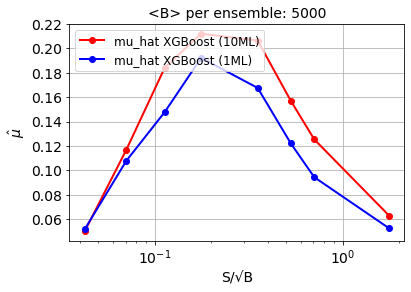

<ipython-input-11-8bc2cdbd1b25>:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:40: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-11-8bc2cdbd1b25>:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-11-8bc2cdbd1b25>:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

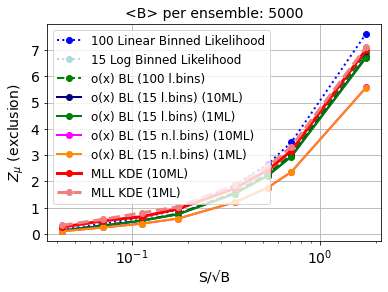

In [11]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )




plt.figure()
lw = 2

plt.plot(posX, store_muhat_mean_MLL, '-ok', color='red', lw=lw, label='mu_hat XGBoost (10ML)')
plt.plot(posX, store_muhat_mean_MLL_1ML, '-ok', color='blue', lw=lw, label='mu_hat XGBoost (1ML)')

#plt.xlim([0.5, 100])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel(r'$\hat{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()






plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### 4.Working points, counting over 1 bin

In [29]:
WP = [0.25, 0.5, 0.75]

S_expected = [int(SB_ratio[i]*B_expected) for i in range(len(SB_ratio))]

print(S_expected)

[2, 5, 8, 12, 25, 37, 50, 125]


In [31]:
# XGBoost #

SrootB_WP0_XG = []
SrootB_WP1_XG = []
SrootB_WP2_XG = []


# number of background ensembles
B_ensembles = int(len(pred_XG_SM)/B_expected)

# shorten the number of B events so I get an integer number of ensembles
pred_XG_SM_entero = pred_XG_SM[:int(len(pred_XG_SM)/B_expected) * B_expected]

XG_SM_passWP0 = 0
XG_SM_passWP1 = 0
XG_SM_passWP2 = 0

for i in range(len(pred_XG_SM_entero)):
    if pred_XG_SM_entero[i] > WP[0]:
        XG_SM_passWP0 += 1
    if pred_XG_SM_entero[i] > WP[1]:
        XG_SM_passWP1 += 1
    if pred_XG_SM_entero[i] > WP[2]:
        XG_SM_passWP2 += 1



# SIGNAL

for j in range(len(S_expected)):
    
    # number of signal ensembles
    S_ensembles = int(len(pred_XG_NP)/S_expected[j])

    # shorten the number of S events so I get an integer number of ensembles
    pred_XG_NP_entero = pred_XG_NP[:int(len(pred_XG_NP)/S_expected[j]) * S_expected[j]]

    XG_NP_passWP0 = 0
    XG_NP_passWP1 = 0
    XG_NP_passWP2 = 0

    for i in range(len(pred_XG_NP_entero)):
        if pred_XG_NP_entero[i] > WP[0]:
            XG_NP_passWP0 += 1
        if pred_XG_NP_entero[i] > WP[1]:
            XG_NP_passWP1 += 1
        if pred_XG_NP_entero[i] > WP[2]:
            XG_NP_passWP2 += 1

            
    # save the results Z_binned after WP
    SrootB_WP0_XG.append( ( XG_NP_passWP0 / S_ensembles ) / ( XG_SM_passWP0 / B_ensembles )**0.5 )
    SrootB_WP1_XG.append( ( XG_NP_passWP1 / S_ensembles ) / ( XG_SM_passWP1 / B_ensembles )**0.5 )
    SrootB_WP2_XG.append( ( XG_NP_passWP2 / S_ensembles ) / ( XG_SM_passWP2 / B_ensembles )**0.5 )
    
    print('S_expected = ', S_expected[j])
    print('WP: 0     S/B**0.5= ', S_expected[j]/(B_expected)**0.5)
    print('WP: ', WP[0], '    S/B**0.5= ', SrootB_WP0_XG[j] )
    print('WP: ', WP[1], '    S/B**0.5= ', SrootB_WP1_XG[j] )
    print('WP: ', WP[2], '    S/B**0.5= ', SrootB_WP2_XG[j] )
    print('------------------------')
    print('')
    
print('SrootB_WP0_XG: ', SrootB_WP0_XG)
print('SrootB_WP1_XG: ', SrootB_WP1_XG)
print('SrootB_WP2_XG: ', SrootB_WP2_XG)

S_expected =  2
WP: 0     S/B**0.5=  0.0282842712474619
WP:  0.25     S/B**0.5=  0.06839812663711162
WP:  0.5     S/B**0.5=  0.08604823330199926
WP:  0.75     S/B**0.5=  0.10740546307960629
------------------------

S_expected =  5
WP: 0     S/B**0.5=  0.07071067811865475
WP:  0.25     S/B**0.5=  0.17099527778170143
WP:  0.5     S/B**0.5=  0.21512144265448782
WP:  0.75     S/B**0.5=  0.26851473040204066
------------------------

S_expected =  8
WP: 0     S/B**0.5=  0.1131370849898476
WP:  0.25     S/B**0.5=  0.2735922581545728
WP:  0.5     S/B**0.5=  0.3441954408952135
WP:  0.75     S/B**0.5=  0.4296248040504153
------------------------

S_expected =  12
WP: 0     S/B**0.5=  0.1697056274847714
WP:  0.25     S/B**0.5=  0.4103880146291404
WP:  0.5     S/B**0.5=  0.5162946785564217
WP:  0.75     S/B**0.5=  0.644441633815117
------------------------

S_expected =  25
WP: 0     S/B**0.5=  0.35355339059327373
WP:  0.25     S/B**0.5=  0.8549806976403771
WP:  0.5     S/B**0.5=  1.0756202356856

In [30]:
# To use if you dont want to run everything again. Its the previous results
SrootB_WP0_XG = [0.06839812663711162, 0.17099527778170143, 0.2735922581545728, 0.4103880146291404, 0.8549806976403771, 1.2653621834386322, 1.7099613952807542, 4.274927177777116]
SrootB_WP1_XG = [0.08604823330199926, 0.21512144265448782, 0.3441954408952135, 0.5162946785564217, 1.0756202356856308, 1.5919069105464105, 2.1512404713712616, 5.378123400227539]
SrootB_WP2_XG = [0.10740546307960629, 0.26851473040204066, 0.4296248040504153, 0.644441633815117, 1.3425990715431209, 1.987034085079912, 2.6851981430862417, 6.71302154811961]

<ipython-input-14-1231ce6ddeb8>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ":ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood')
<ipython-input-14-1231ce6ddeb8>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)')
<ipython-input-14-1231ce6ddeb8>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fm

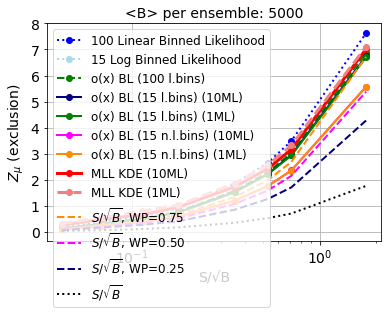

In [14]:
#########
# PLOTS #
#########

posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )



plt.figure()
lw = 2

plt.plot(posX, store_Z_bins, ':ok', color='blue', lw=lw, label='100 Linear Binned Likelihood') 
plt.plot(posX, store_Z_bins_logbins, ':ok', color='lightblue', lw=lw, label='15 Log Binned Likelihood') 
plt.plot(posX, store_Z_bins_XG, '--ok', color='green', lw=lw, label='o(x) BL (100 l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-ok', color='navy', lw=lw, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_1ML, '-ok', color='green', lw=lw, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq, '-ok', color='magenta', lw=lw, label='o(x) BL (15 n.l.bins) (10ML)') 
plt.plot(posX, store_Z_bins_XG_15bins_eq_1ML, '-ok', color='darkorange', lw=lw, label='o(x) BL (15 n.l.bins) (1ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-ok', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
#plt.plot(posX, store_Z_MLL_KDE_mu0, '-ok', color='pink', lw=3, label=r'MLL KDE (XGBoost) muhat=0')
#plt.plot(posX, store_Z_KDE_bins, '-ok', color='magenta', lw=3, label=r'100 Bins KDE')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=14)
plt.ylabel('$Z_{\mu}$ (exclusion)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

<ipython-input-15-415cc2f1cb5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')


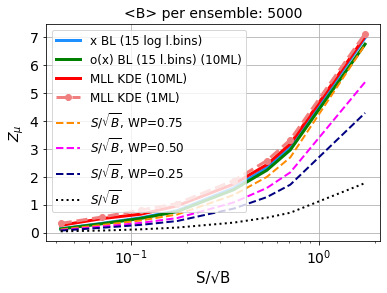

In [15]:
posX = []

for i in range(len(SB_ratio)):
    posX.append( (B_expected*SB_ratio[i]) / ( B_expected )**0.5 )


plt.figure()
lw = 2

plt.plot(posX, store_Z_bins_logbins, '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(posX, store_Z_bins_XG_15bins, '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(posX, store_Z_MLL_KDE, '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(posX, store_Z_MLL_KDE_1ML, '--ok', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(posX, SrootB_WP2_XG, '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(posX, SrootB_WP1_XG, '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(posX, SrootB_WP0_XG, '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.xlim([0.5, 10])
#plt.ylim([-0.5, 7.5])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

### Interpolate

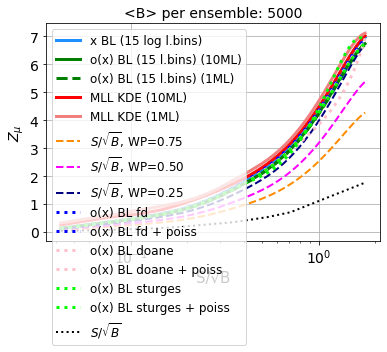

In [34]:
    
# Interpolation, cubic
fcubic_bins_logbins = interp1d(posX, store_Z_bins_logbins, kind='cubic')
fcubic_bins_XG_15bins = interp1d(posX, store_Z_bins_XG_15bins, kind='cubic')
fcubic_bins_XG_15bins_1ML = interp1d(posX, store_Z_bins_XG_15bins_1ML, kind='cubic')
fcubic_XG_MLL = interp1d(posX, store_Z_MLL_KDE, kind='cubic')
fcubic_XG_MLL_1ML = interp1d(posX, store_Z_MLL_KDE_1ML, kind='cubic')
fcubic_WP0_XG = interp1d(posX, SrootB_WP0_XG, kind='cubic')
fcubic_WP1_XG = interp1d(posX, SrootB_WP1_XG, kind='cubic')
fcubic_WP2_XG = interp1d(posX, SrootB_WP2_XG, kind='cubic')


fcubic_bins_XG_CV0 = interp1d(posX, Z_bins_XG_CV0, kind='cubic')
fcubic_bins_XG_CV0_chi2 = interp1d(posX, Z_bins_XG_CV0_chi2, kind='cubic')
fcubic_bins_XG_CV0_chi2_N = interp1d(posX, Z_bins_XG_CV0_chi2_N, kind='cubic')
fcubic_bins_XG_CV0_MSE = interp1d(posX, Z_bins_XG_CV0_MSE, kind='cubic')
fcubic_bins_XG_CV0_poiss = interp1d(posX, Z_bins_XG_CV0_poiss, kind='cubic')

fcubic_bins_XG_CV0_zeros = interp1d(posX, Z_bins_XG_CV0_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV0_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV0_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV0_MSE_zeros = interp1d(posX, Z_bins_XG_CV0_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV0_poiss_zeros = interp1d(posX, Z_bins_XG_CV0_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV1 = interp1d(posX, Z_bins_XG_CV1, kind='cubic')
fcubic_bins_XG_CV1_chi2 = interp1d(posX, Z_bins_XG_CV1_chi2, kind='cubic')
fcubic_bins_XG_CV1_chi2_N = interp1d(posX, Z_bins_XG_CV1_chi2_N, kind='cubic')
fcubic_bins_XG_CV1_MSE = interp1d(posX, Z_bins_XG_CV1_MSE, kind='cubic')
fcubic_bins_XG_CV1_poiss = interp1d(posX, Z_bins_XG_CV1_poiss, kind='cubic')

fcubic_bins_XG_CV1_zeros = interp1d(posX, Z_bins_XG_CV1_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV1_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV1_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV1_MSE_zeros = interp1d(posX, Z_bins_XG_CV1_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV1_poiss_zeros = interp1d(posX, Z_bins_XG_CV1_poiss_zeros, kind='cubic')


fcubic_bins_XG_CV2 = interp1d(posX, Z_bins_XG_CV2, kind='cubic')
fcubic_bins_XG_CV2_chi2 = interp1d(posX, Z_bins_XG_CV2_chi2, kind='cubic')
fcubic_bins_XG_CV2_chi2_N = interp1d(posX, Z_bins_XG_CV2_chi2_N, kind='cubic')
fcubic_bins_XG_CV2_MSE = interp1d(posX, Z_bins_XG_CV2_MSE, kind='cubic')
fcubic_bins_XG_CV2_poiss = interp1d(posX, Z_bins_XG_CV2_poiss, kind='cubic')

fcubic_bins_XG_CV2_zeros = interp1d(posX, Z_bins_XG_CV2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_zeros, kind='cubic')
fcubic_bins_XG_CV2_chi2_N_zeros = interp1d(posX, Z_bins_XG_CV2_chi2_N_zeros, kind='cubic')
fcubic_bins_XG_CV2_MSE_zeros = interp1d(posX, Z_bins_XG_CV2_MSE_zeros, kind='cubic')
fcubic_bins_XG_CV2_poiss_zeros = interp1d(posX, Z_bins_XG_CV2_poiss_zeros, kind='cubic')


# x to plot
plotX = np.linspace(min(posX), max(posX), num=50, endpoint=True)



plt.figure()
lw = 2

plt.plot(plotX, fcubic_bins_logbins(plotX), '-', color='dodgerblue', lw=3, label='x BL (15 log l.bins)') 
plt.plot(plotX, fcubic_bins_XG_15bins(plotX), '-', color='green', lw=3, label='o(x) BL (15 l.bins) (10ML)') 
plt.plot(plotX, fcubic_bins_XG_15bins_1ML(plotX), '--', color='green', lw=3, label='o(x) BL (15 l.bins) (1ML)') 
plt.plot(plotX, fcubic_XG_MLL(plotX), '-', color='red', lw=3, label=r'MLL KDE (10ML)')
plt.plot(plotX, fcubic_XG_MLL_1ML(plotX), '-', color='lightcoral', lw=3, label=r'MLL KDE (1ML)')
plt.plot(plotX, fcubic_WP0_XG(plotX), '--', color='darkorange', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[2] )
plt.plot(plotX, fcubic_WP1_XG(plotX), '--', color='magenta', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[1] )
plt.plot(plotX, fcubic_WP2_XG(plotX), '--', color='navy', lw=lw, label=r'$S/\sqrt{B}$, WP=%0.2f' % WP[0] )
plt.plot(plotX, fcubic_bins_XG_CV0_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd')
plt.plot(plotX, fcubic_bins_XG_CV0_poiss_zeros(plotX), ':', color='blue', lw=3, label=r'o(x) BL fd + poiss')
plt.plot(plotX, fcubic_bins_XG_CV1_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane')
plt.plot(plotX, fcubic_bins_XG_CV1_poiss_zeros(plotX), ':', color='pink', lw=3, label=r'o(x) BL doane + poiss')
plt.plot(plotX, fcubic_bins_XG_CV2_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges')
plt.plot(plotX, fcubic_bins_XG_CV2_poiss_zeros(plotX), ':', color='lime', lw=3, label=r'o(x) BL sturges + poiss')
plt.plot(posX, posX, ':', color='black', lw=lw, label=r'$S/\sqrt{B}$')

#plt.ylim([0., 6])
#plt.xlim([0.06, 10])
#plt.ylim([0., 3])
#plt.xlim([0.1, 0.2])
plt.xscale('log')
plt.xlabel('S/√B', fontsize=15)
plt.ylabel('$Z_{\mu}$', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.title('<B> per ensemble: %0.2d' % B_expected, fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [35]:
# AUX FUNCTION TO FIND SOLUTIONS

def dx(fn, x, delta=0.001):
    return (fn(x+delta) - fn(x))/delta

def solve(fn, value, x=0.1, maxtries=1000, maxerr=0.00001):
    for tries in range(maxtries):
        err = fn(x) - value
        if abs(err) < maxerr:
            return x
        slope = dx(fn, x)
        x -= err/slope
    raise ValueError('no solution found')

In [42]:
##############################
# DO NOT FORGET THE K-factor #
##############################

k_factor = 3
SM_cross_section_fb = 0.3044
acceptance_SM = 0.25*2
true_B_expected = 3000 * SM_cross_section_fb * k_factor * acceptance_SM

correct_factor = true_B_expected / B_expected

print('correct_factor: ', correct_factor)
print('')


# Find S/\sqrt{B} such that 95%C.L. upper limit, i.e  ----> Z = 1.64

bins_logbins_95CL = solve(fcubic_bins_logbins, 1.64)
bins_XG_15bins_95CL = solve(fcubic_bins_XG_15bins, 1.64)
XG_MLL_95CL = solve(fcubic_XG_MLL, 1.64)
bins_XG_15bins_1ML_95CL = solve(fcubic_bins_XG_15bins_1ML, 1.64)
XG_MLL_1ML_95CL = solve(fcubic_XG_MLL_1ML, 1.64)

#bins_XG_CV0_95CL = solve(fcubic_bins_XG_CV0, 1.64)
bins_XG_CV0_95CL = 1.5*solve(fcubic_bins_XG_CV0_zeros, 1.64)
# bins_XG_CV0_chi2_95CL = solve(fcubic_bins_XG_CV0_chi2, 1.64)
bins_XG_CV0_chi2_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
# bins_XG_CV0_chi2_N_95CL = solve(fcubic_bins_XG_CV0_chi2_N, 1.64)
bins_XG_CV0_chi2_N_95CL = 1.5*solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
# bins_XG_CV0_MSE_95CL = solve(fcubic_bins_XG_CV0_MSE, 1.64)
bins_XG_CV0_MSE_95CL = 1.5*solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
# bins_XG_CV0_poiss_95CL = solve(fcubic_bins_XG_CV0_poiss, 1.64)
bins_XG_CV0_poiss_95CL = 1.5*solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_95CL = solve(fcubic_bins_XG_CV1, 1.64)
bins_XG_CV1_chi2_95CL = solve(fcubic_bins_XG_CV1_chi2, 1.64)
bins_XG_CV1_chi2_N_95CL = solve(fcubic_bins_XG_CV1_chi2_N, 1.64)
bins_XG_CV1_MSE_95CL = solve(fcubic_bins_XG_CV1_MSE, 1.64)
bins_XG_CV1_poiss_95CL = solve(fcubic_bins_XG_CV1_poiss, 1.64)

bins_XG_CV2_95CL = solve(fcubic_bins_XG_CV2, 1.64)
bins_XG_CV2_chi2_95CL = solve(fcubic_bins_XG_CV2_chi2, 1.64)
bins_XG_CV2_chi2_N_95CL = solve(fcubic_bins_XG_CV2_chi2_N, 1.64)
bins_XG_CV2_MSE_95CL = solve(fcubic_bins_XG_CV2_MSE, 1.64)
bins_XG_CV2_poiss_95CL = solve(fcubic_bins_XG_CV2_poiss, 1.64)

bins_XG_CV0_zeros_95CL = solve(fcubic_bins_XG_CV0_zeros, 1.64)
bins_XG_CV0_chi2_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_zeros, 1.64)
bins_XG_CV0_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV0_chi2_N_zeros, 1.64)
bins_XG_CV0_MSE_zeros_95CL = solve(fcubic_bins_XG_CV0_MSE_zeros, 1.64)
bins_XG_CV0_poiss_zeros_95CL = solve(fcubic_bins_XG_CV0_poiss_zeros, 1.64)

bins_XG_CV1_zeros_95CL = solve(fcubic_bins_XG_CV1_zeros, 1.64)
bins_XG_CV1_chi2_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_zeros, 1.64)
bins_XG_CV1_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV1_chi2_N_zeros, 1.64)
bins_XG_CV1_MSE_zeros_95CL = solve(fcubic_bins_XG_CV1_MSE_zeros, 1.64)
bins_XG_CV1_poiss_zeros_95CL = solve(fcubic_bins_XG_CV1_poiss_zeros, 1.64)

bins_XG_CV2_zeros_95CL = solve(fcubic_bins_XG_CV2_zeros, 1.64)
bins_XG_CV2_chi2_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_zeros, 1.64)
bins_XG_CV2_chi2_N_zeros_95CL = solve(fcubic_bins_XG_CV2_chi2_N_zeros, 1.64)
bins_XG_CV2_MSE_zeros_95CL = solve(fcubic_bins_XG_CV2_MSE_zeros, 1.64)
bins_XG_CV2_poiss_zeros_95CL = solve(fcubic_bins_XG_CV2_poiss_zeros, 1.64)


# corresponding to a number of signal events:
acceptance_Signal = 0.402948*2
S1 = ( (correct_factor * B_expected)**0.5 * bins_logbins_95CL ) / acceptance_Signal
S2 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_95CL ) / acceptance_Signal
S3 = ( (correct_factor * B_expected)**0.5 * XG_MLL_95CL ) / acceptance_Signal
S4 = ( (correct_factor * B_expected)**0.5 * bins_XG_15bins_1ML_95CL ) / acceptance_Signal
S5 = ( (correct_factor * B_expected)**0.5 * XG_MLL_1ML_95CL ) / acceptance_Signal

S1_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_95CL ) / acceptance_Signal
S2_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_95CL ) / acceptance_Signal
S3_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_95CL ) / acceptance_Signal
S4_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_95CL ) / acceptance_Signal
S5_CV0 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_95CL ) / acceptance_Signal

S1_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_95CL ) / acceptance_Signal
S2_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_95CL ) / acceptance_Signal
S3_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_95CL ) / acceptance_Signal
S4_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_95CL ) / acceptance_Signal
S5_CV1 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_95CL ) / acceptance_Signal

S1_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_95CL ) / acceptance_Signal
S2_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_95CL ) / acceptance_Signal
S3_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_95CL ) / acceptance_Signal
S4_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_95CL ) / acceptance_Signal
S5_CV2 = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_95CL ) / acceptance_Signal

S1_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_zeros_95CL ) / acceptance_Signal
S2_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_zeros_95CL ) / acceptance_Signal
S3_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_MSE_zeros_95CL ) / acceptance_Signal
S5_CV0_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV0_poiss_zeros_95CL ) / acceptance_Signal

S1_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_zeros_95CL ) / acceptance_Signal
S2_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_zeros_95CL ) / acceptance_Signal
S3_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_MSE_zeros_95CL ) / acceptance_Signal
S5_CV1_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV1_poiss_zeros_95CL ) / acceptance_Signal

S1_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_zeros_95CL ) / acceptance_Signal
S2_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_zeros_95CL ) / acceptance_Signal
S3_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_chi2_N_zeros_95CL ) / acceptance_Signal
S4_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_MSE_zeros_95CL ) / acceptance_Signal
S5_CV2_zeros = ( (correct_factor * B_expected)**0.5 * bins_XG_CV2_poiss_zeros_95CL ) / acceptance_Signal

# corresponding to a cross-section (pb)
cross_bins_logbins_95CL = S1 / 3000000
cross_bins_XG_15bins_95CL = S2 / 3000000
cross_XG_MLL_95CL = S3 / 3000000
cross_bins_XG_15bins_1ML_95CL = S4 / 3000000
cross_XG_MLL_1ML_95CL = S5 / 3000000

cross_BL_CV0_95CL = S1_CV0 / 3000000
cross_BL_CV0_chi2_95CL = S2_CV0 / 3000000
cross_BL_CV0_chi2_N_95CL = S3_CV0 / 3000000
cross_BL_CV0_MSE_95CL = S4_CV0 / 3000000
cross_BL_CV0_poiss_95CL = S5_CV0 / 3000000

cross_BL_CV1_95CL = S1_CV1 / 3000000
cross_BL_CV1_chi2_95CL = S2_CV1 / 3000000
cross_BL_CV1_chi2_N_95CL = S3_CV1 / 3000000
cross_BL_CV1_MSE_95CL = S4_CV1 / 3000000
cross_BL_CV1_poiss_95CL = S5_CV1 / 3000000

cross_BL_CV2_95CL = S1_CV2 / 3000000
cross_BL_CV2_chi2_95CL = S2_CV2 / 3000000
cross_BL_CV2_chi2_N_95CL = S3_CV2 / 3000000
cross_BL_CV2_MSE_95CL = S4_CV2 / 3000000
cross_BL_CV2_poiss_95CL = S5_CV2 / 3000000

cross_BL_CV0_zeros_95CL = S1_CV0_zeros / 3000000
cross_BL_CV0_chi2_zeros_95CL = S2_CV0_zeros / 3000000
cross_BL_CV0_chi2_N_zeros_95CL = S3_CV0_zeros / 3000000
cross_BL_CV0_MSE_zeros_95CL = S4_CV0_zeros / 3000000
cross_BL_CV0_poiss_zeros_95CL = S5_CV0_zeros / 3000000

cross_BL_CV1_zeros_95CL = S1_CV1_zeros / 3000000
cross_BL_CV1_chi2_zeros_95CL = S2_CV1_zeros / 3000000
cross_BL_CV1_chi2_N_zeros_95CL = S3_CV1_zeros / 3000000
cross_BL_CV1_MSE_zeros_95CL = S4_CV1_zeros / 3000000
cross_BL_CV1_poiss_zeros_95CL = S5_CV1_zeros / 3000000

cross_BL_CV2_zeros_95CL = S1_CV2_zeros / 3000000
cross_BL_CV2_chi2_zeros_95CL = S2_CV2_zeros / 3000000
cross_BL_CV2_chi2_N_zeros_95CL = S3_CV2_zeros / 3000000
cross_BL_CV2_MSE_zeros_95CL = S4_CV2_zeros / 3000000
cross_BL_CV2_poiss_zeros_95CL = S5_CV2_zeros / 3000000



print('95%C.L. upper limit, i.e  ----> Z = 1.64: \n')
print('     S/\sqrt{B}              S          cross-section (pb)')
print(bins_logbins_95CL , S1 , cross_bins_logbins_95CL)
print(bins_XG_15bins_95CL , S2 , cross_bins_XG_15bins_95CL)
print(XG_MLL_95CL, S3 , cross_XG_MLL_95CL)
print(bins_XG_15bins_1ML_95CL , S4 , cross_bins_XG_15bins_1ML_95CL)
print(XG_MLL_1ML_95CL, S5 , cross_XG_MLL_1ML_95CL)
print('')
print(bins_XG_CV0_95CL, S1_CV0 , cross_BL_CV0_95CL)
print(bins_XG_CV0_chi2_95CL, S2_CV0 , cross_BL_CV0_chi2_95CL)
print(bins_XG_CV0_chi2_N_95CL, S3_CV0 , cross_BL_CV0_chi2_N_95CL)
print(bins_XG_CV0_MSE_95CL, S4_CV0 , cross_BL_CV0_MSE_95CL)
print(bins_XG_CV0_poiss_95CL, S5_CV0 , cross_BL_CV0_poiss_95CL)
print('')
print(bins_XG_CV1_95CL, S1_CV1 , cross_BL_CV1_95CL)
print(bins_XG_CV1_chi2_95CL, S2_CV1 , cross_BL_CV1_chi2_95CL)
print(bins_XG_CV1_chi2_N_95CL, S3_CV1 , cross_BL_CV1_chi2_N_95CL)
print(bins_XG_CV1_MSE_95CL, S4_CV1 , cross_BL_CV1_MSE_95CL)
print(bins_XG_CV1_poiss_95CL, S5_CV1 , cross_BL_CV1_poiss_95CL)
print('')
print(bins_XG_CV2_95CL, S1_CV2 , cross_BL_CV2_95CL)
print(bins_XG_CV2_chi2_95CL, S2_CV2 , cross_BL_CV2_chi2_95CL)
print(bins_XG_CV2_chi2_N_95CL, S3_CV2 , cross_BL_CV2_chi2_N_95CL)
print(bins_XG_CV2_MSE_95CL, S4_CV2 , cross_BL_CV2_MSE_95CL)
print(bins_XG_CV2_poiss_95CL, S5_CV2 , cross_BL_CV2_poiss_95CL)
print('')
print(bins_XG_CV0_zeros_95CL, S1_CV0_zeros , cross_BL_CV0_zeros_95CL)
print(bins_XG_CV0_chi2_zeros_95CL, S2_CV0_zeros , cross_BL_CV0_chi2_zeros_95CL)
print(bins_XG_CV0_chi2_N_zeros_95CL, S3_CV0_zeros , cross_BL_CV0_chi2_N_zeros_95CL)
print(bins_XG_CV0_MSE_zeros_95CL, S4_CV0_zeros , cross_BL_CV0_MSE_zeros_95CL)
print(bins_XG_CV0_poiss_zeros_95CL, S5_CV0_zeros , cross_BL_CV0_poiss_zeros_95CL)
print('')
print(bins_XG_CV1_zeros_95CL, S1_CV1_zeros , cross_BL_CV1_zeros_95CL)
print(bins_XG_CV1_chi2_zeros_95CL, S2_CV1_zeros , cross_BL_CV1_chi2_zeros_95CL)
print(bins_XG_CV1_chi2_N_zeros_95CL, S3_CV1_zeros , cross_BL_CV1_chi2_N_zeros_95CL)
print(bins_XG_CV1_MSE_zeros_95CL, S4_CV1_zeros , cross_BL_CV1_MSE_zeros_95CL)
print(bins_XG_CV1_poiss_zeros_95CL, S5_CV1_zeros , cross_BL_CV1_poiss_zeros_95CL)
print('')
print(bins_XG_CV2_zeros_95CL, S1_CV2_zeros , cross_BL_CV2_zeros_95CL)
print(bins_XG_CV2_chi2_zeros_95CL, S2_CV2_zeros , cross_BL_CV2_chi2_zeros_95CL)
print(bins_XG_CV2_chi2_N_zeros_95CL, S3_CV2_zeros , cross_BL_CV2_chi2_N_zeros_95CL)
print(bins_XG_CV2_MSE_zeros_95CL, S4_CV2_zeros , cross_BL_CV2_MSE_zeros_95CL)
print(bins_XG_CV2_poiss_zeros_95CL, S5_CV2_zeros , cross_BL_CV2_poiss_zeros_95CL)



np.savetxt('saved-models/results3500GeV-ee.txt', [cross_bins_logbins_95CL,
                                                  cross_bins_XG_15bins_95CL,
                                                  cross_XG_MLL_95CL,
                                                  cross_bins_XG_15bins_1ML_95CL,
                                                  cross_XG_MLL_1ML_95CL,
                                                  cross_BL_CV0_95CL,
                                                  cross_BL_CV0_chi2_95CL,
                                                  cross_BL_CV0_chi2_N_95CL,
                                                  cross_BL_CV0_MSE_95CL,
                                                  cross_BL_CV0_poiss_95CL,
                                                  cross_BL_CV1_95CL,
                                                  cross_BL_CV1_chi2_95CL,
                                                  cross_BL_CV1_chi2_N_95CL,
                                                  cross_BL_CV1_MSE_95CL,
                                                  cross_BL_CV1_poiss_95CL,
                                                  cross_BL_CV2_95CL,
                                                  cross_BL_CV2_chi2_95CL,
                                                  cross_BL_CV2_chi2_N_95CL,
                                                  cross_BL_CV2_MSE_95CL,
                                                  cross_BL_CV2_poiss_95CL,
                                                  cross_BL_CV0_zeros_95CL,
                                                  cross_BL_CV0_chi2_zeros_95CL,
                                                  cross_BL_CV0_chi2_N_zeros_95CL,
                                                  cross_BL_CV0_MSE_zeros_95CL,
                                                  cross_BL_CV0_poiss_zeros_95CL,
                                                  cross_BL_CV1_zeros_95CL,
                                                  cross_BL_CV1_chi2_zeros_95CL,
                                                  cross_BL_CV1_chi2_N_zeros_95CL,
                                                  cross_BL_CV1_MSE_zeros_95CL,
                                                  cross_BL_CV1_poiss_zeros_95CL,
                                                  cross_BL_CV2_zeros_95CL,
                                                  cross_BL_CV2_chi2_zeros_95CL,
                                                  cross_BL_CV2_chi2_N_zeros_95CL,
                                                  cross_BL_CV2_MSE_zeros_95CL,
                                                  cross_BL_CV2_poiss_zeros_95CL])


correct_factor:  0.27396000000000004

95%C.L. upper limit, i.e  ----> Z = 1.64: 

     S/\sqrt{B}              S          cross-section (pb)
0.36416435050721613 16.724263807837335 5.574754602612445e-06
0.3796960498026632 17.43755778084503 5.812519260281676e-06
0.3302573213140279 15.167082001388975 5.055694000462992e-06
0.3823401929841904 17.558990172708658 5.852996724236219e-06
0.30899568137597994 14.190640252448151 4.730213417482717e-06

0.5514017296188254 25.323148675587603 8.4410495585292e-06
0.5463799604487403 25.09252370566512 8.364174568555039e-06
0.5452953398794003 25.04271245833192 8.347570819443974e-06
0.5452953398794003 25.04271245833192 8.347570819443974e-06
0.5464206685665306 25.09439322776441 8.364797742588137e-06

0.3747810442007817 17.211835932486245 5.737278644162082e-06
0.3676915770511039 16.88625184194288 5.6287506139809596e-06
0.3676915770511039 16.88625184194288 5.6287506139809596e-06
0.36852431167866173 16.924495216325354 5.641498405441785e-06
0.3676915770511039 16